In [1]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import numpy as np
import fastf1 as ff1

from fastf1 import utils
from matplotlib import pyplot as plt

# FORMULA 1 MSC CRUISES GRANDE PRÊMIO DE SÃO PAULO 2025
The Grand Prix of São Paulo (formerly Grand Prix of Brazil, in Portuguese: Grande Prêmio do Brasil) is a motor racing race held in Brazil since 1972, which has been valid for the Formula 1 World Championship since 1973. It is currently held at the Autódromo José Carlos Pace in Interlagos (city of São Paulo); previously it was also held at the Autódromo Internacional Nelson Piquet in Jacarepaguá, Rio de Janeiro.
Traditionally, the Brazilian Grand Prix was held in the autumn, opening the season or within the first three rounds of the championship. In 2004, it was held at the end of the season due to improvements to the facilities at Interlagos; however, due to the greater public success of the switch to spring, it has continued to be held towards the end of the season since then, often as the closing race. As a result, it has been the venue for defining the champion frequently in recent years. Examples include Vettel's three-time championship, Fernando Alonso's two-time championship, and the championships of Kimi Räikkonen, Lewis Hamilton and Jenson Button.
The most victorious driver in the race is Frenchman Alain Prost, with six wins. Argentina's Carlos Reutemann and Germany's Michael Schumacher follow with four wins each. The Brazilian Grand Prix winners are champions Emerson Fittipaldi, Nelson Piquet and Ayrton Senna, as well as José Carlos Pace and Felipe Massa. Sao Paulo's Rubens Barrichello competed 17 times at Interlagos, with a best finish of third in 2004 and 11 retirements.
From 2021 it will be renamed the ‘Grand Prix of São Paulo’.

Source: Wikipedia

## Obtain session information

In [2]:
libraryDataF1.obtain_information('sessions',year=2025,country_acronym='BRA')

meeting_key  session_key   location                 date_start  \
0         1273         9859  São Paulo  2025-11-07T14:30:00+00:00   
1         1273         9860  São Paulo  2025-11-07T18:30:00+00:00   

                    date_end session_type       session_name  country_key  \
0  2025-11-07T15:30:00+00:00     Practice         Practice 1           10   
1  2025-11-07T19:14:00+00:00   Qualifying  Sprint Qualifying           10   

  country_code country_name  circuit_key circuit_short_name gmt_offset  year  
0          BRA       Brazil           14         Interlagos  -03:00:00  2025  
1          BRA       Brazil           14         Interlagos  -03:00:00  2025

## Free Practice 1
### Obtain setup

In [3]:
practice = libraryDataF1.obtain_information('laps',session_key=9859)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9859)
drivers = libraryDataF1.obtain_information('drivers',session_key=9859)

In [4]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap

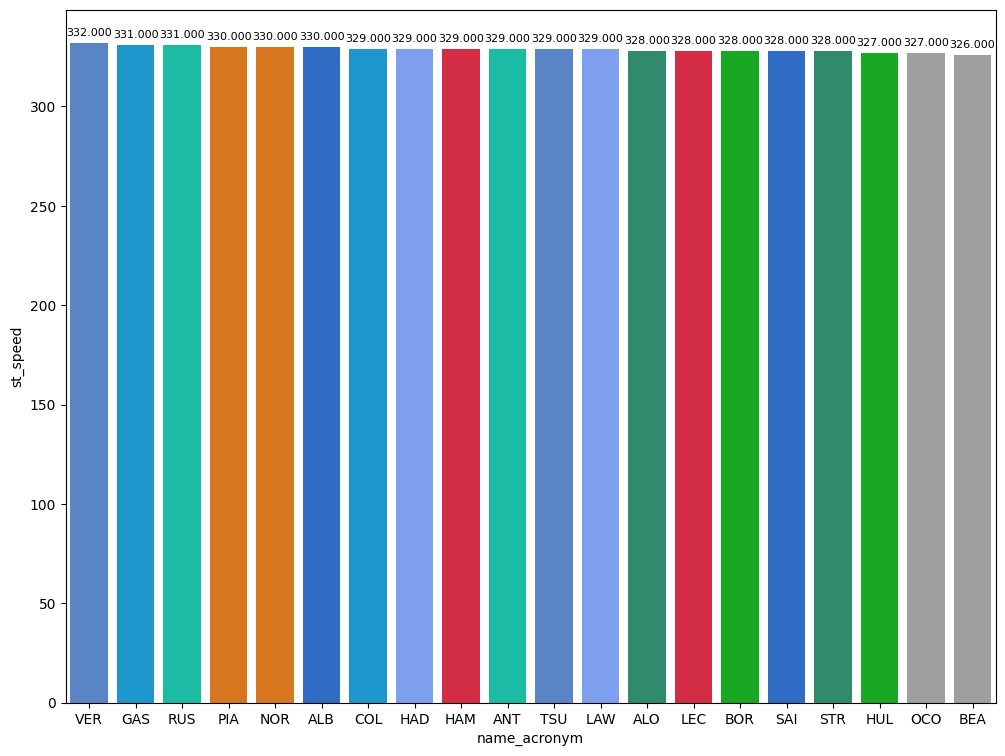

In [5]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

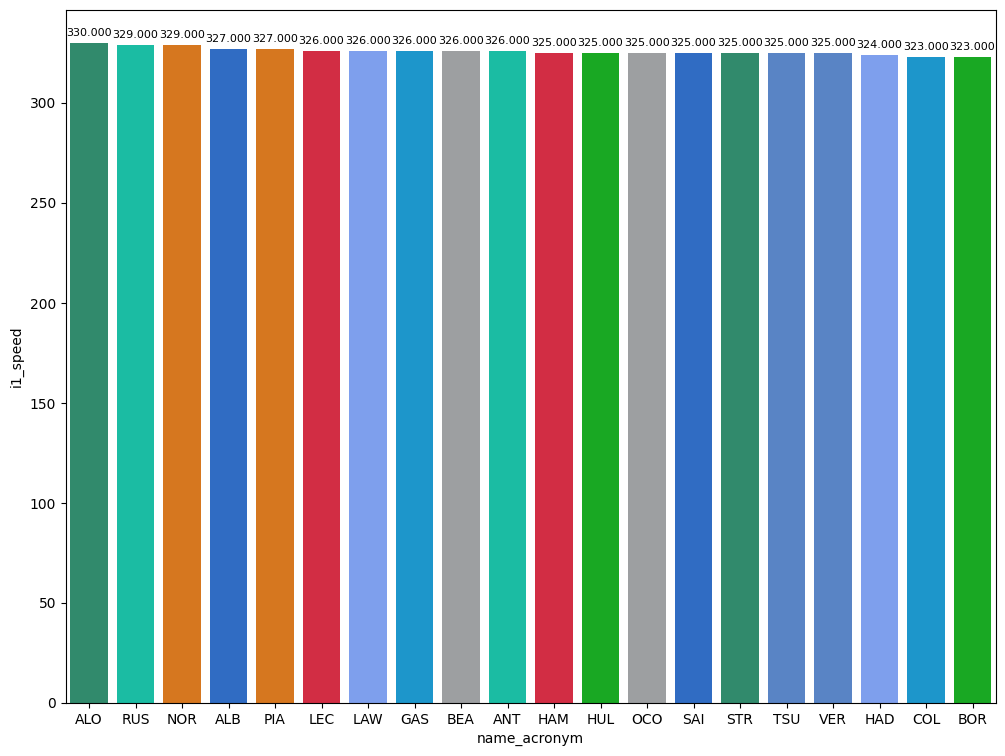

In [6]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

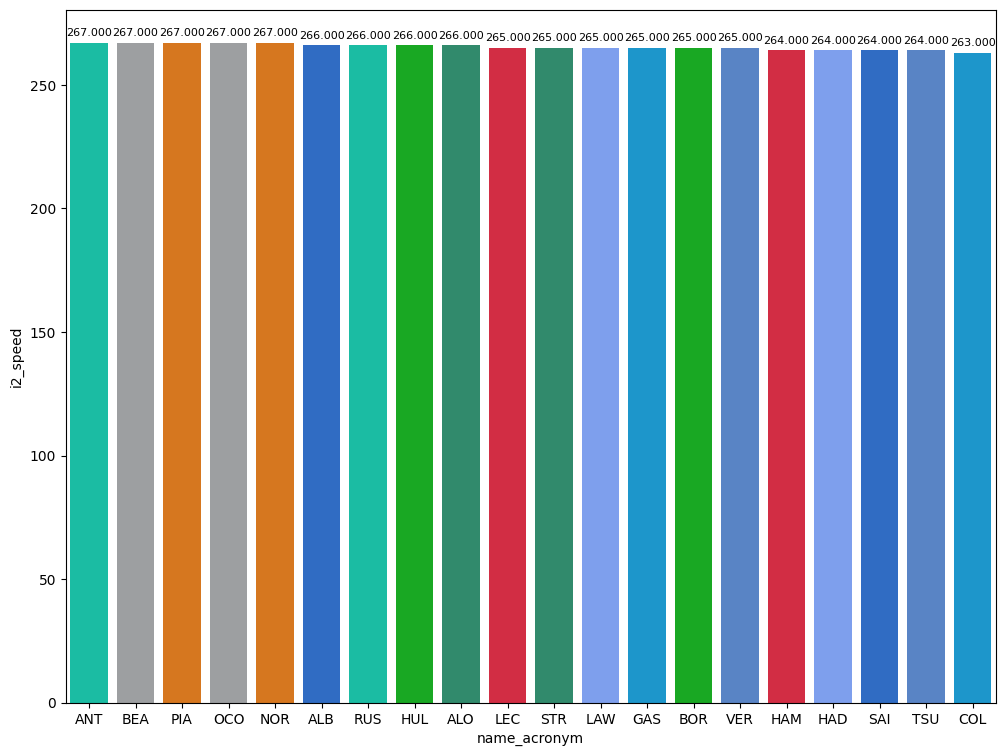

In [7]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [8]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
153  George RUSSELL     HARD             18.238             36.542   
583    Lando NORRIS   MEDIUM             17.946             35.867   
420    Yuki TSUNODA     SOFT             18.391             36.864   

     duration_sector_3  lap_duration  
153             16.408        71.188  
583             16.162        69.975  
420             16.508        71.763

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.

In [9]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


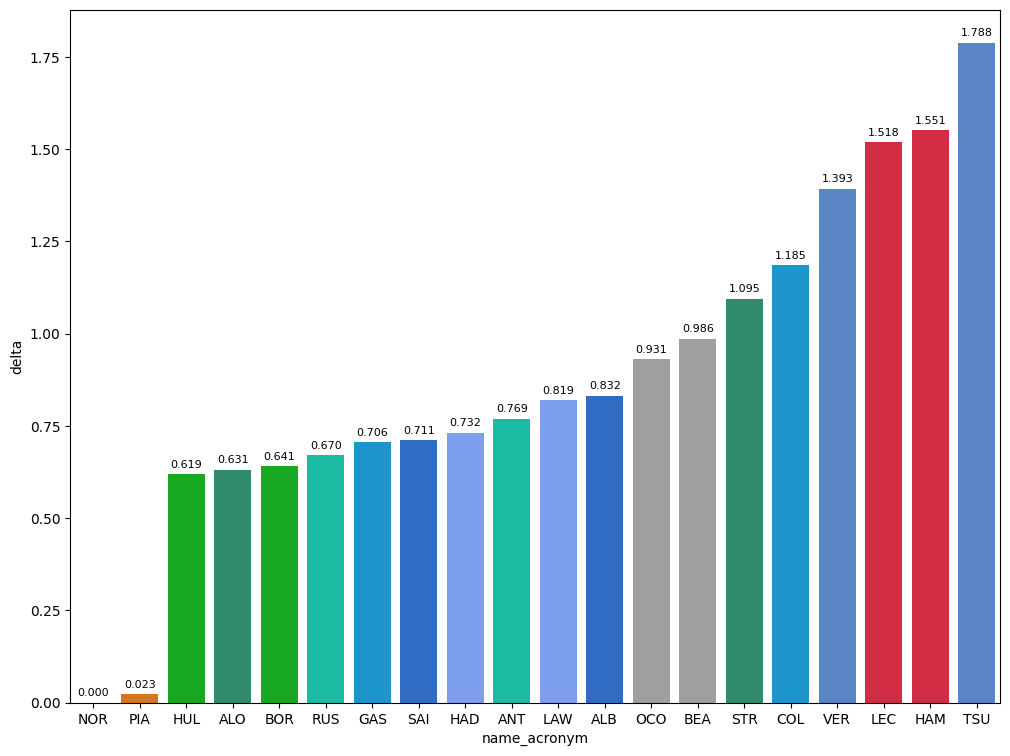

In [10]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

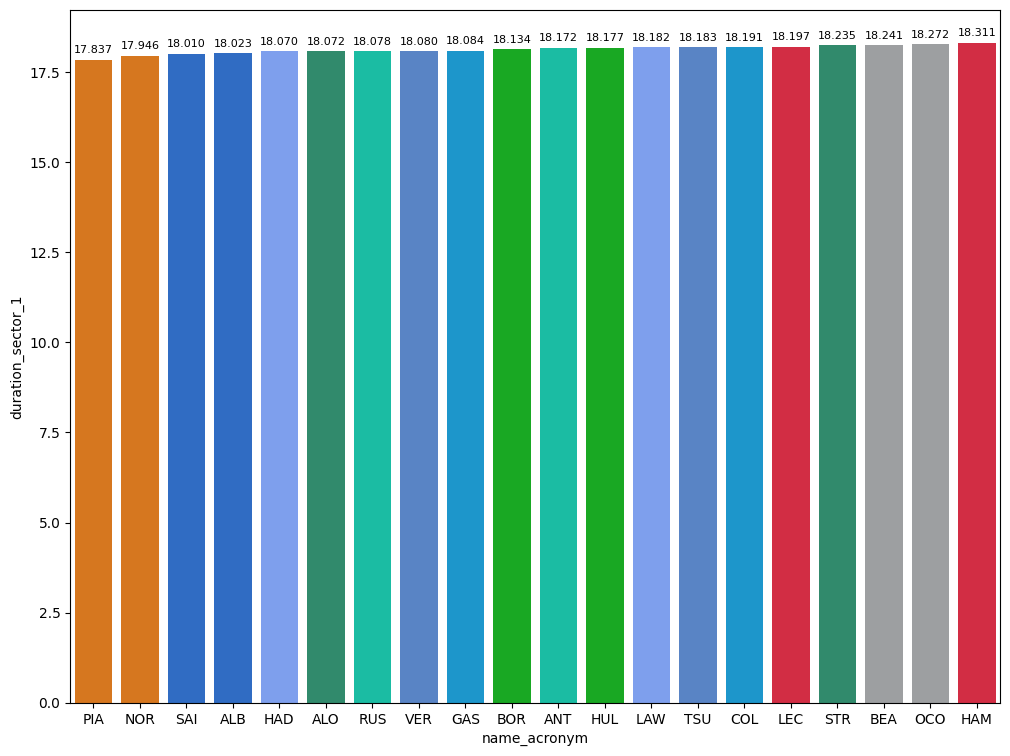

In [11]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

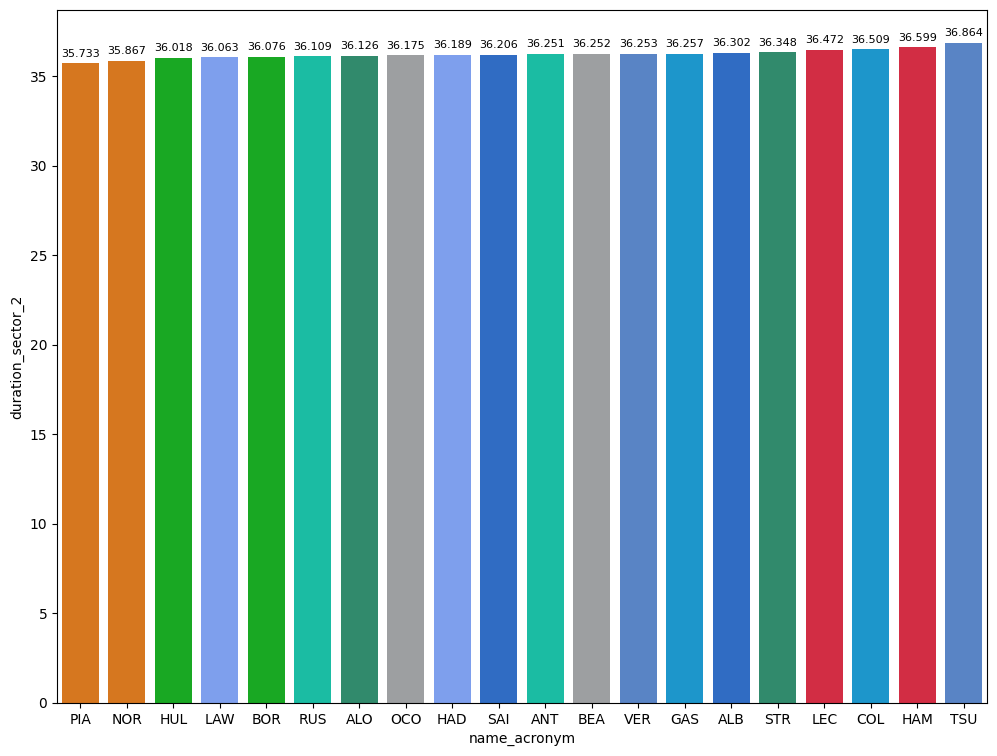

In [12]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin().dropna()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

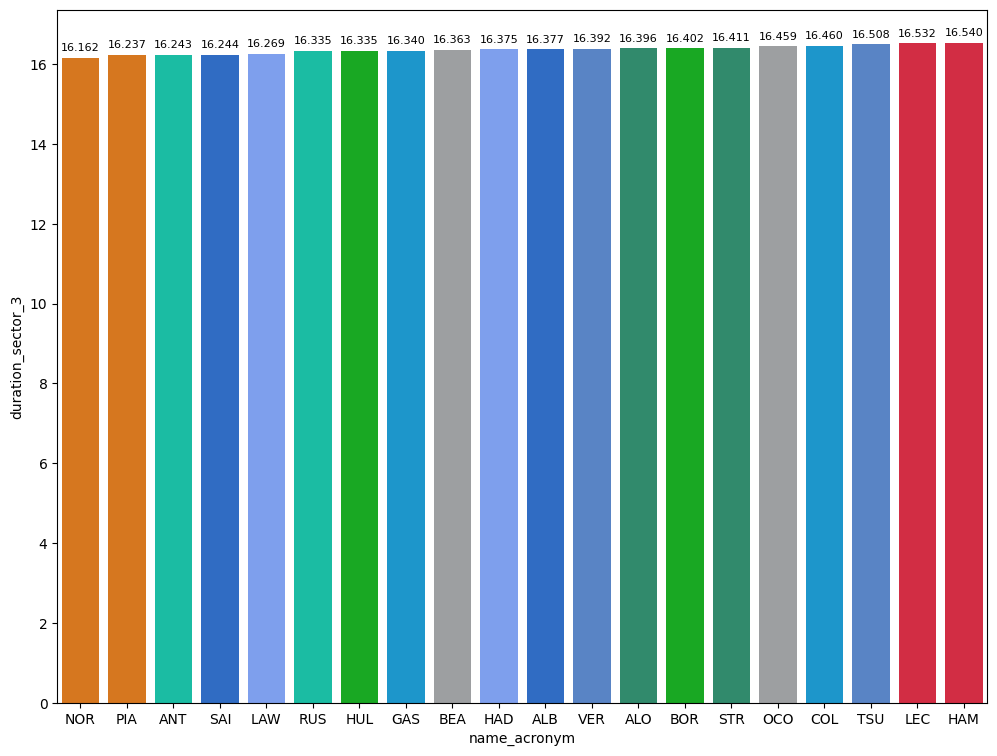

In [13]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [14]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration > 74 and lap_duration <=77.5").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
HARD         74.846313
SOFT         75.025000

### Long runs

In [95]:
MINIMUN_SECONDS = 72
MAXIMUM_SECONDS = 76

#### Red Bull Racing

In [96]:
stintInformation.query('driver_number == 1 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1273         9859             1             22          1        4   
10         1273         9859             1              1          1        9   
54         1273         9859             2             22          5       13   
55         1273         9859             2              1         10       26   
63         1273         9859             3              1         27       28   
66         1273         9859             4              1         29       31   
74         1273         9859             3             22         14       20   

   compound  tyre_age_at_start  
0      HARD                  0  
10     HARD                  0  
54     SOFT                  0  
55     HARD                  9  
63     SOFT                  0  
66     HARD                 26  
74     SOFT                  9

In [97]:
data = libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
51   Max VERSTAPPEN     HARD  2025-11-07T14:39:14.204000+00:00           2   
226  Max VERSTAPPEN     HARD  2025-11-07T14:58:20.716000+00:00          11   
231  Max VERSTAPPEN     HARD  2025-11-07T14:59:35.306000+00:00          12   
238  Max VERSTAPPEN     HARD  2025-11-07T15:00:49.543000+00:00          13   
245  Max VERSTAPPEN     HARD  2025-11-07T15:02:03.989000+00:00          14   
259  Max VERSTAPPEN     HARD  2025-11-07T15:03:19.102000+00:00          15   
288  Max VERSTAPPEN     HARD  2025-11-07T15:05:52.762000+00:00          17   
306  Max VERSTAPPEN     HARD  2025-11-07T15:07:07.054000+00:00          18   
325  Max VERSTAPPEN     HARD  2025-11-07T15:08:21.743000+00:00          19   
343  Max VERSTAPPEN     HARD  2025-11-07T15:09:36.657000+00:00          20   
361  Max VERSTAPPEN     HARD  2025-11-07T15:10:51.689000+00:00          21   
378  Max VERSTAPPEN     HARD  2025-11-07T15:12:06.657000+00:00          22   
395  Max VERSTAPPEN     HARD  2025-11-07T15:13:21.312000+00:00          23   
407  Max VERSTAPPEN     HARD  2025-11-07T15:14:36.090000+00:00          24   
418  Max VERSTAPPEN     HARD  2025-11-07T15:15:50.545000+00:00          25   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
51              18.968             37.232             16.742        72.942  
226             19.209             38.347             17.045        74.601  
231             19.042             38.176             16.961        74.179  
238             19.084             38.411             17.039        74.534  
245             19.076             38.534             17.083        74.693  
259             19.141             38.590             17.164        74.895  
288             19.170             38.594             17.070        74.834  
306             19.008             38.554             17.153        74.715  
325             19.024             38.743             17.103        74.870  
343             19.069             38.694             17.204        74.967  
361             19.120             38.802             17.102        75.024  
378             18.931             38.586             17.183        74.700  
395             18.945             38.749             17.053        74.747  
407             19.028             38.435             17.066        74.529  
418             18.965             38.527             17.033        74.525

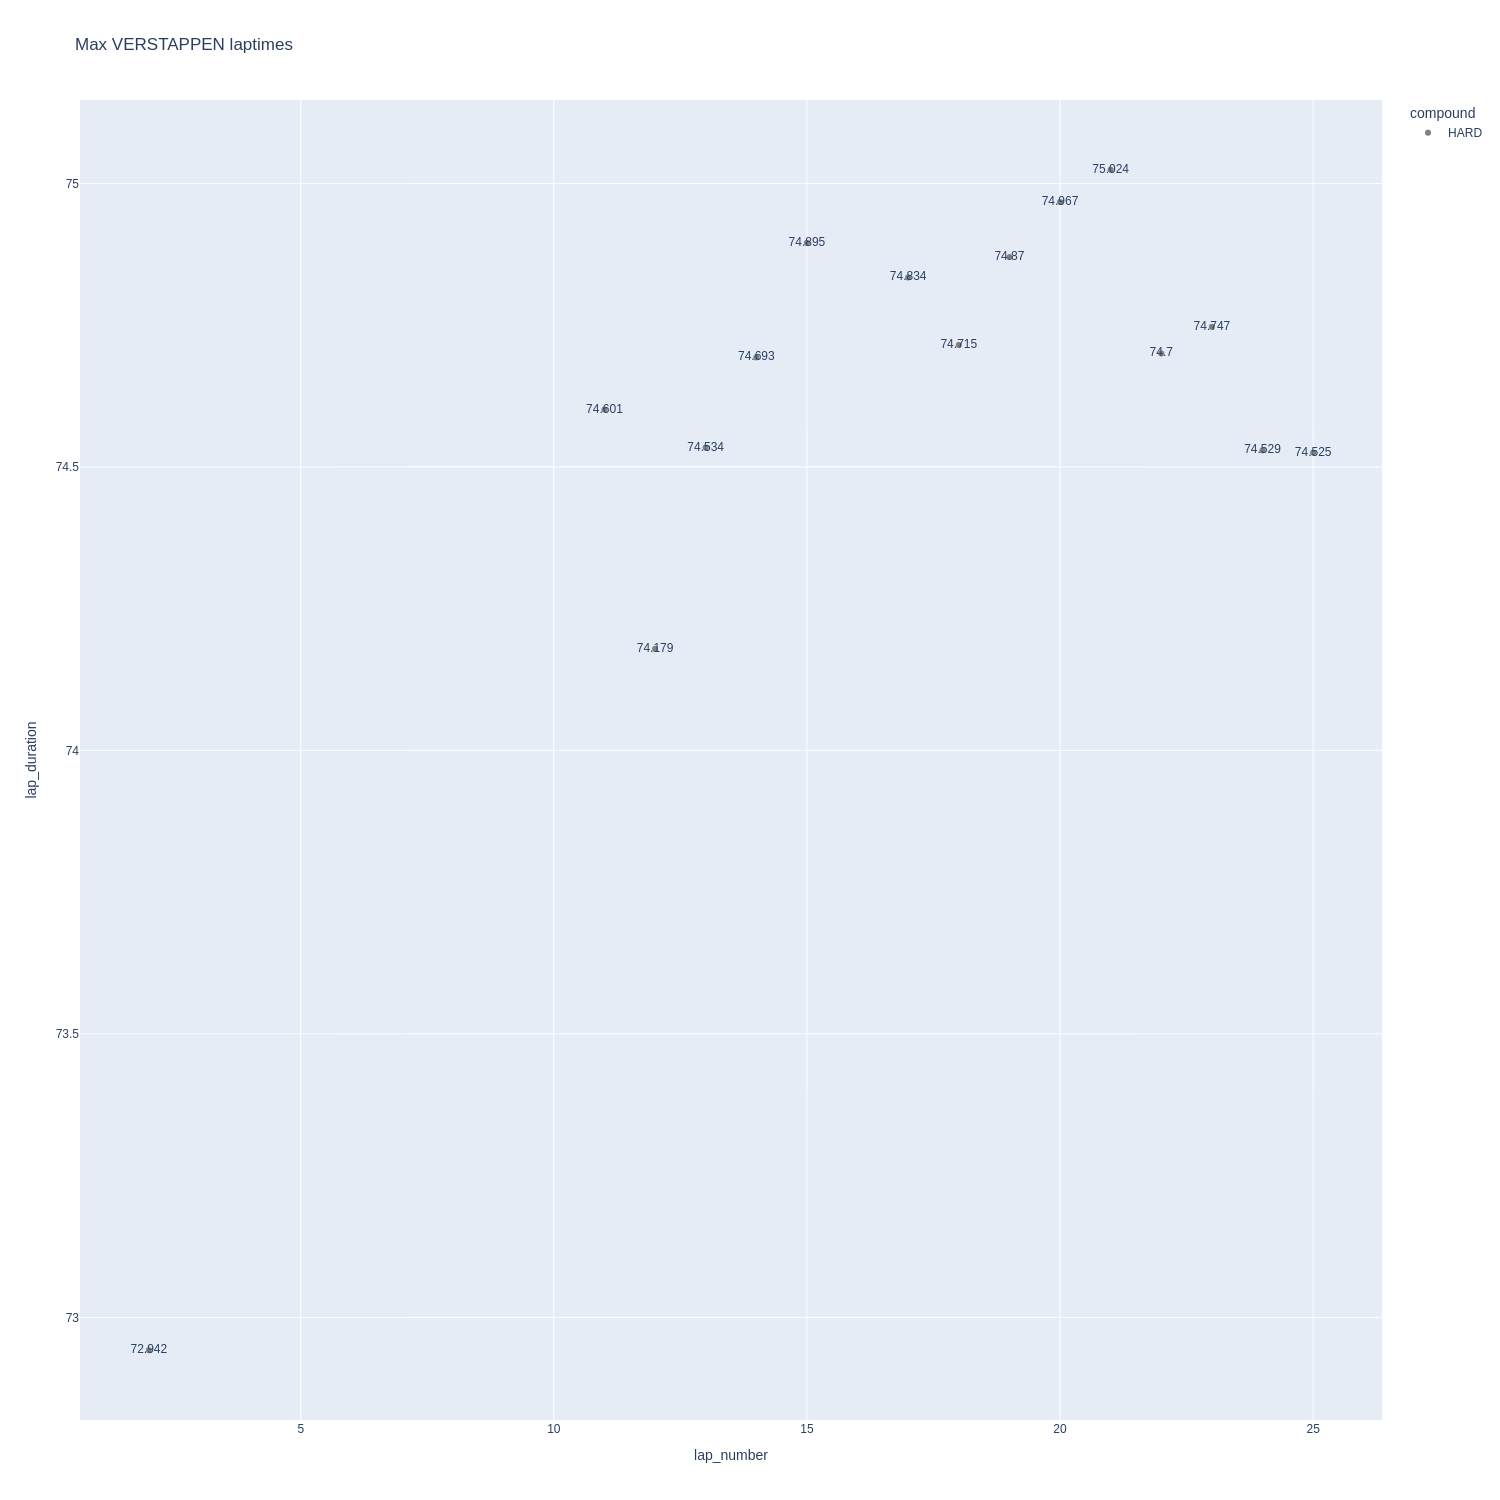

In [98]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

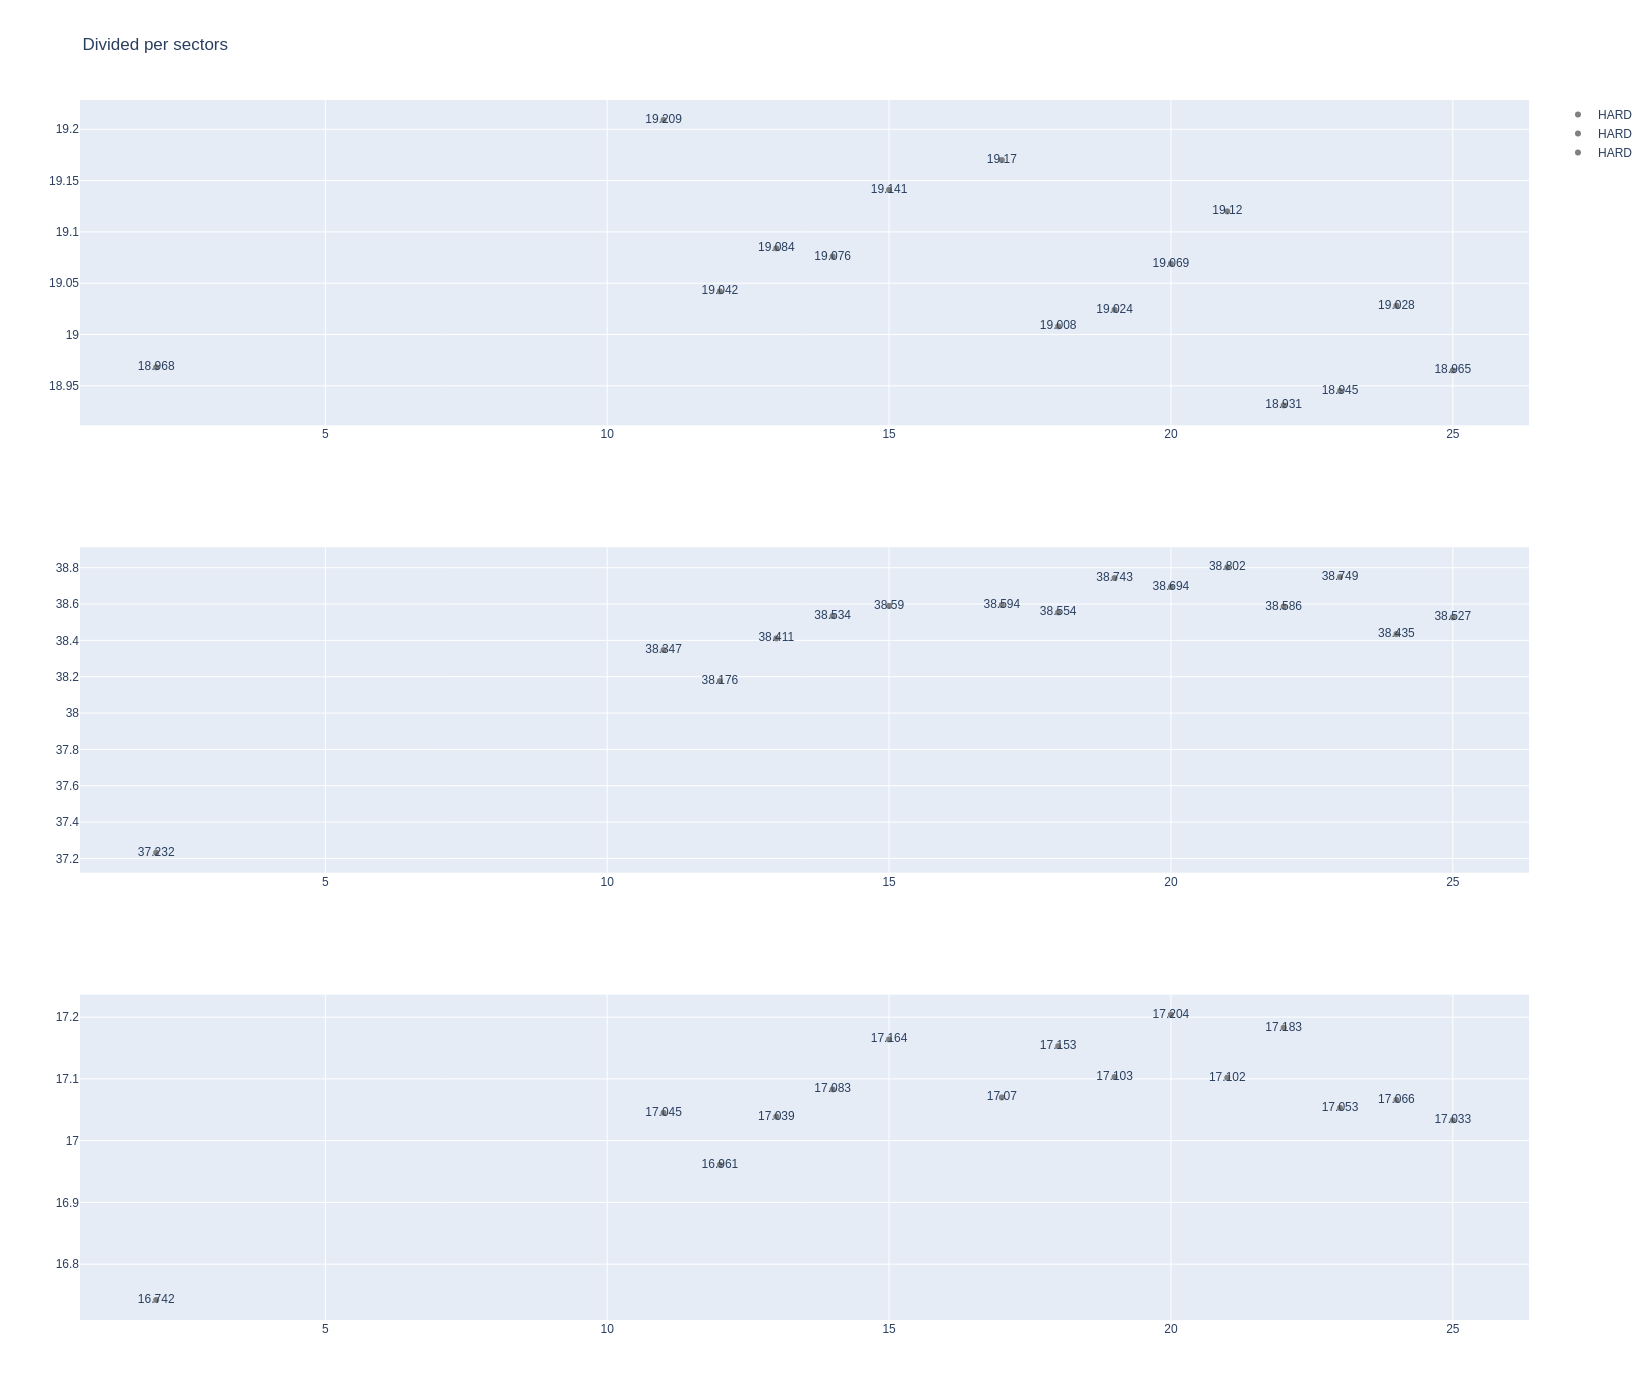

In [99]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [100]:
data = libraryDataF1.getinfolongruns(jointables2,22,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
33   Yuki TSUNODA     HARD  2025-11-07T14:38:01.824000+00:00           2   
553  Yuki TSUNODA     SOFT  2025-11-07T15:31:51.933000+00:00          16   
565  Yuki TSUNODA     SOFT  2025-11-07T15:33:06.829000+00:00          17   
579  Yuki TSUNODA     SOFT  2025-11-07T15:34:21.163000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
33              19.429             38.059             16.970        74.458  
553             19.134             38.627             16.849        74.610  
565             18.990             38.667             16.949        74.606  
579             19.013             38.707             16.994        74.714

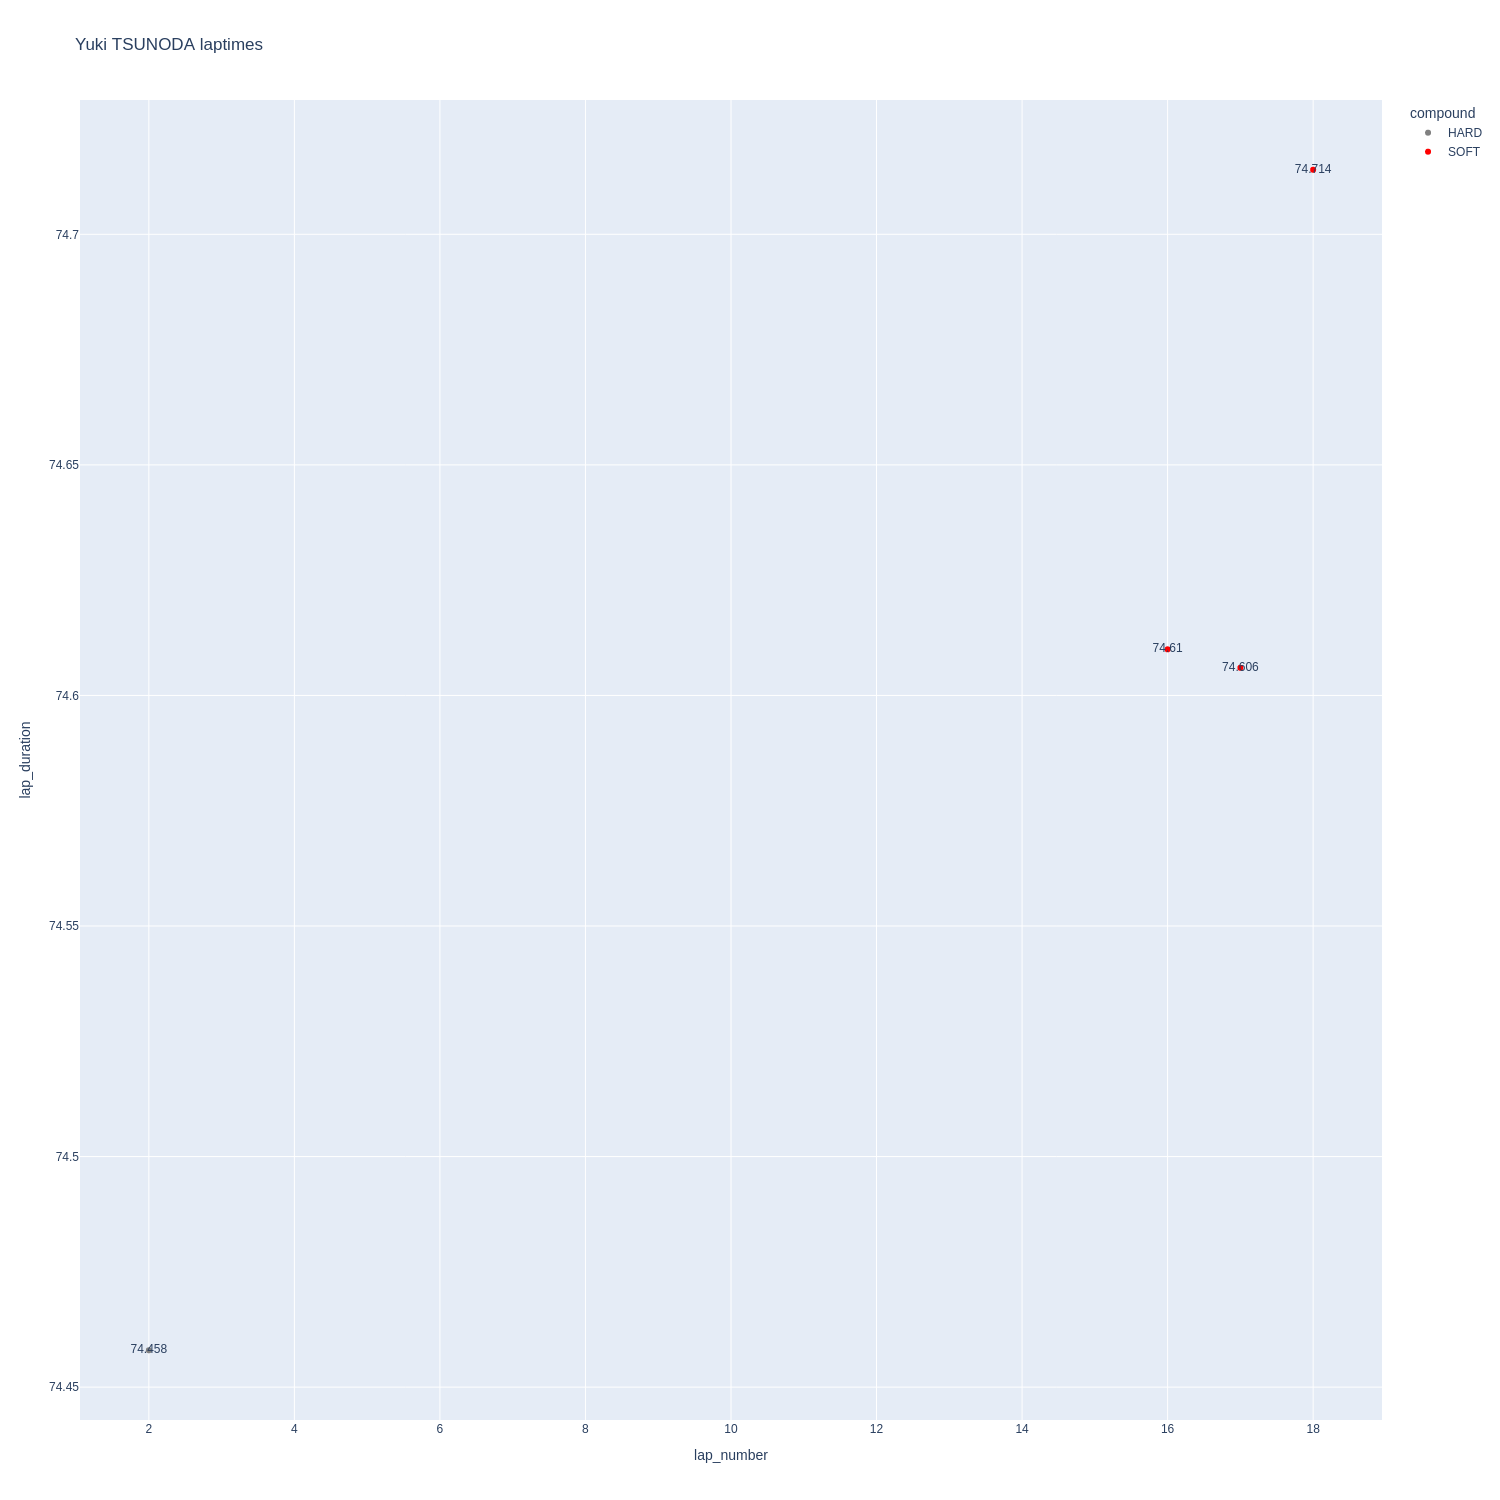

In [101]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

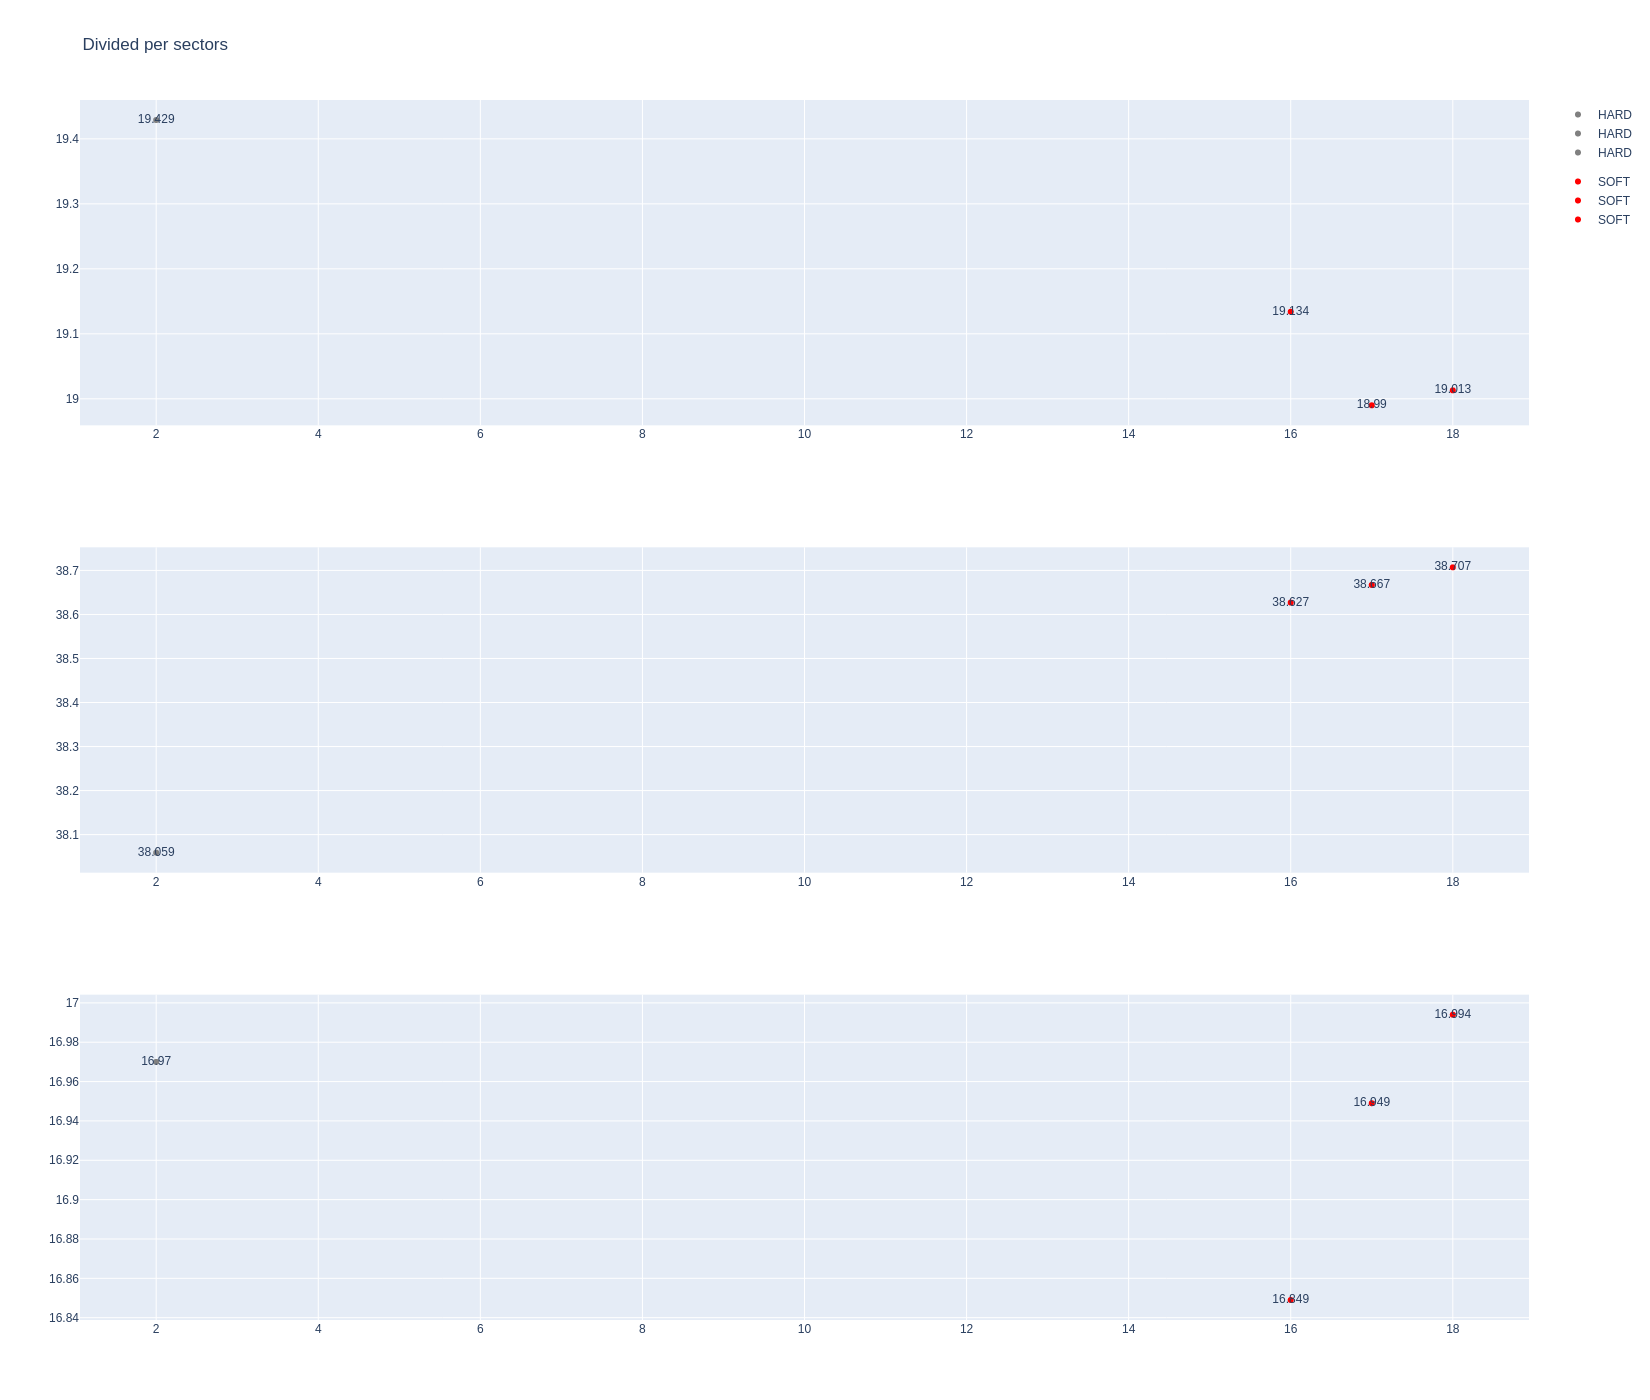

In [102]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [103]:
stintInformation.query('driver_number == 44 or driver_number == 16')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
20         1273         9859             1             16          1       12   
24         1273         9859             1             44          1       14   
45         1273         9859             2             16         13       21   
46         1273         9859             2             44         15       22   
64         1273         9859             3             44         23       28   
68         1273         9859             3             16         22       30   

   compound  tyre_age_at_start  
20     HARD                  0  
24     HARD                  0  
45     HARD                 12  
46     HARD                 14  
64     HARD                 22  
68     HARD                 21

In [104]:
data = libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
34   Charles LECLERC     HARD  2025-11-07T14:38:08.426000+00:00           2   
78   Charles LECLERC     HARD  2025-11-07T14:41:23.319000+00:00           4   
318  Charles LECLERC     HARD  2025-11-07T15:07:52.703000+00:00          16   
337  Charles LECLERC     HARD  2025-11-07T15:09:06.191000+00:00          17   
354  Charles LECLERC     HARD  2025-11-07T15:10:19.765000+00:00          18   
371  Charles LECLERC     HARD  2025-11-07T15:11:33.911000+00:00          19   
388  Charles LECLERC     HARD  2025-11-07T15:12:47.803000+00:00          20   
505  Charles LECLERC     HARD  2025-11-07T15:27:41.761000+00:00          24   
574  Charles LECLERC     HARD  2025-11-07T15:33:59.548000+00:00          28   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
34              18.833             37.271             16.846        72.950  
78              18.609             36.913             16.793        72.315  
318             19.299             37.785             16.532        73.616  
337             18.934             37.838             16.880        73.652  
354             19.040             37.985             16.995        74.020  
371             18.975             37.851             17.088        73.914  
388             18.956             37.956             17.061        73.973  
505             18.405             37.056             16.568        72.029  
574             18.197             37.944             18.652        74.793

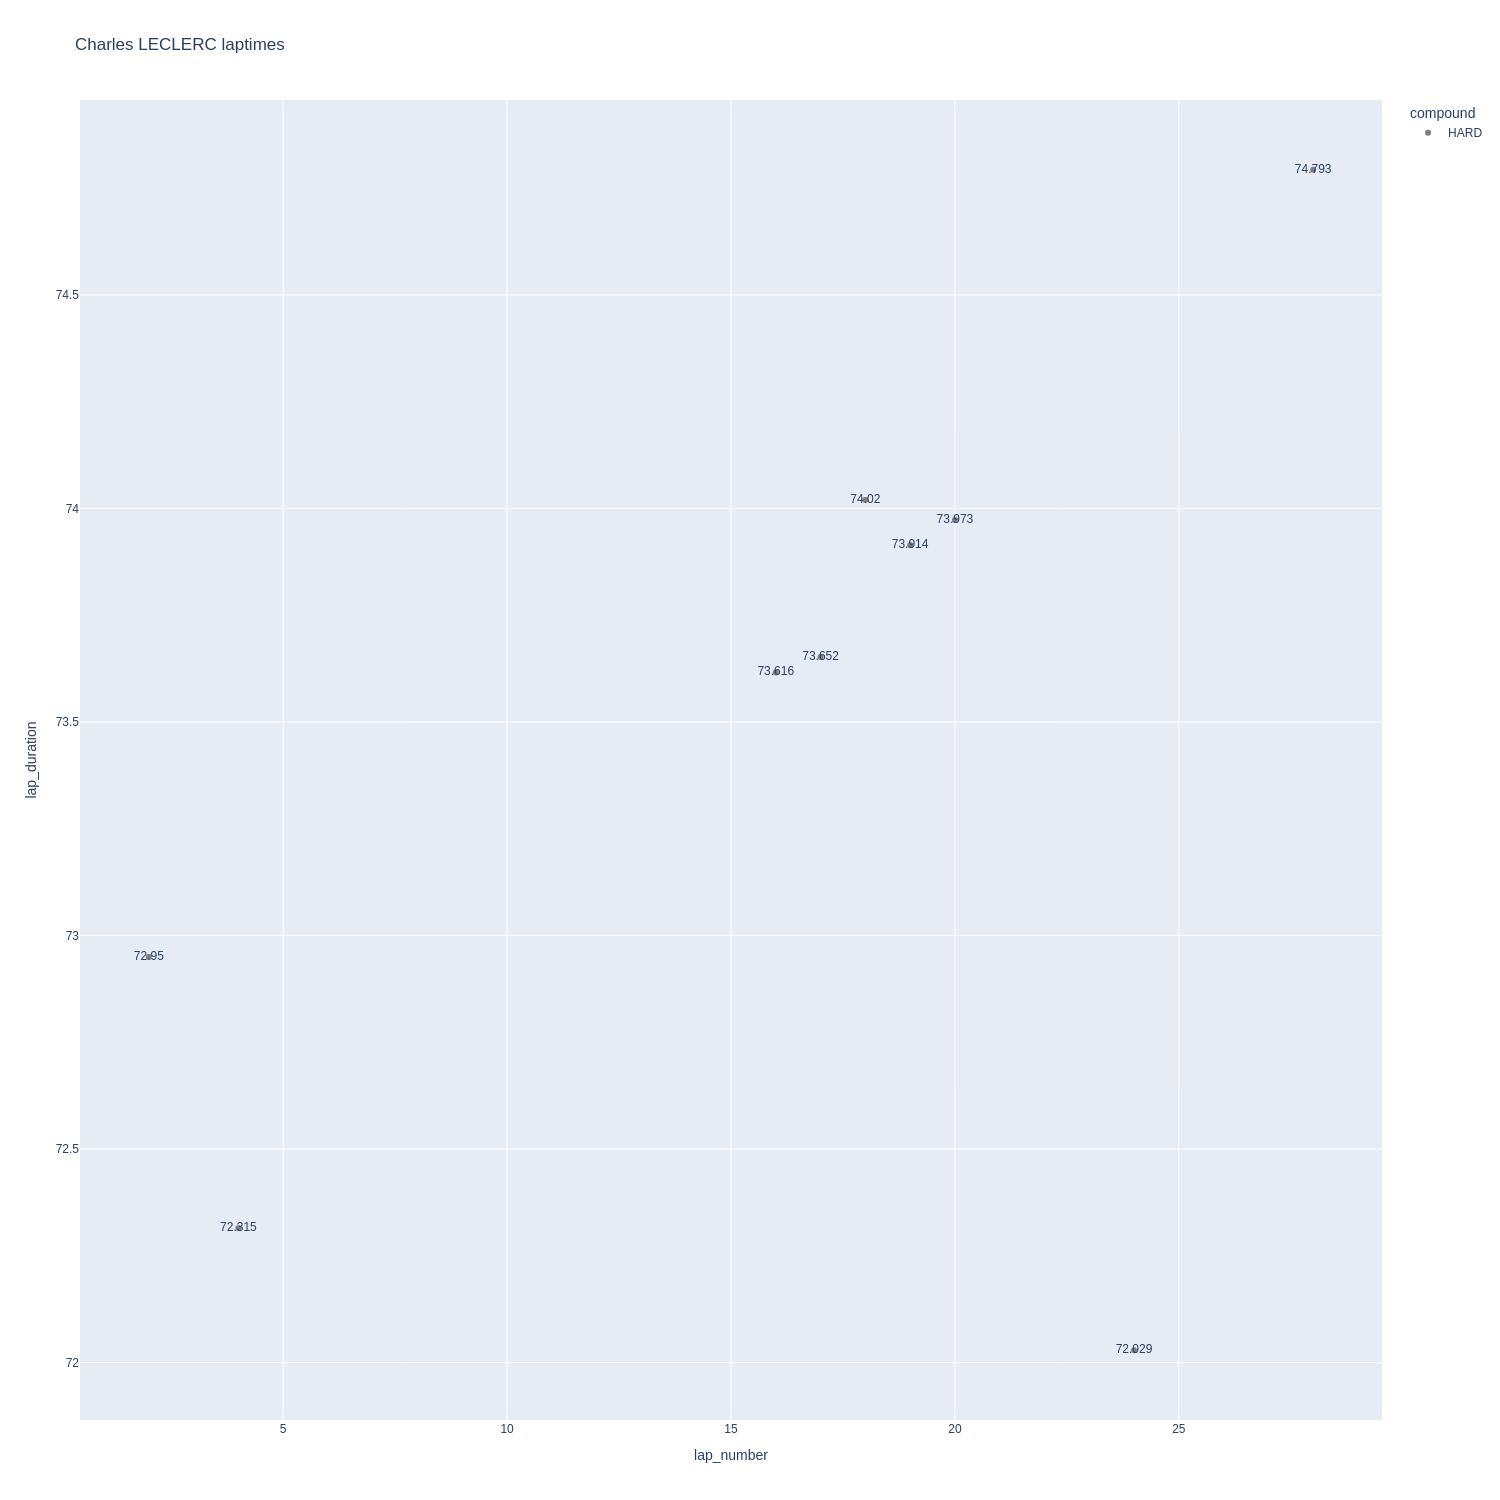

In [105]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

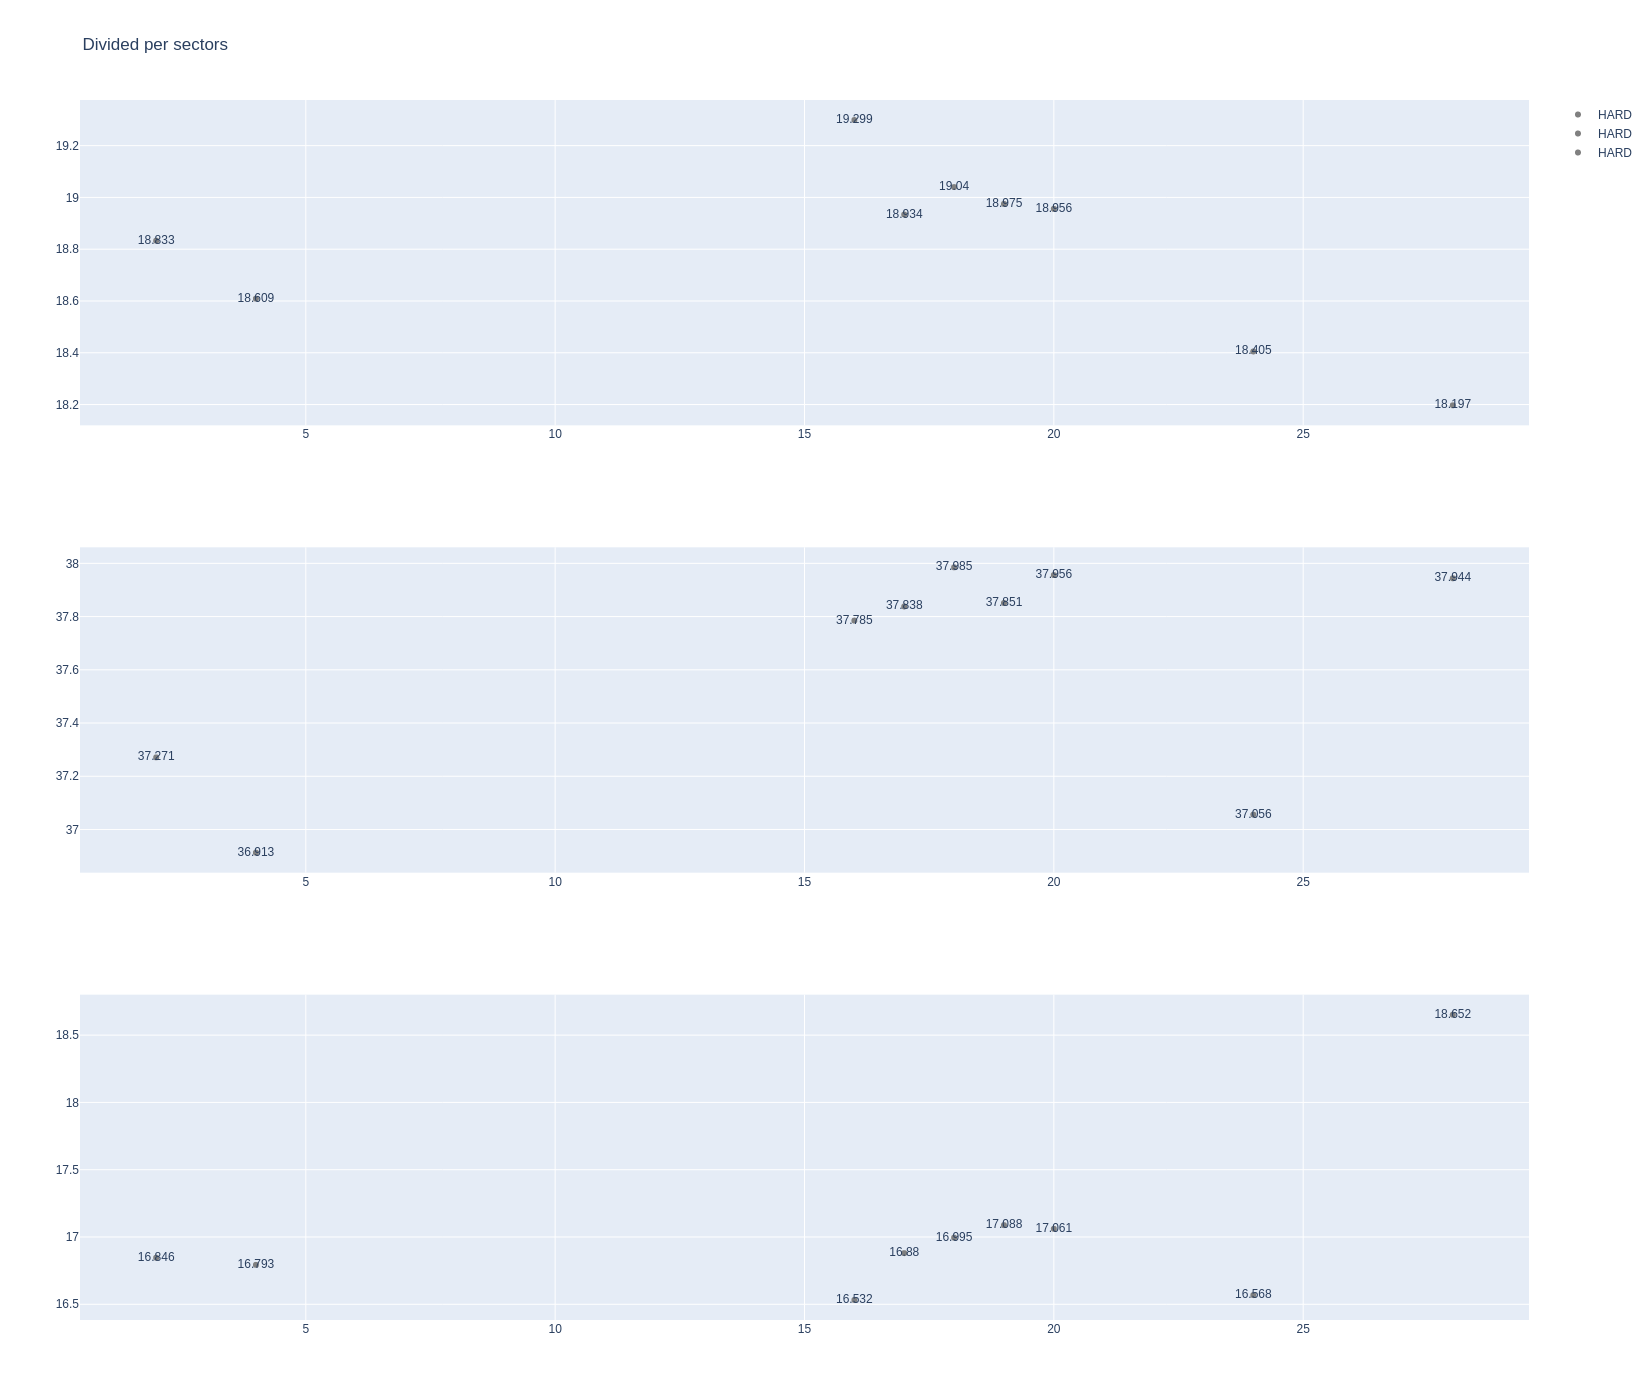

In [106]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [107]:
data = libraryDataF1.getinfolongruns(jointables2,44,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
55   Lewis HAMILTON     HARD  2025-11-07T14:39:34.118000+00:00           3   
96   Lewis HAMILTON     HARD  2025-11-07T14:42:58.318000+00:00           5   
309  Lewis HAMILTON     HARD  2025-11-07T15:07:19.130000+00:00          16   
328  Lewis HAMILTON     HARD  2025-11-07T15:08:32.430000+00:00          17   
347  Lewis HAMILTON     HARD  2025-11-07T15:09:46.189000+00:00          18   
363  Lewis HAMILTON     HARD  2025-11-07T15:11:00.714000+00:00          19   
380  Lewis HAMILTON     HARD  2025-11-07T15:12:15.095000+00:00          20   
397  Lewis HAMILTON     HARD  2025-11-07T15:13:28.278000+00:00          21   
534  Lewis HAMILTON     HARD  2025-11-07T15:30:21.697000+00:00          26   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
55              18.523             37.148             16.723        72.394  
96              18.542             37.027             16.759        72.328  
309             18.894             37.701             16.689        73.284  
328             18.964             38.023             16.726        73.713  
347             19.109             38.413             17.029        74.551  
363             19.006             37.946             16.966        73.918  
380             18.901             37.784             17.031        73.716  
397             18.900             37.982             16.954        73.836  
534             18.522             36.804             16.709        72.035

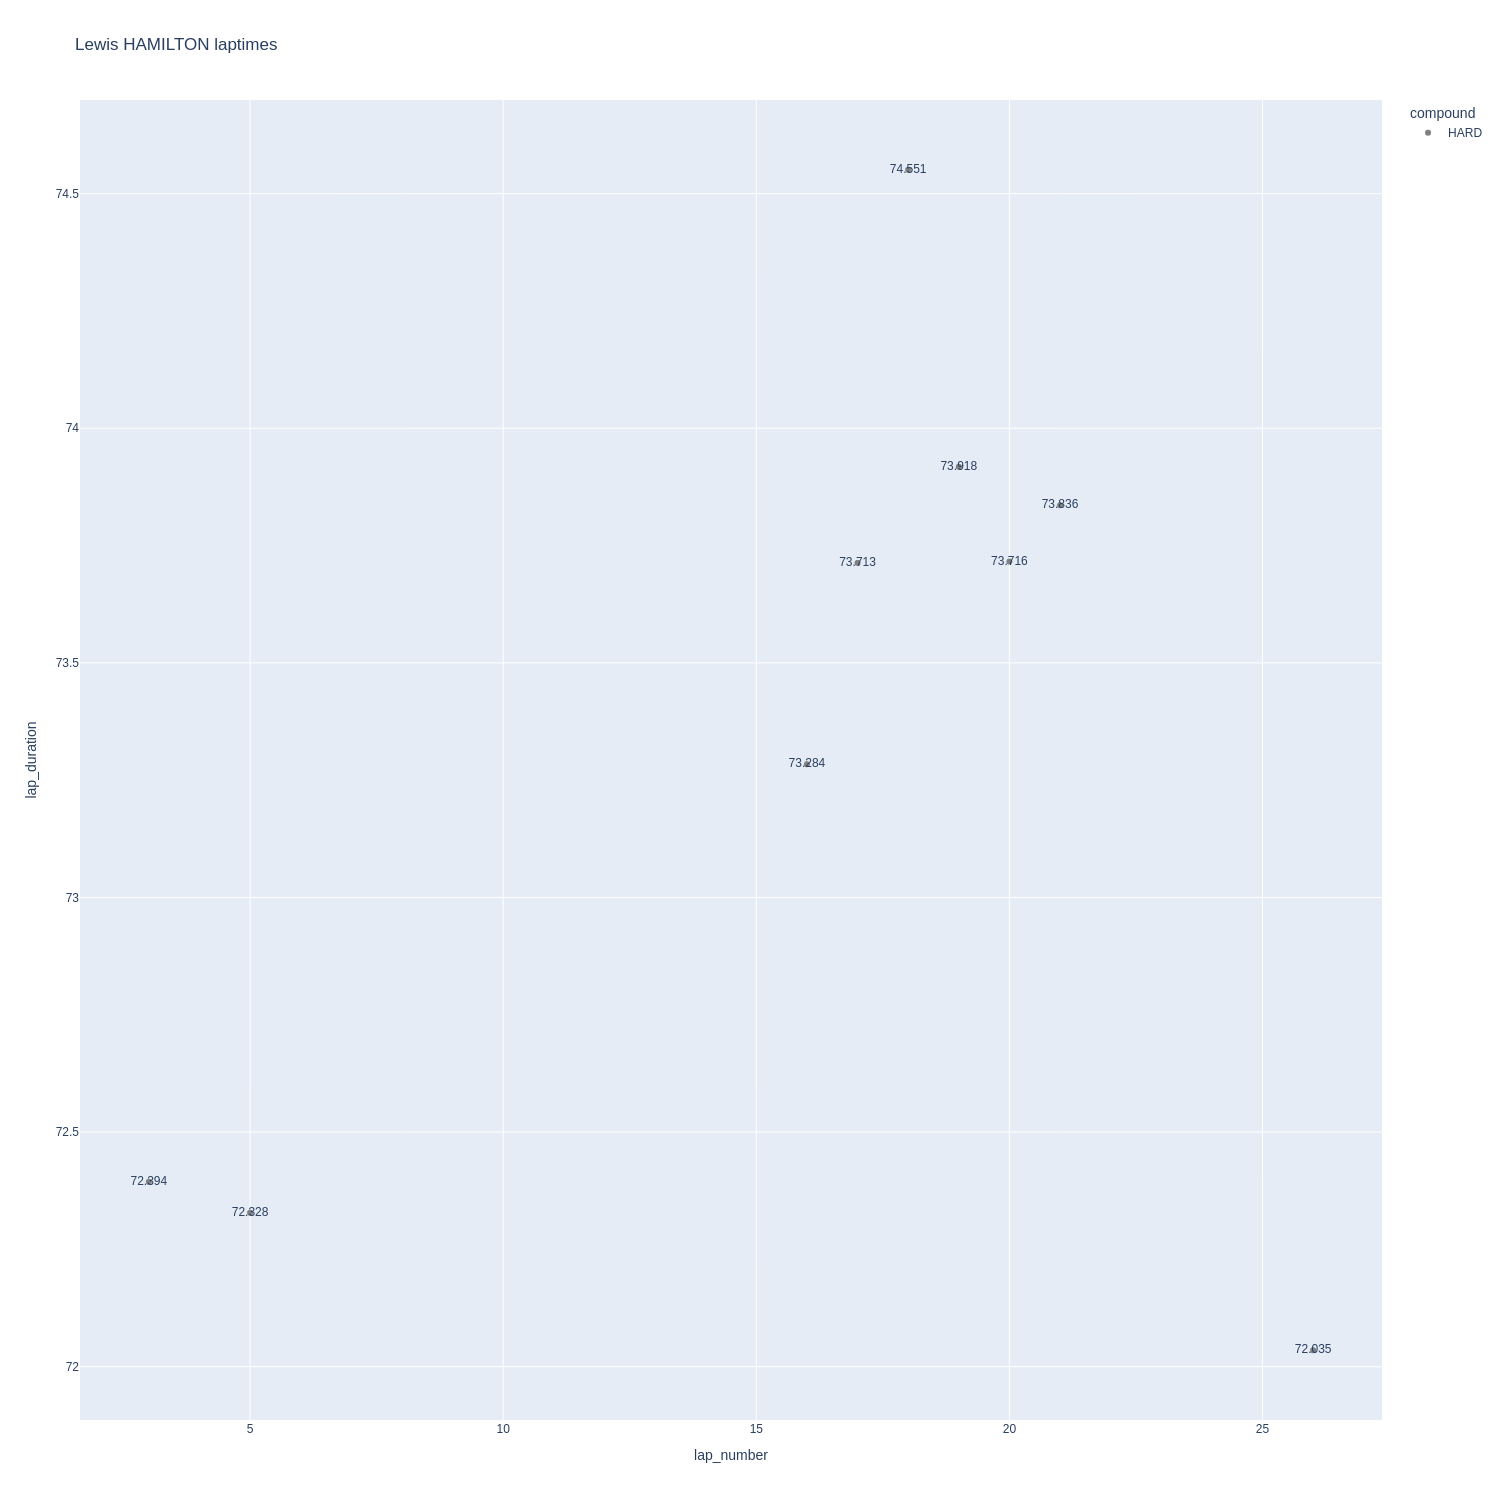

In [108]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

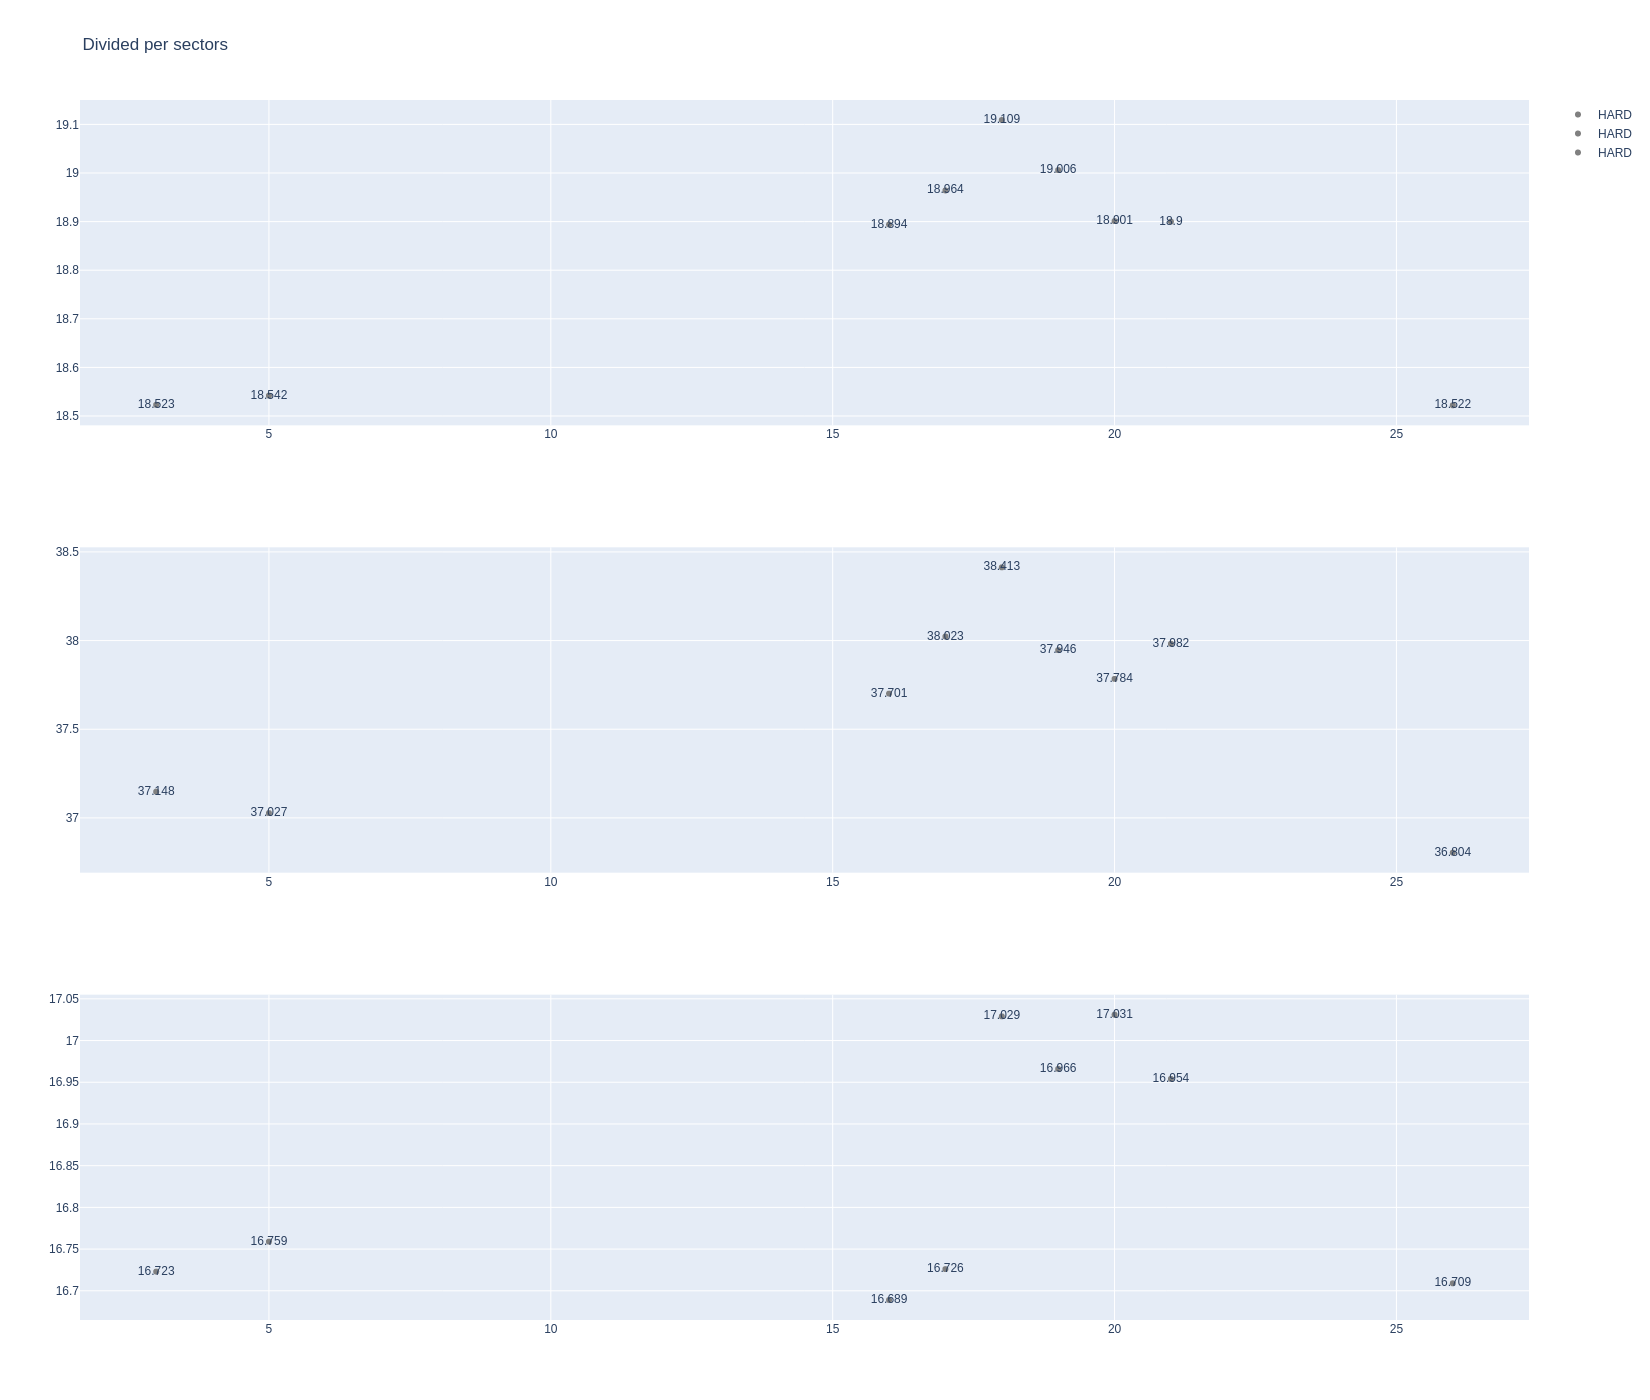

In [109]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [110]:
stintInformation.query('driver_number == 63 or driver_number == 12')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
11         1273         9859             1             12          1       12   
12         1273         9859             1             63          1       10   
29         1273         9859             2             63         11       24   
31         1273         9859             2             12         13       25   
44         1273         9859             3             12         26       28   
47         1273         9859             3             63         25       27   
58         1273         9859             4             12         29       32   
78         1273         9859             4             63         28       35   
81         1273         9859             5             12         33       37   

   compound  tyre_age_at_start  
11     HARD                  0  
12     HARD                  0  
29     HARD                 10  
31     HARD                 12  
44   MEDIUM                  0  
47   MEDIUM                  0  
58   MEDIUM                  3  
78   MEDIUM                  3  
81   MEDIUM                  7

In [111]:
data = libraryDataF1.getinfolongruns(jointables2,12,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
29   Kimi ANTONELLI     HARD  2025-11-07T14:37:50.101000+00:00           3   
70   Kimi ANTONELLI     HARD  2025-11-07T14:40:43.207000+00:00           5   
230  Kimi ANTONELLI     HARD  2025-11-07T14:59:29.353000+00:00          14   
236  Kimi ANTONELLI     HARD  2025-11-07T15:00:43.423000+00:00          15   
243  Kimi ANTONELLI     HARD  2025-11-07T15:01:57.582000+00:00          16   
256  Kimi ANTONELLI     HARD  2025-11-07T15:03:11.512000+00:00          17   
270  Kimi ANTONELLI     HARD  2025-11-07T15:04:25.882000+00:00          18   
286  Kimi ANTONELLI     HARD  2025-11-07T15:05:41.272000+00:00          19   
304  Kimi ANTONELLI     HARD  2025-11-07T15:06:54.410000+00:00          20   
342  Kimi ANTONELLI     HARD  2025-11-07T15:09:25.764000+00:00          22   
359  Kimi ANTONELLI     HARD  2025-11-07T15:10:40.563000+00:00          23   
376  Kimi ANTONELLI     HARD  2025-11-07T15:11:55.446000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
29              19.187             38.008             16.861        74.056  
70              18.776             37.389             16.533        72.698  
230             19.293             37.918             16.915        74.126  
236             19.134             37.953             16.959        74.046  
243             19.097             38.025             16.911        74.033  
256             19.102             38.278             17.036        74.416  
270             18.989             38.390             16.967        74.346  
286             19.045             38.163             16.969        74.177  
304             18.942             38.472             16.971        74.385  
342             19.103             38.624             17.073        74.800  
359             19.078             38.773             17.055        74.906  
376             19.018             38.710             17.176        74.904

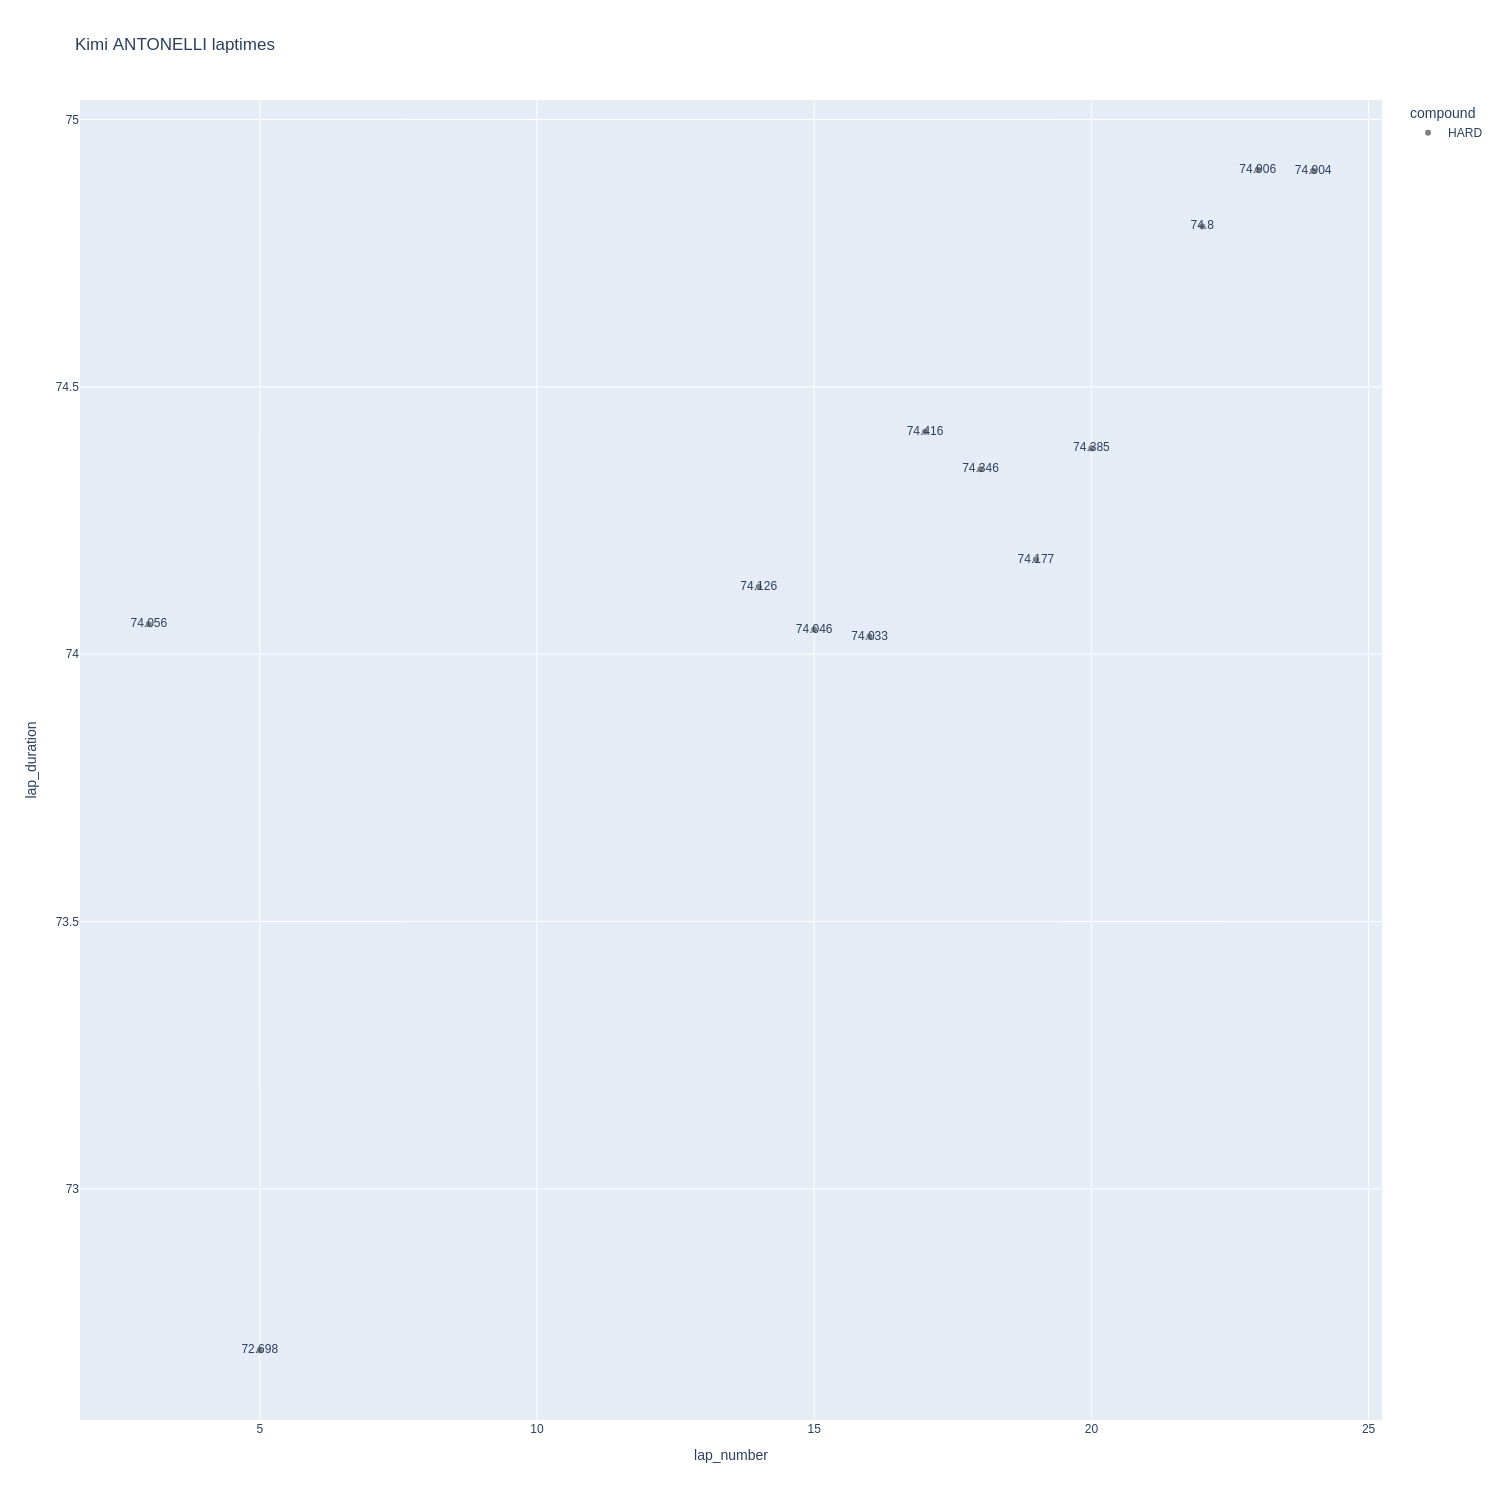

In [112]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

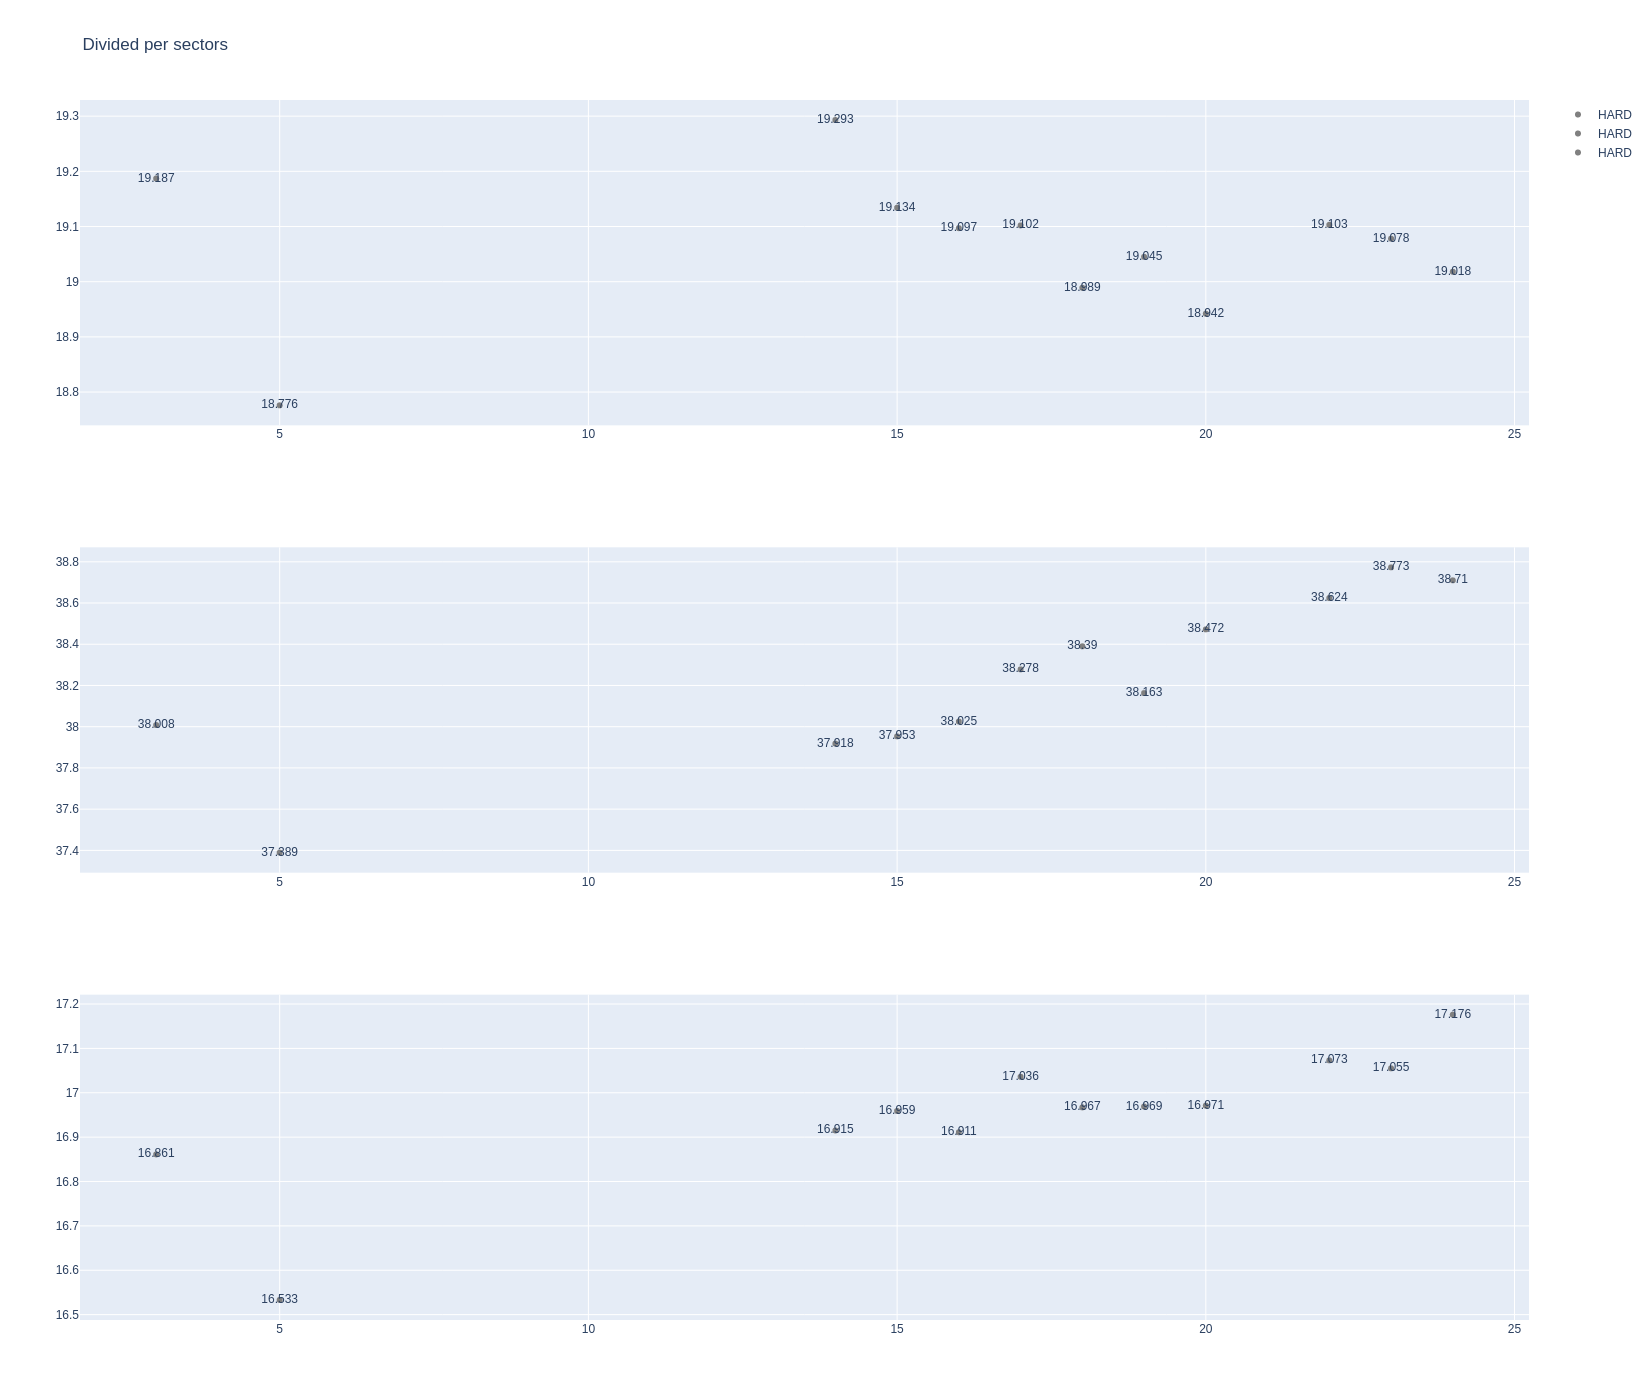

In [113]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [114]:
data = libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
31   George RUSSELL     HARD  2025-11-07T14:37:55.488000+00:00           3   
232  George RUSSELL     HARD  2025-11-07T14:59:42.235000+00:00          12   
239  George RUSSELL     HARD  2025-11-07T15:00:55.810000+00:00          13   
246  George RUSSELL     HARD  2025-11-07T15:02:09.533000+00:00          14   
260  George RUSSELL     HARD  2025-11-07T15:03:23.211000+00:00          15   
273  George RUSSELL     HARD  2025-11-07T15:04:37.440000+00:00          16   
289  George RUSSELL     HARD  2025-11-07T15:05:52.800000+00:00          17   
326  George RUSSELL     HARD  2025-11-07T15:08:27.346000+00:00          19   
344  George RUSSELL     HARD  2025-11-07T15:09:41.425000+00:00          20   
362  George RUSSELL     HARD  2025-11-07T15:10:55.999000+00:00          21   
379  George RUSSELL     HARD  2025-11-07T15:12:10.668000+00:00          22   
396  George RUSSELL     HARD  2025-11-07T15:13:25.549000+00:00          23   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
31              18.858             37.354             16.580        72.792  
232             19.108             37.604             16.770        73.482  
239             19.043             37.814             16.844        73.701  
246             19.044             37.842             16.839        73.725  
260             18.968             38.196             17.039        74.203  
273             19.029             39.207             16.943        75.179  
289             19.185             38.876             16.847        74.908  
326             18.918             38.335             16.908        74.161  
344             19.031             38.453             17.054        74.538  
362             18.970             38.665             16.936        74.571  
379             18.998             38.700             17.273        74.971  
396             19.083             38.922             17.046        75.051

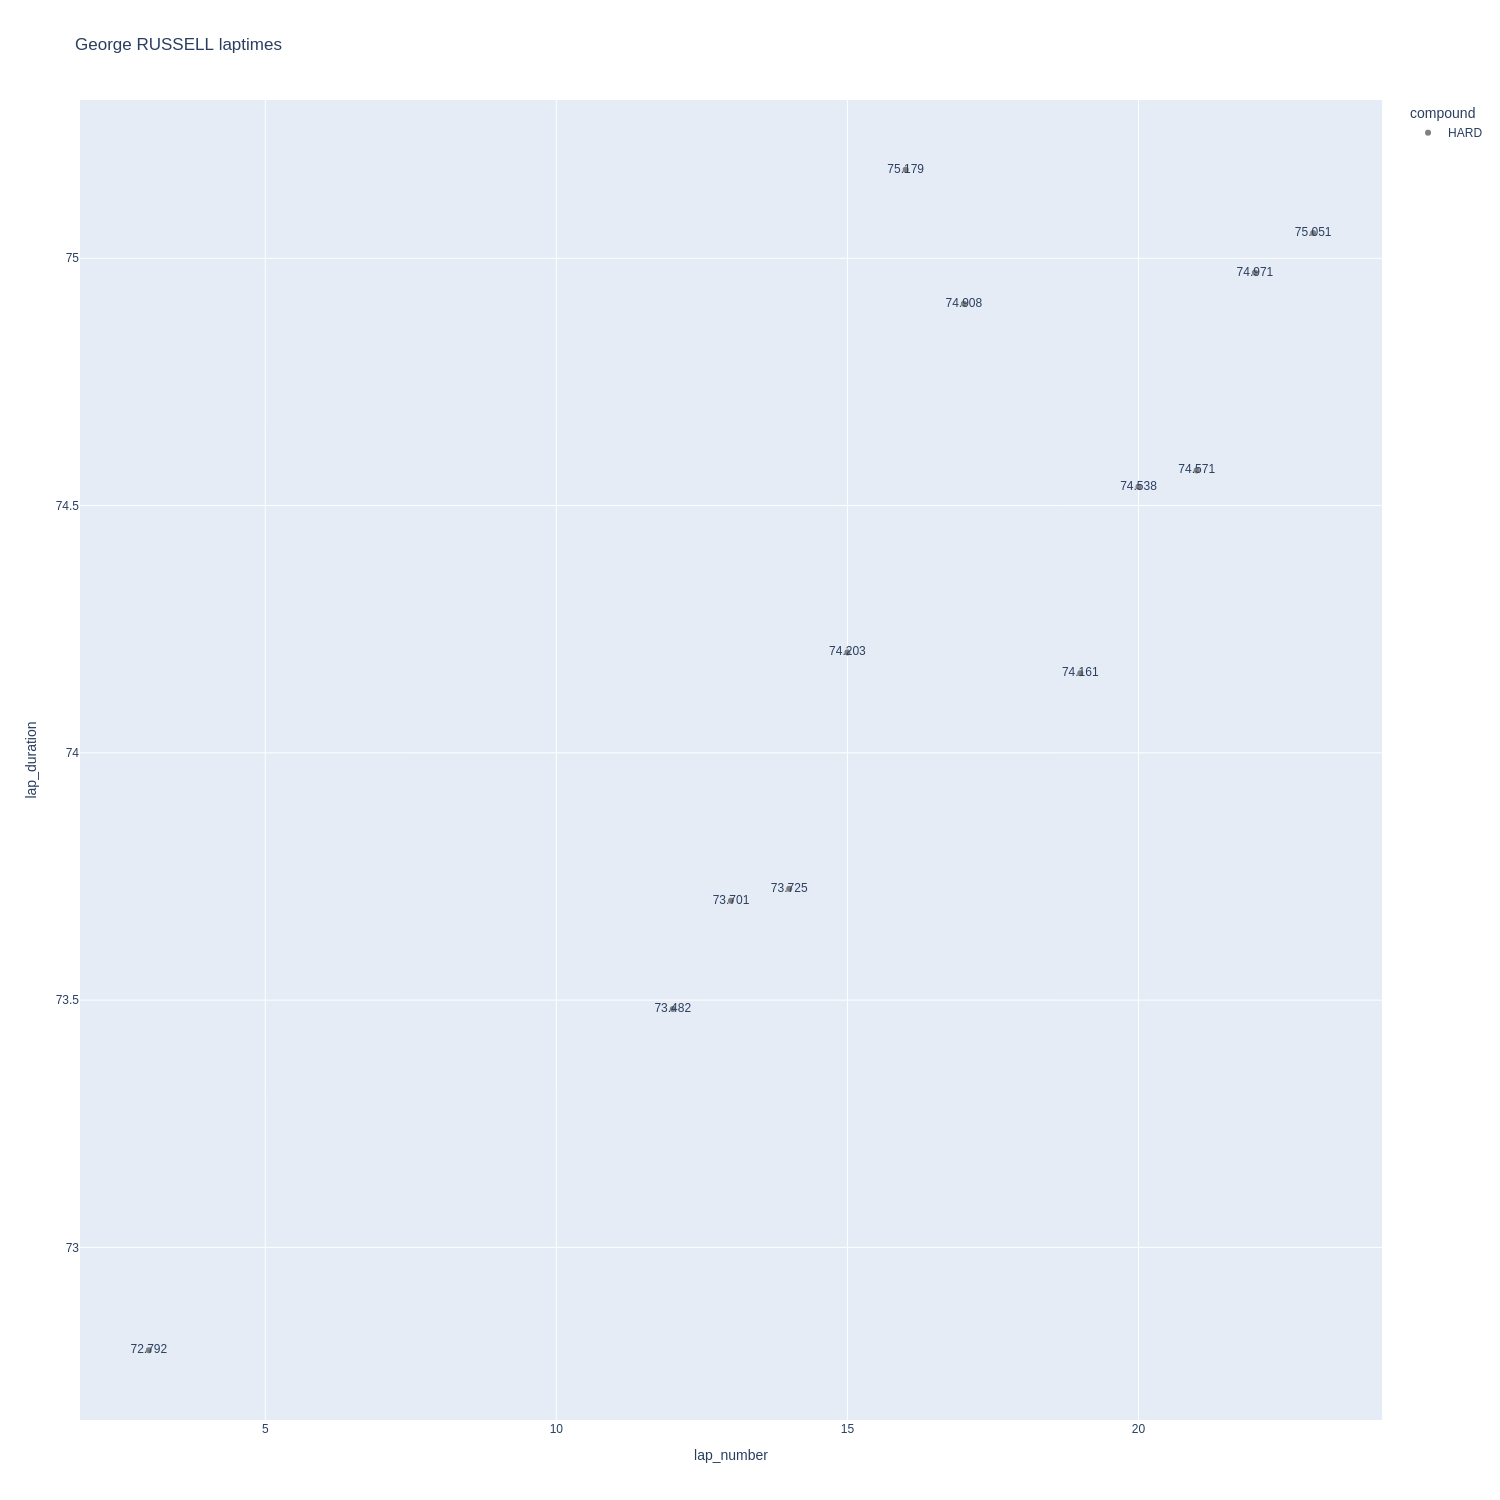

In [115]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

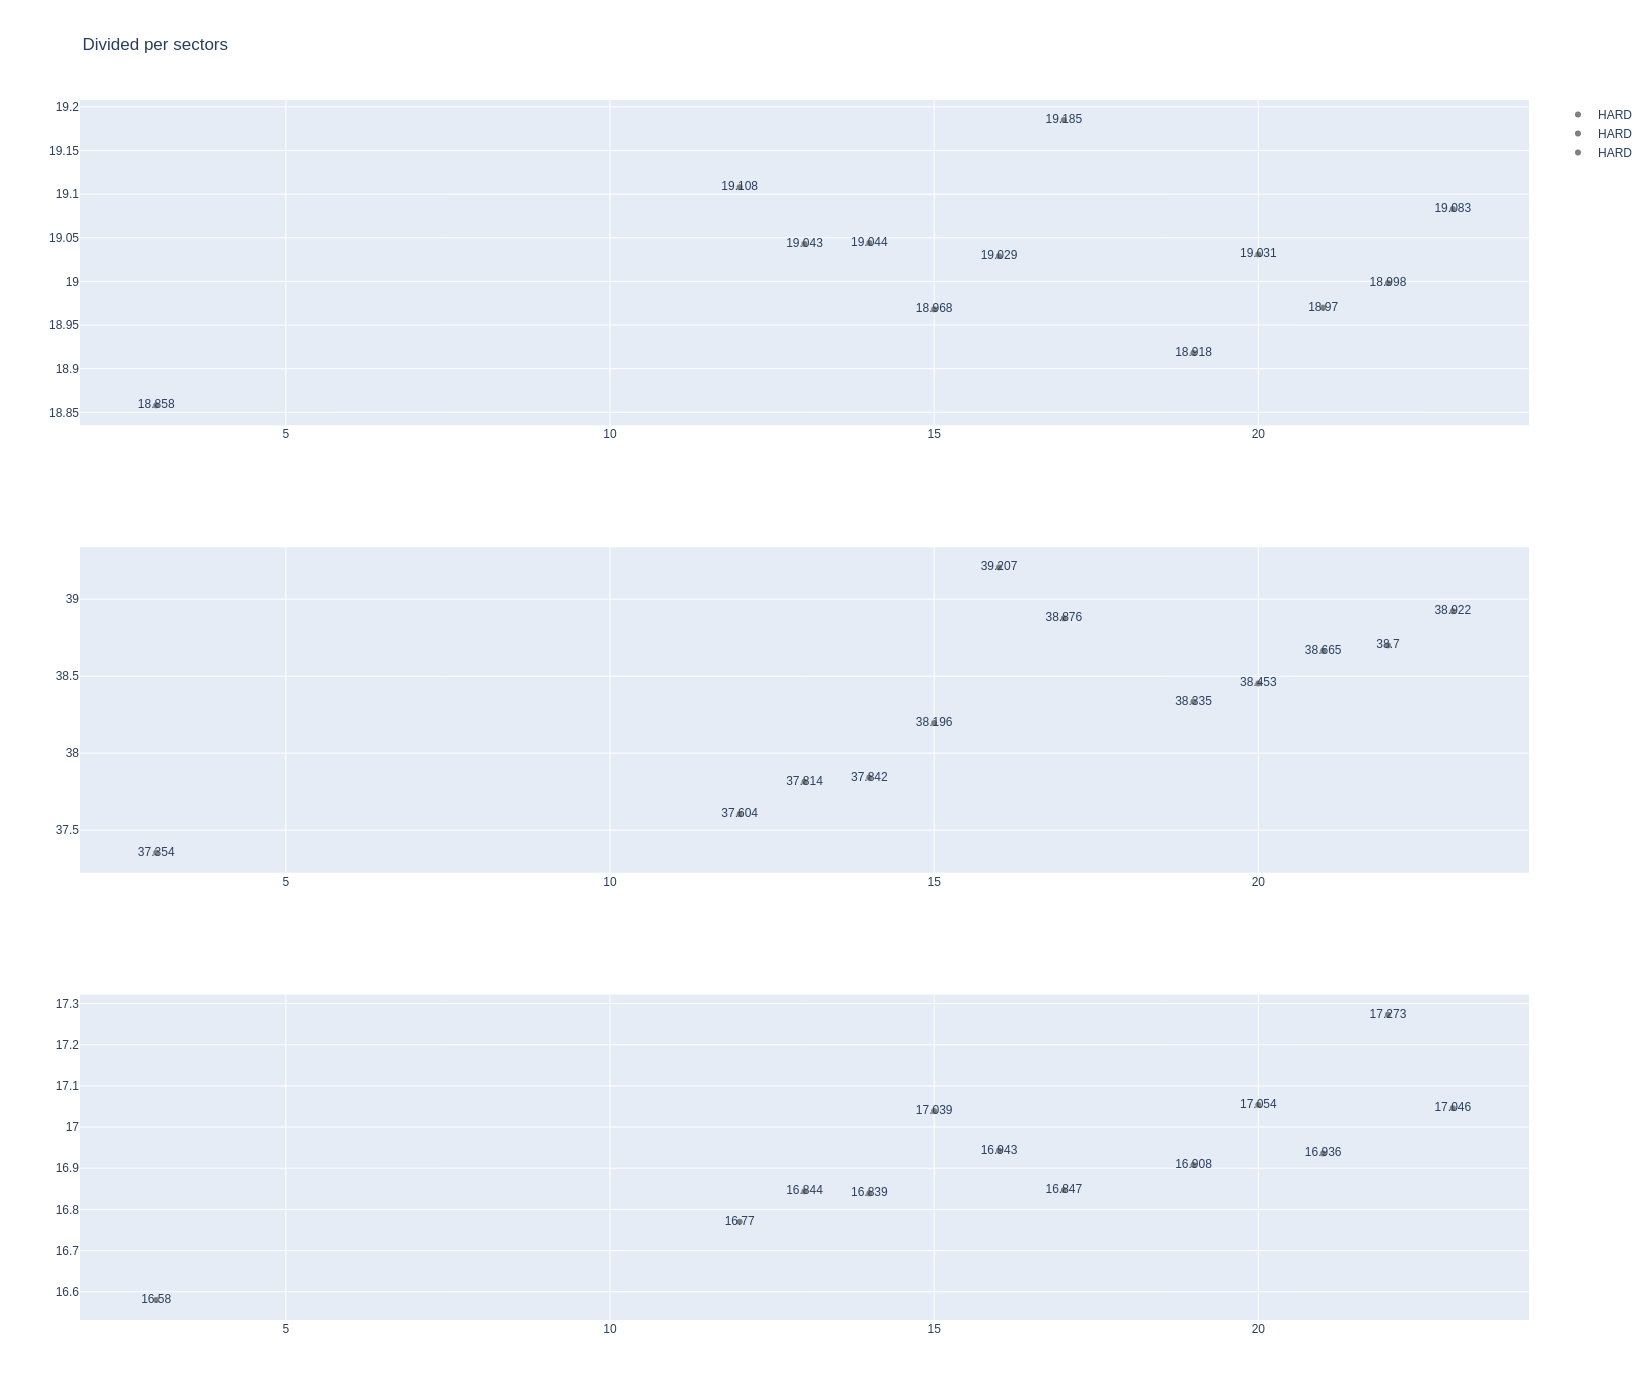

In [116]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [117]:
stintInformation.query('driver_number == 81 or driver_number == 4')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
13         1273         9859             1             81          1       11   
15         1273         9859             1              4          1       11   
39         1273         9859             2             81         12       23   
41         1273         9859             2              4         12       21   
51         1273         9859             3             81         24       26   
53         1273         9859             3              4         22       24   
72         1273         9859             4             81         27       33   
73         1273         9859             4              4         25       31   

   compound  tyre_age_at_start  
13     HARD                  0  
15     HARD                  0  
39     HARD                 11  
41     HARD                 11  
51   MEDIUM                  0  
53   MEDIUM                  0  
72   MEDIUM                  3  
73   MEDIUM                  3

In [118]:
data = libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
24   Lando NORRIS     HARD  2025-11-07T14:37:14.607000+00:00           2   
65   Lando NORRIS     HARD  2025-11-07T14:40:18.350000+00:00           4   
132  Lando NORRIS     HARD  2025-11-07T14:46:02.227000+00:00           8   
146  Lando NORRIS     HARD  2025-11-07T14:47:14.989000+00:00           9   
162  Lando NORRIS     HARD  2025-11-07T14:48:27.778000+00:00          10   
252  Lando NORRIS     HARD  2025-11-07T15:02:51.255000+00:00          13   
281  Lando NORRIS     HARD  2025-11-07T15:05:22.253000+00:00          15   
317  Lando NORRIS     HARD  2025-11-07T15:07:52.480000+00:00          17   
355  Lando NORRIS     HARD  2025-11-07T15:10:22.348000+00:00          19   
372  Lando NORRIS     HARD  2025-11-07T15:11:36.257000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
24              18.823             37.441             16.436        72.700  
65              18.506             36.964             16.581        72.051  
132             18.810             37.279             16.716        72.805  
146             18.662             37.248             16.795        72.705  
162             18.703             37.334             16.625        72.662  
252             18.519             37.513             16.504        72.536  
281             18.747             37.587             16.723        73.057  
317             18.904             37.857             16.765        73.526  
355             18.919             37.990             16.898        73.807  
372             18.830             37.923             16.959        73.712

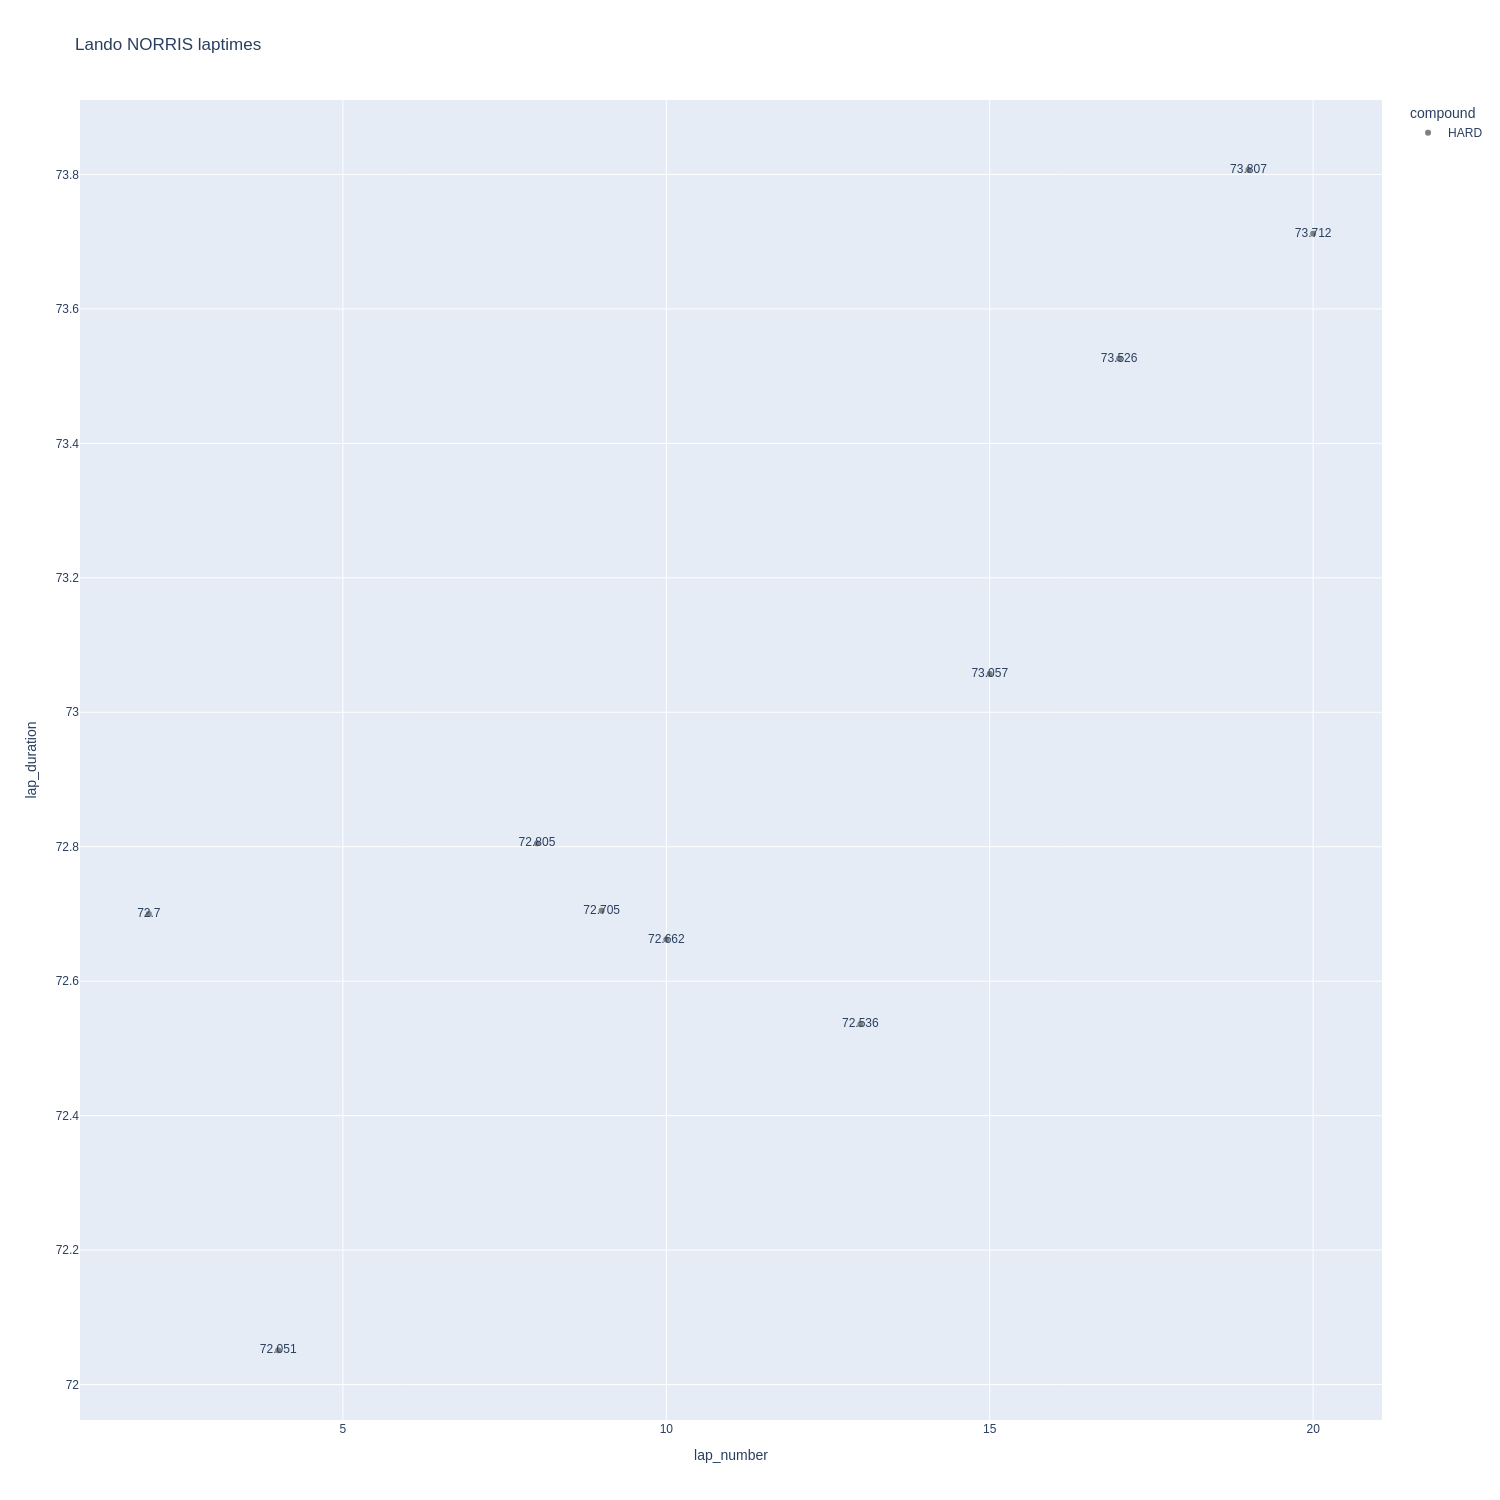

In [119]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

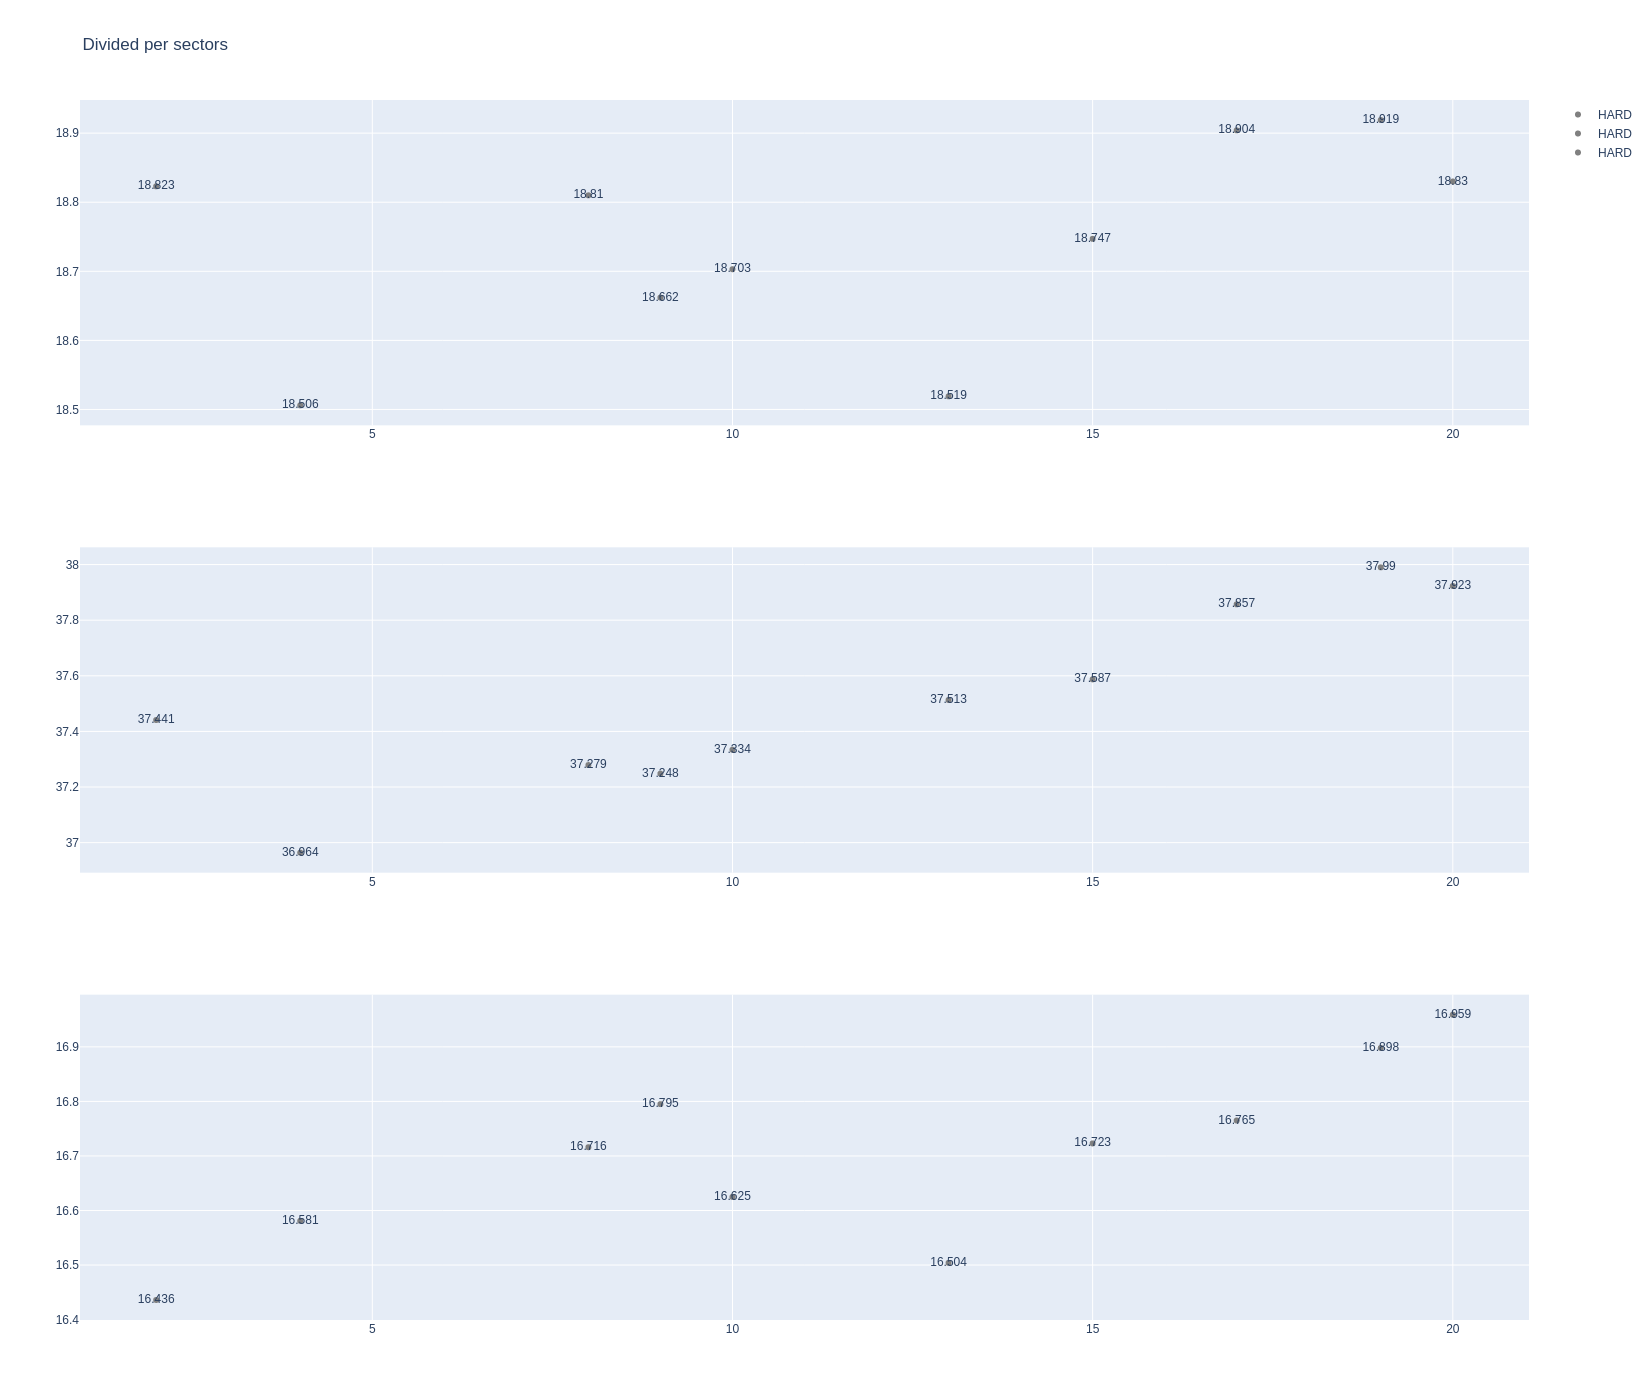

In [120]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [121]:
data = libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
40   Oscar PIASTRI     HARD  2025-11-07T14:38:31.408000+00:00           2   
86   Oscar PIASTRI     HARD  2025-11-07T14:41:47.644000+00:00           4   
169  Oscar PIASTRI     HARD  2025-11-07T14:49:29.506000+00:00           9   
182  Oscar PIASTRI     HARD  2025-11-07T14:50:42.077000+00:00          10   
301  Oscar PIASTRI     HARD  2025-11-07T15:06:41.656000+00:00          16   
319  Oscar PIASTRI     HARD  2025-11-07T15:07:57.708000+00:00          17   
338  Oscar PIASTRI     HARD  2025-11-07T15:09:11.469000+00:00          18   
356  Oscar PIASTRI     HARD  2025-11-07T15:10:25.611000+00:00          19   
373  Oscar PIASTRI     HARD  2025-11-07T15:11:39.469000+00:00          20   
390  Oscar PIASTRI     HARD  2025-11-07T15:12:53.229000+00:00          21   
405  Oscar PIASTRI     HARD  2025-11-07T15:14:07.088000+00:00          22   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
40              18.730             36.703             16.736        72.169  
86              18.531             36.976             16.708        72.215  
169             18.775             37.033             16.753        72.561  
182             18.877             37.172             16.807        72.856  
301             20.341             38.753             16.855        75.949  
319             19.147             37.783             16.925        73.855  
338             19.019             37.949             17.121        74.089  
356             18.961             37.851             17.008        73.820  
373             18.934             37.865             17.058        73.857  
390             18.953             37.894             16.993        73.840  
405             18.854             37.851             16.827        73.532

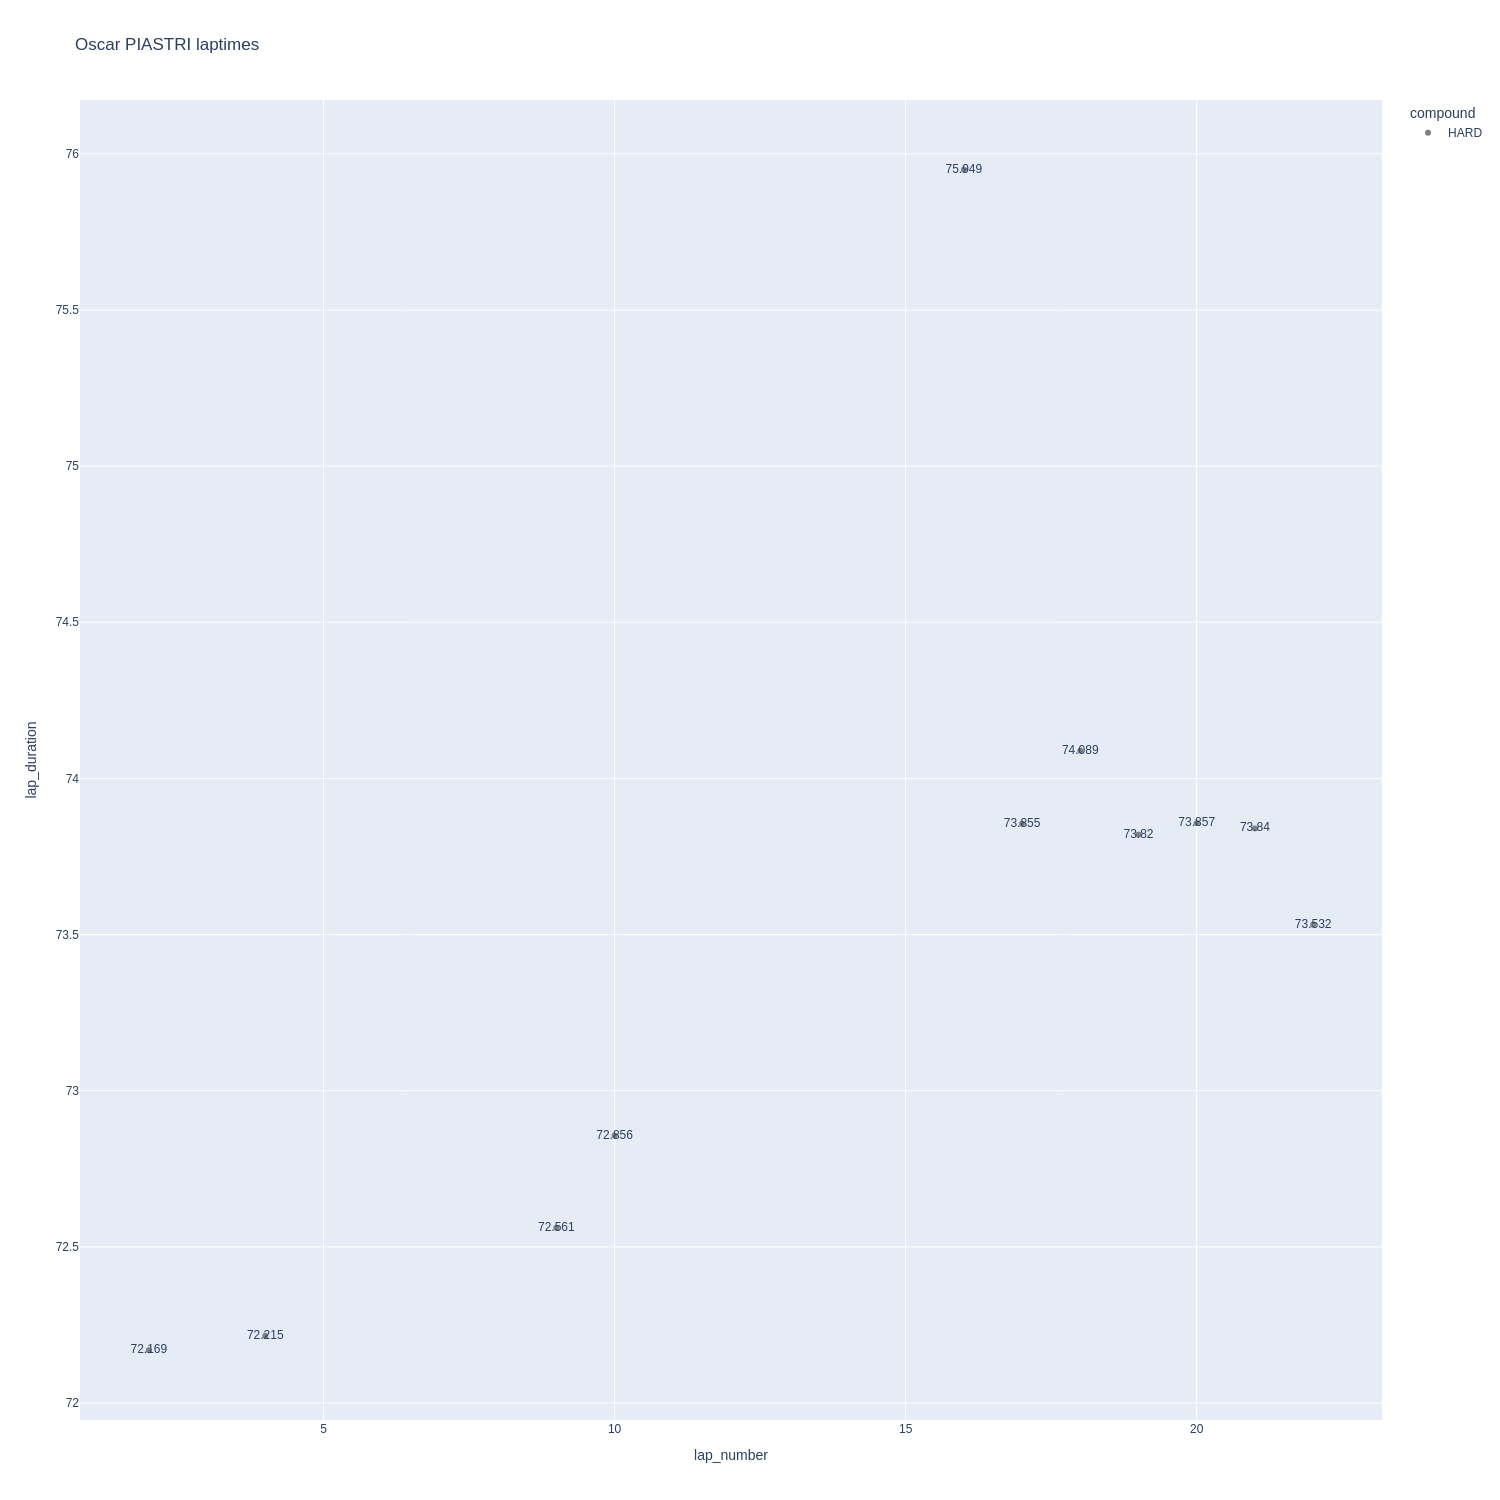

In [122]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

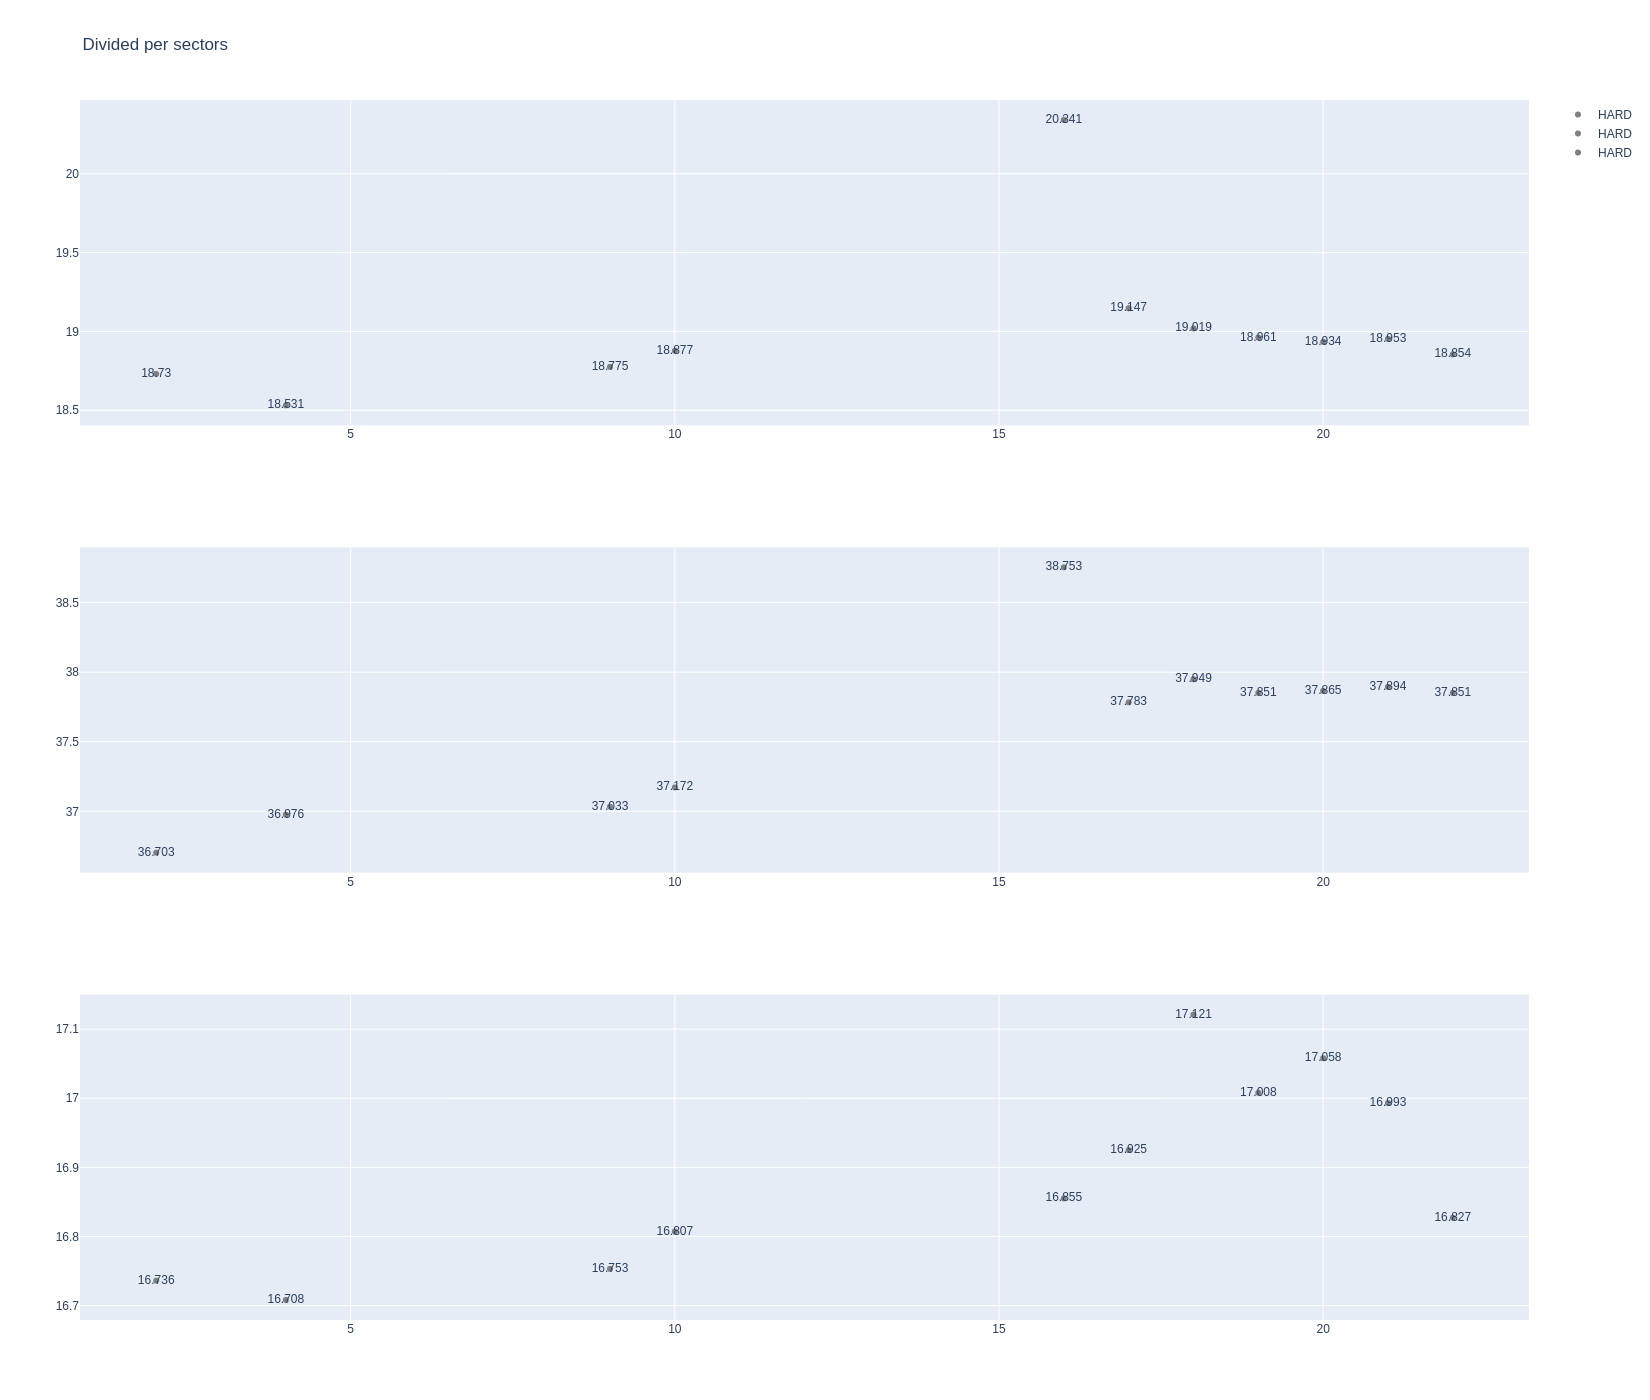

In [123]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [124]:
stintInformation.query('driver_number == 18 or driver_number == 14')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
2          1273         9859             1             14          1        7   
9          1273         9859             1             18          1        9   
26         1273         9859             2             14          8       17   
30         1273         9859             2             18         10       19   
43         1273         9859             3             18         20       22   
50         1273         9859             3             14         18       20   
65         1273         9859             4             14         21       23   
71         1273         9859             5             14         24       26   
82         1273         9859             4             18         23       31   

   compound  tyre_age_at_start  
2      HARD                  0  
9      HARD                  0  
26     HARD                  0  
30     HARD                  9  
43   MEDIUM                  0  
50   MEDIUM                  0  
65   MEDIUM                  3  
71     HARD                 17  
82   MEDIUM                  0

In [125]:
data = libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
27   Fernando ALONSO     HARD  2025-11-07T14:37:33.946000+00:00           2   
68   Fernando ALONSO     HARD  2025-11-07T14:40:33.492000+00:00           4   
107  Fernando ALONSO     HARD  2025-11-07T14:43:53.520000+00:00           6   
222  Fernando ALONSO     HARD  2025-11-07T14:57:38.276000+00:00           9   
264  Fernando ALONSO     HARD  2025-11-07T15:03:56.841000+00:00          13   
278  Fernando ALONSO     HARD  2025-11-07T15:05:09.330000+00:00          14   
296  Fernando ALONSO     HARD  2025-11-07T15:06:22.823000+00:00          15   
313  Fernando ALONSO     HARD  2025-11-07T15:07:36.856000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
27              18.821             37.145             16.696        72.662  
68              18.654             37.054             16.758        72.466  
107             18.479             36.840             16.754        72.073  
222             18.639             36.905             16.608        72.152  
264             18.475             37.135             16.830        72.440  
278             18.823             37.697             16.876        73.396  
296             19.107             37.934             16.973        74.014  
313             19.008             38.410             16.981        74.399

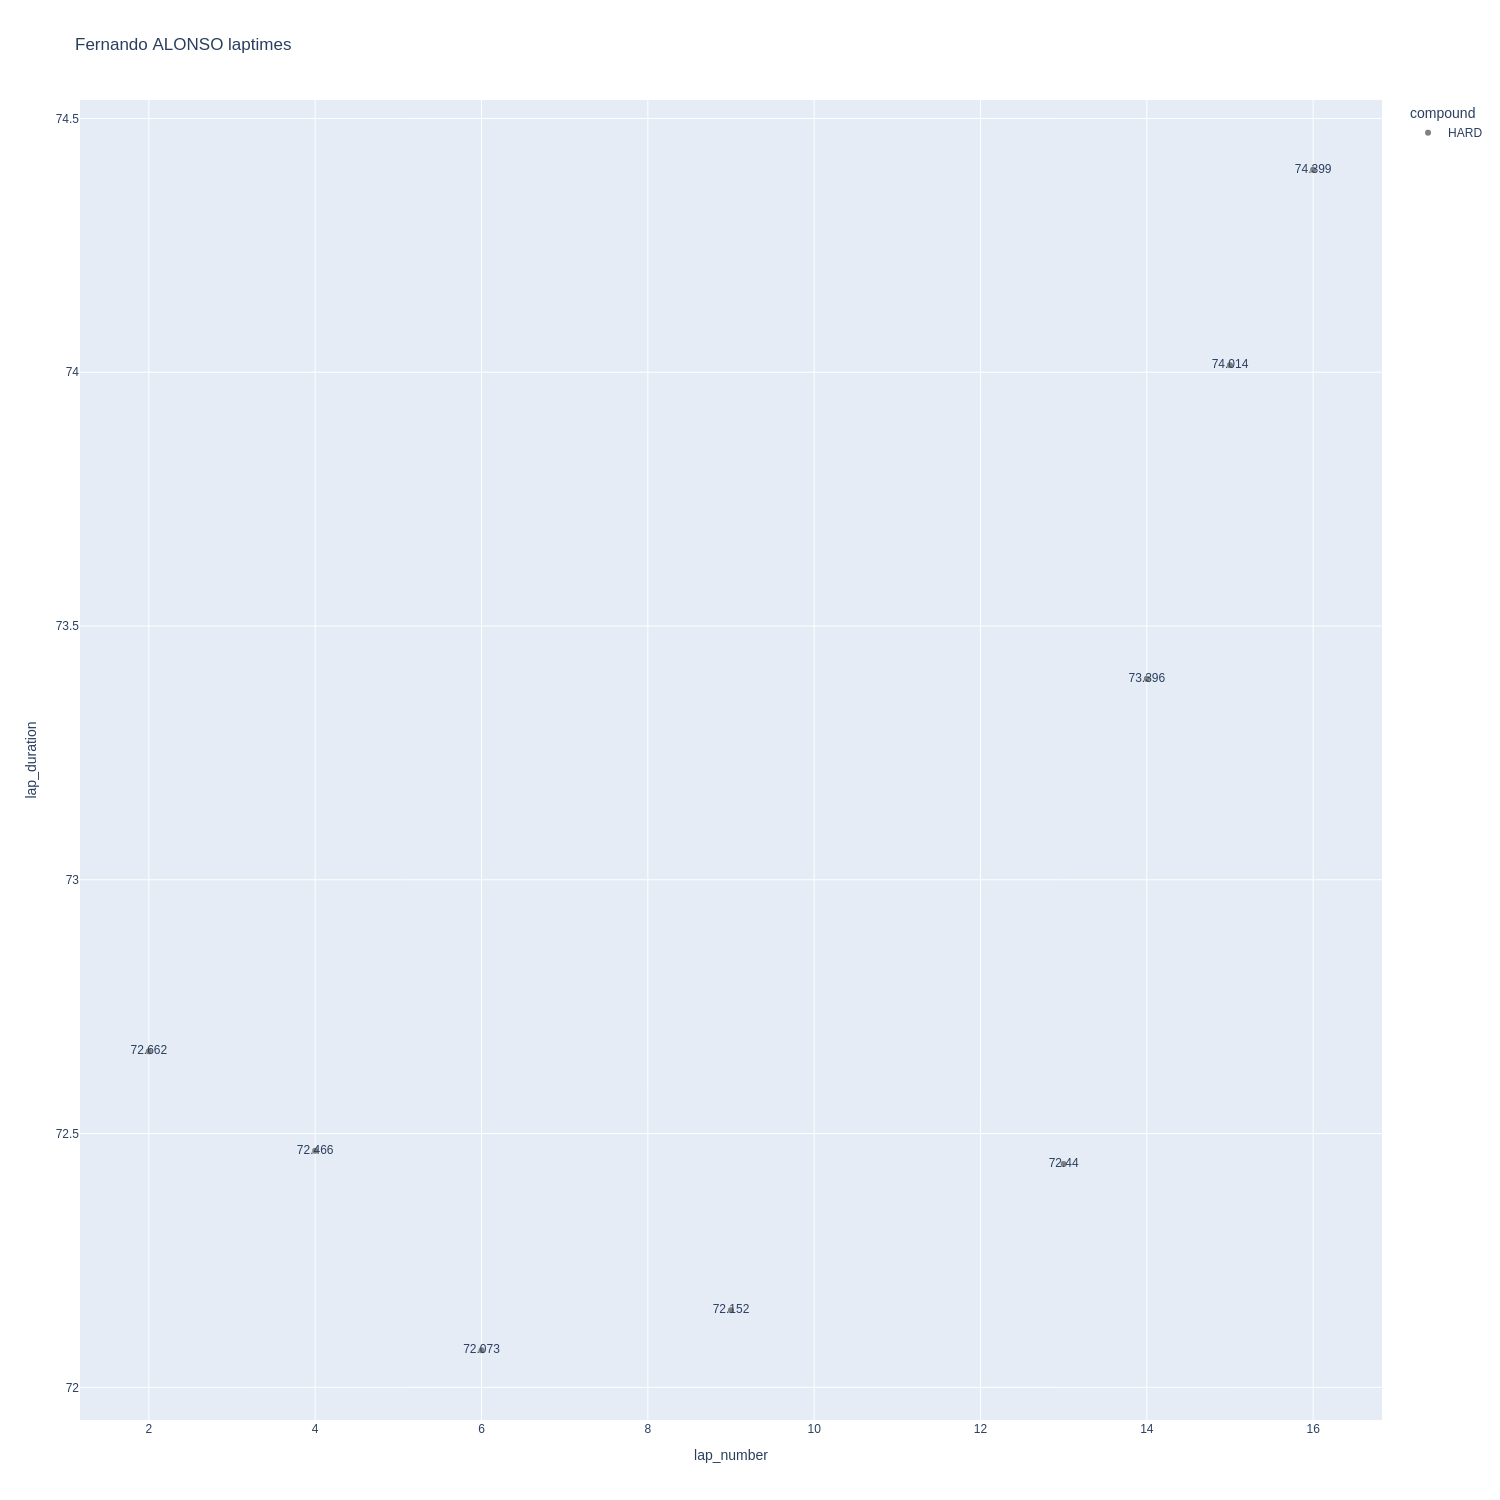

In [126]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

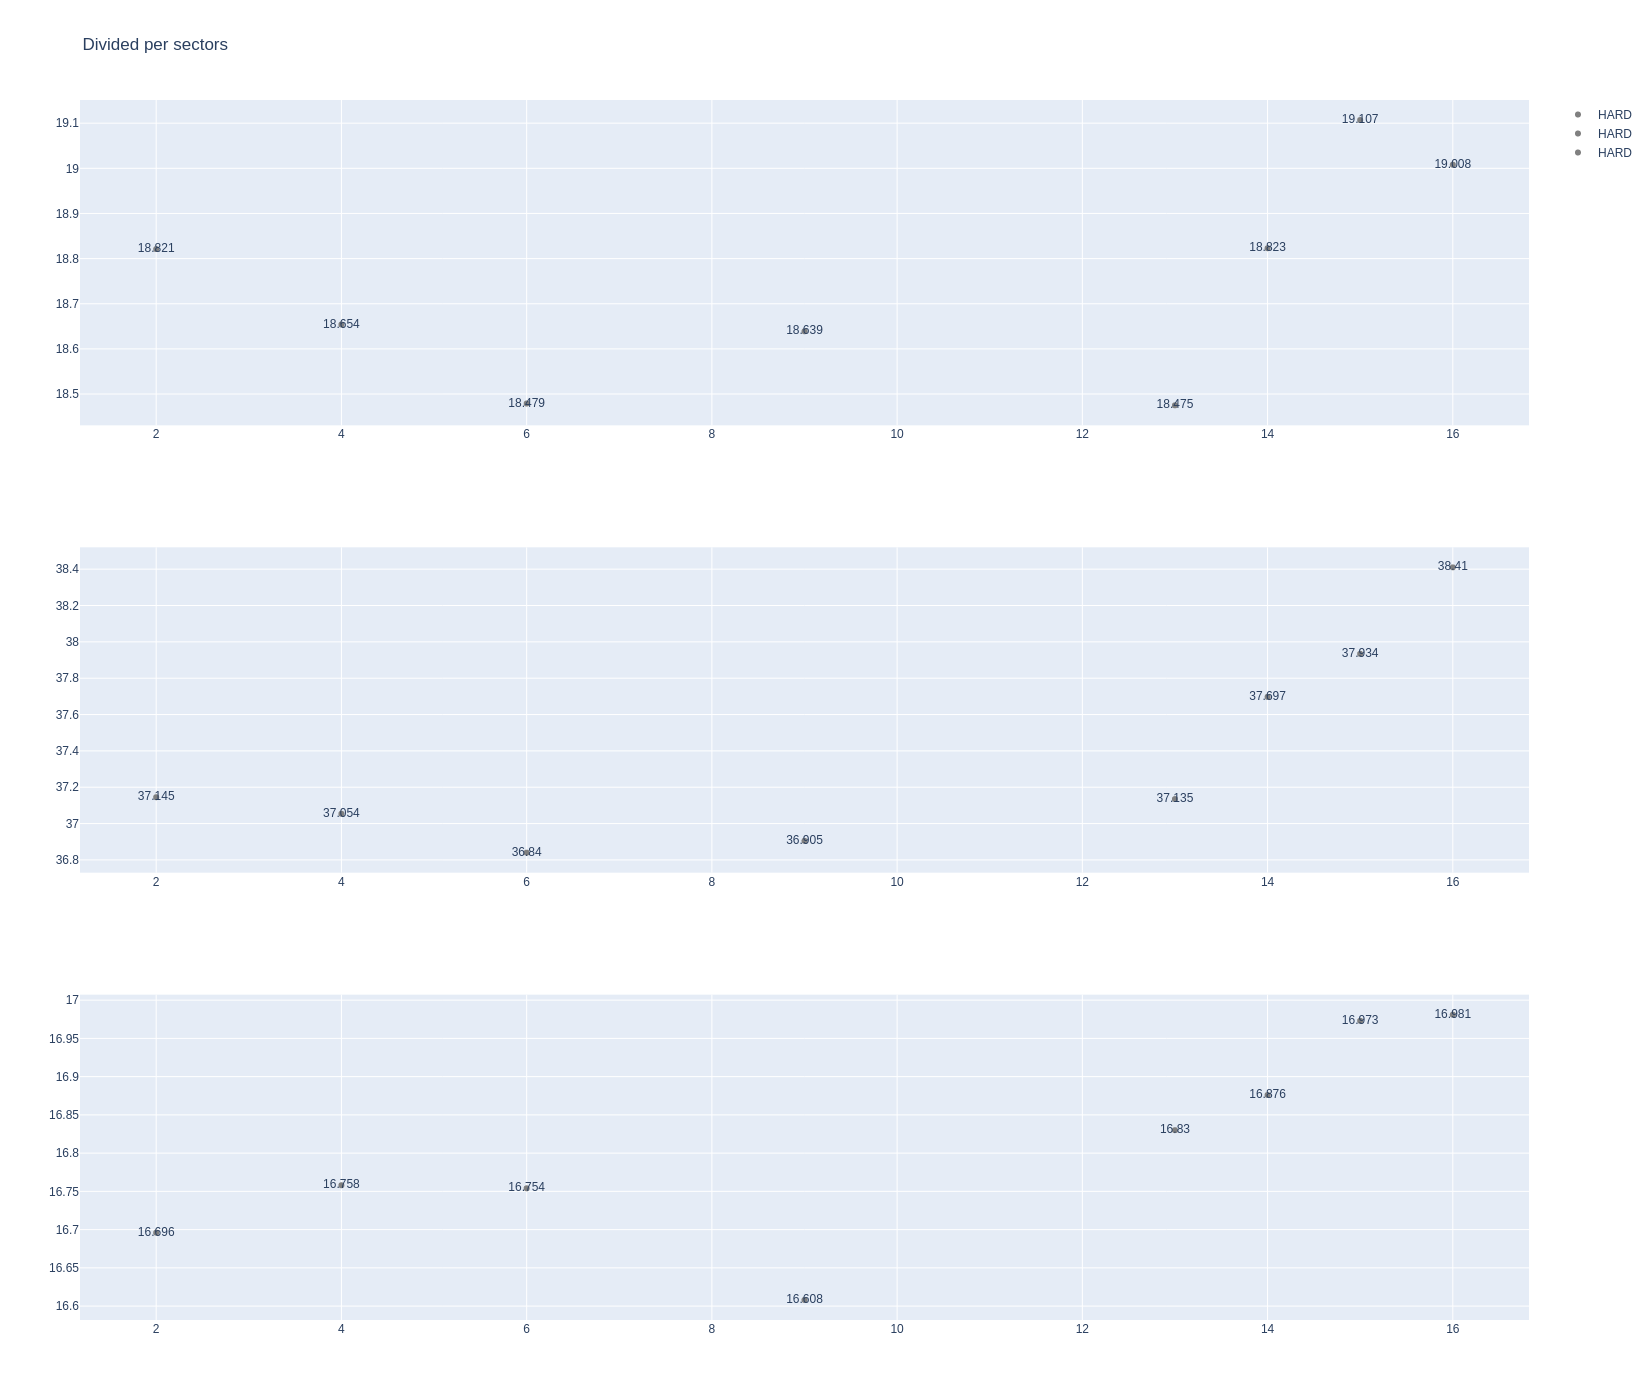

In [127]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [128]:
data = libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
28   Lance STROLL     HARD  2025-11-07T14:37:39.436000+00:00           2   
69   Lance STROLL     HARD  2025-11-07T14:40:38.480000+00:00           4   
109  Lance STROLL     HARD  2025-11-07T14:44:02.697000+00:00           6   
148  Lance STROLL     HARD  2025-11-07T14:47:25.109000+00:00           8   
224  Lance STROLL     HARD  2025-11-07T14:57:43.550000+00:00          11   
237  Lance STROLL     HARD  2025-11-07T15:00:47.692000+00:00          13   
244  Lance STROLL     HARD  2025-11-07T15:02:01.494000+00:00          14   
258  Lance STROLL     HARD  2025-11-07T15:03:15.381000+00:00          15   
271  Lance STROLL     HARD  2025-11-07T15:04:29.800000+00:00          16   
287  Lance STROLL     HARD  2025-11-07T15:05:44.194000+00:00          17   
305  Lance STROLL     HARD  2025-11-07T15:06:58.645000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
28              18.967             37.590             16.711        73.268  
69              18.570             37.232             16.751        72.553  
109             18.386             37.029             16.839        72.254  
148             18.624             37.258             16.664        72.546  
224             18.631             37.123             19.795        75.549  
237             19.105             37.754             16.927        73.786  
244             19.021             37.941             16.951        73.913  
258             19.154             38.337             17.014        74.505  
271             19.042             38.198             17.071        74.311  
287             19.013             38.349             17.123        74.485  
305             18.910             38.461             17.070        74.441

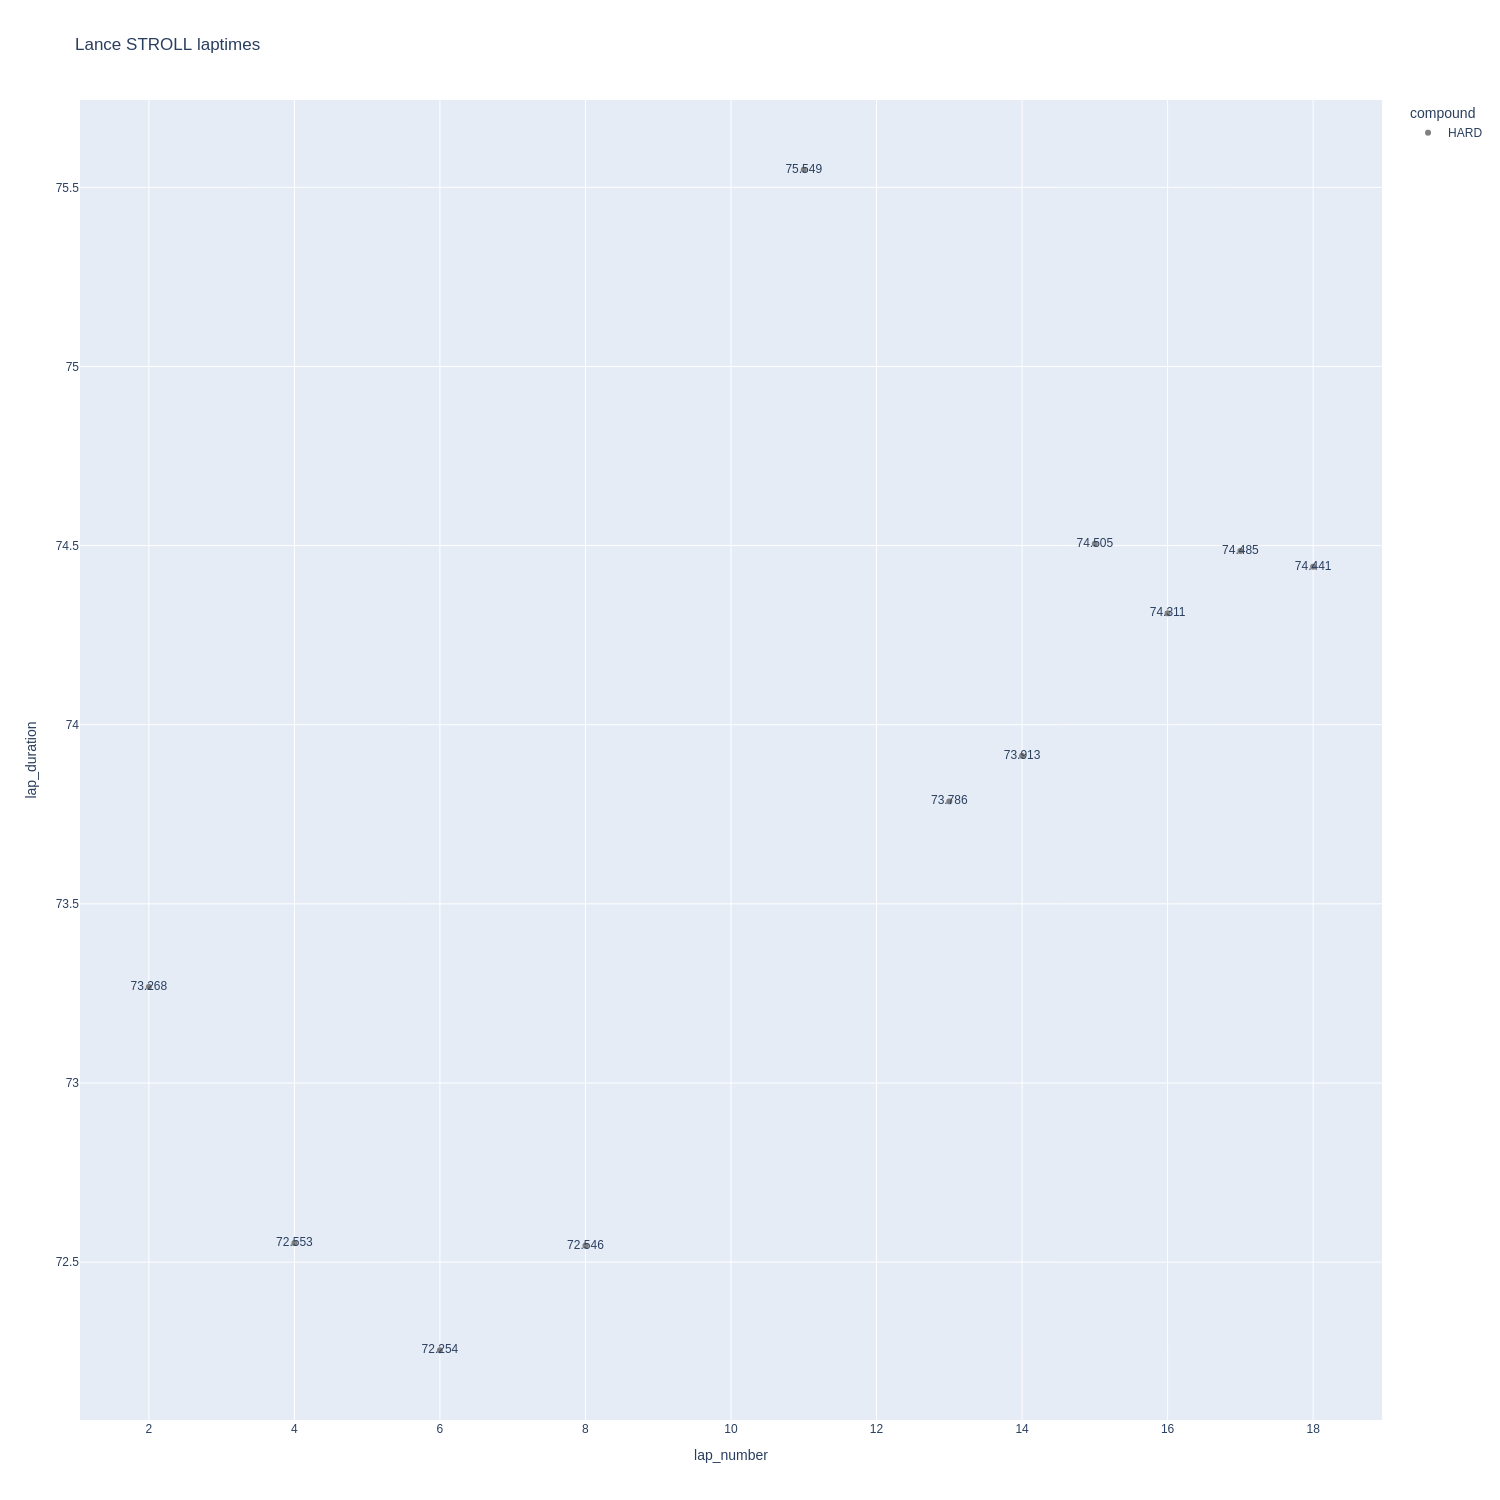

In [129]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

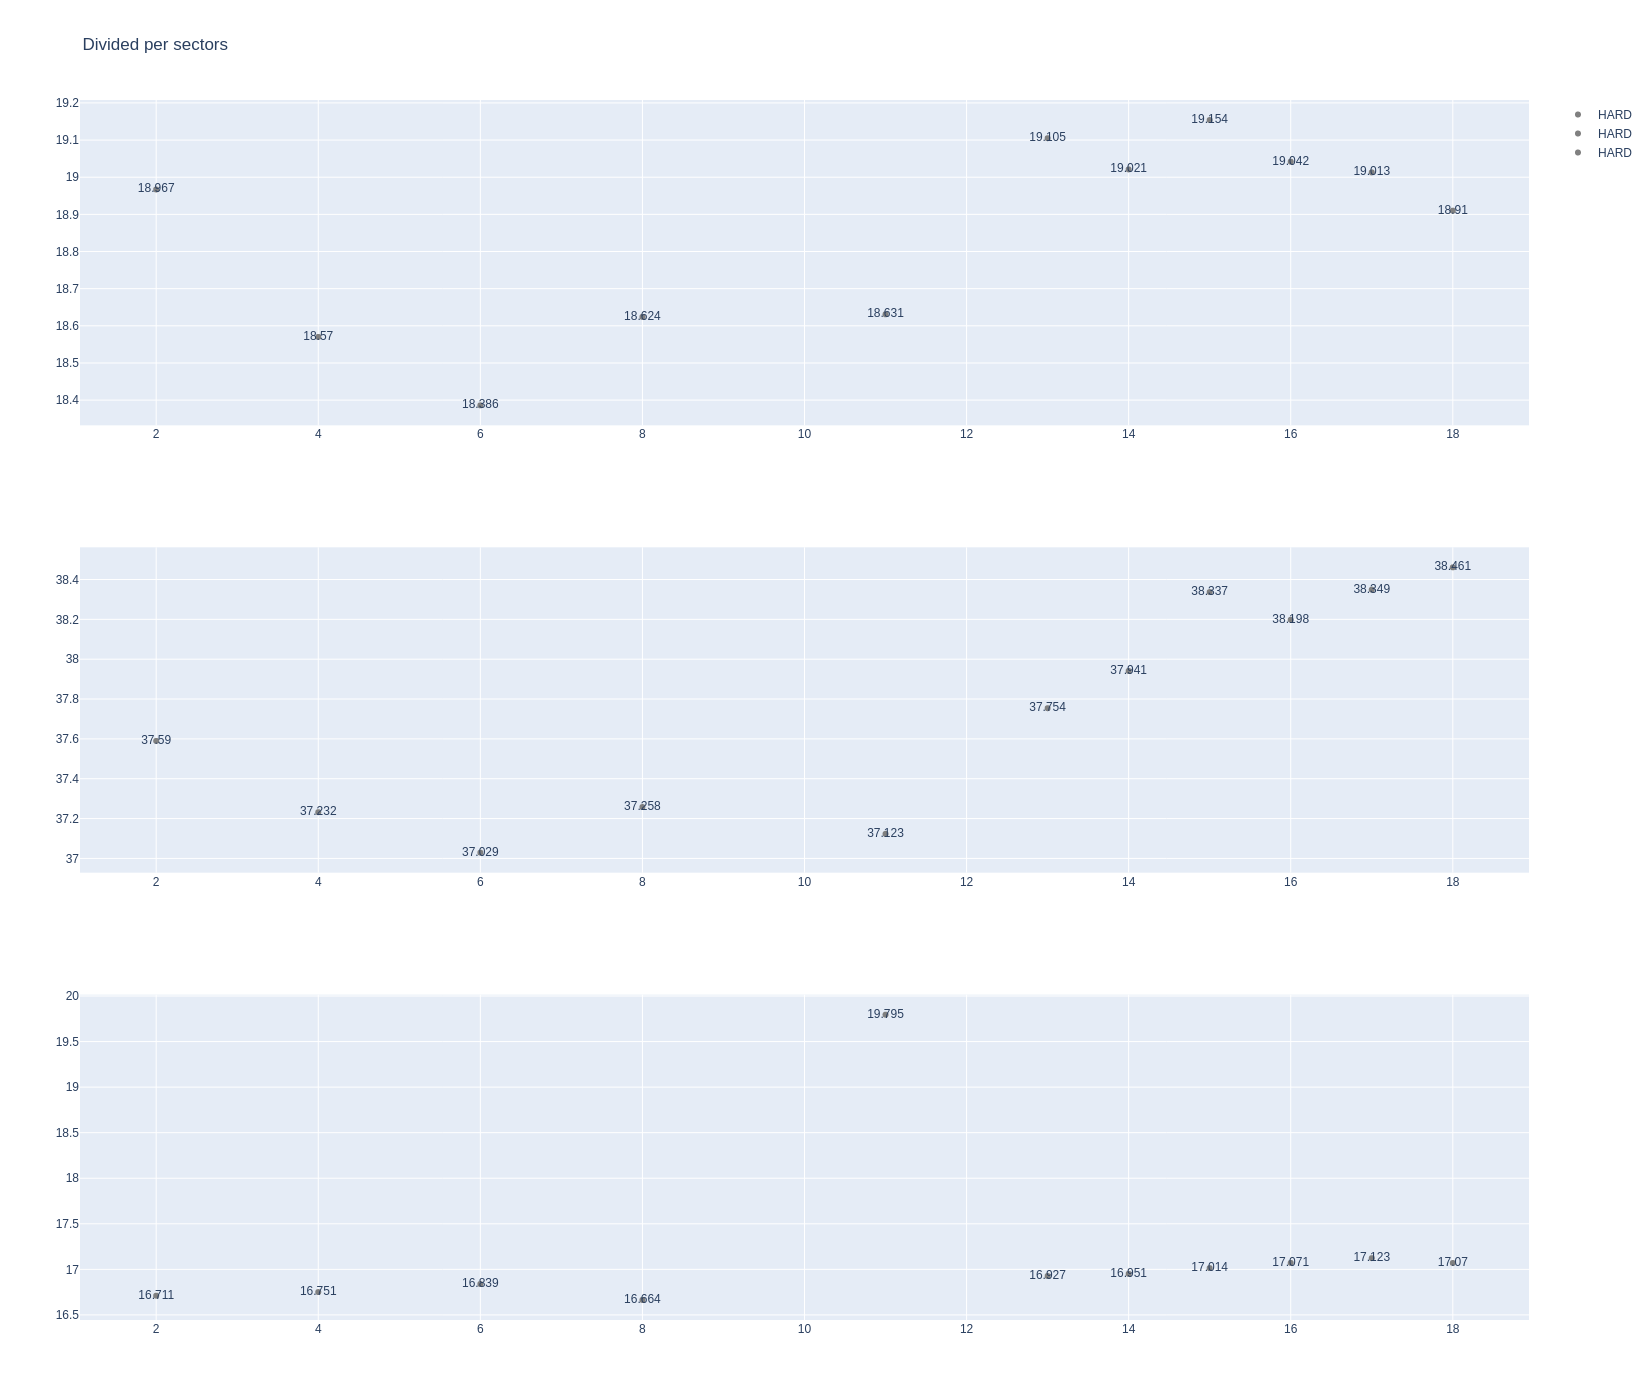

In [130]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [131]:
stintInformation.query('driver_number == 30 or driver_number == 6')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
1          1273         9859             1             30          1        6   
3          1273         9859             1              6          1        6   
7          1273         9859             2             30          7       11   
14         1273         9859             2              6          7       12   
18         1273         9859             3             30         12       14   
32         1273         9859             3              6         13       20   
35         1273         9859             4             30         15       24   
56         1273         9859             5             30         25       30   
59         1273         9859             4              6         21       26   
80         1273         9859             5              6         27       31   
83         1273         9859             6             30         31       36   

   compound  tyre_age_at_start  
1      HARD                  0  
3      HARD                  0  
7      HARD                  0  
14     HARD                  6  
18     HARD                 11  
32     HARD                 12  
35     HARD                  0  
56   MEDIUM                  0  
59   MEDIUM                  0  
80   MEDIUM                  6  
83   MEDIUM                  0

In [132]:
data = libraryDataF1.getinfolongruns(jointables2,30,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
21   Liam LAWSON     HARD  2025-11-07T14:36:43.026000+00:00           2   
74   Liam LAWSON     HARD  2025-11-07T14:41:07.377000+00:00           5   
150  Liam LAWSON     HARD  2025-11-07T14:47:34.706000+00:00           9   
265  Liam LAWSON     HARD  2025-11-07T15:04:00.087000+00:00          16   
279  Liam LAWSON     HARD  2025-11-07T15:05:14.596000+00:00          17   
298  Liam LAWSON     HARD  2025-11-07T15:06:28.881000+00:00          18   
315  Liam LAWSON     HARD  2025-11-07T15:07:43.926000+00:00          19   
334  Liam LAWSON     HARD  2025-11-07T15:08:59.073000+00:00          20   
352  Liam LAWSON     HARD  2025-11-07T15:10:13.931000+00:00          21   
369  Liam LAWSON     HARD  2025-11-07T15:11:28.773000+00:00          22   
386  Liam LAWSON     HARD  2025-11-07T15:12:43.426000+00:00          23   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
21              19.321             37.868             16.931        74.120  
74              18.699             37.403             16.730        72.832  
150             18.535             37.008             16.558        72.101  
265             19.141             38.238             17.016        74.395  
279             19.084             38.059             17.184        74.327  
298             19.285             38.620             17.122        75.027  
315             19.230             38.765             17.151        75.146  
334             19.270             38.421             17.198        74.889  
352             19.032             38.670             17.058        74.760  
369             19.035             38.496             17.142        74.673  
386             19.124             38.867             17.270        75.261

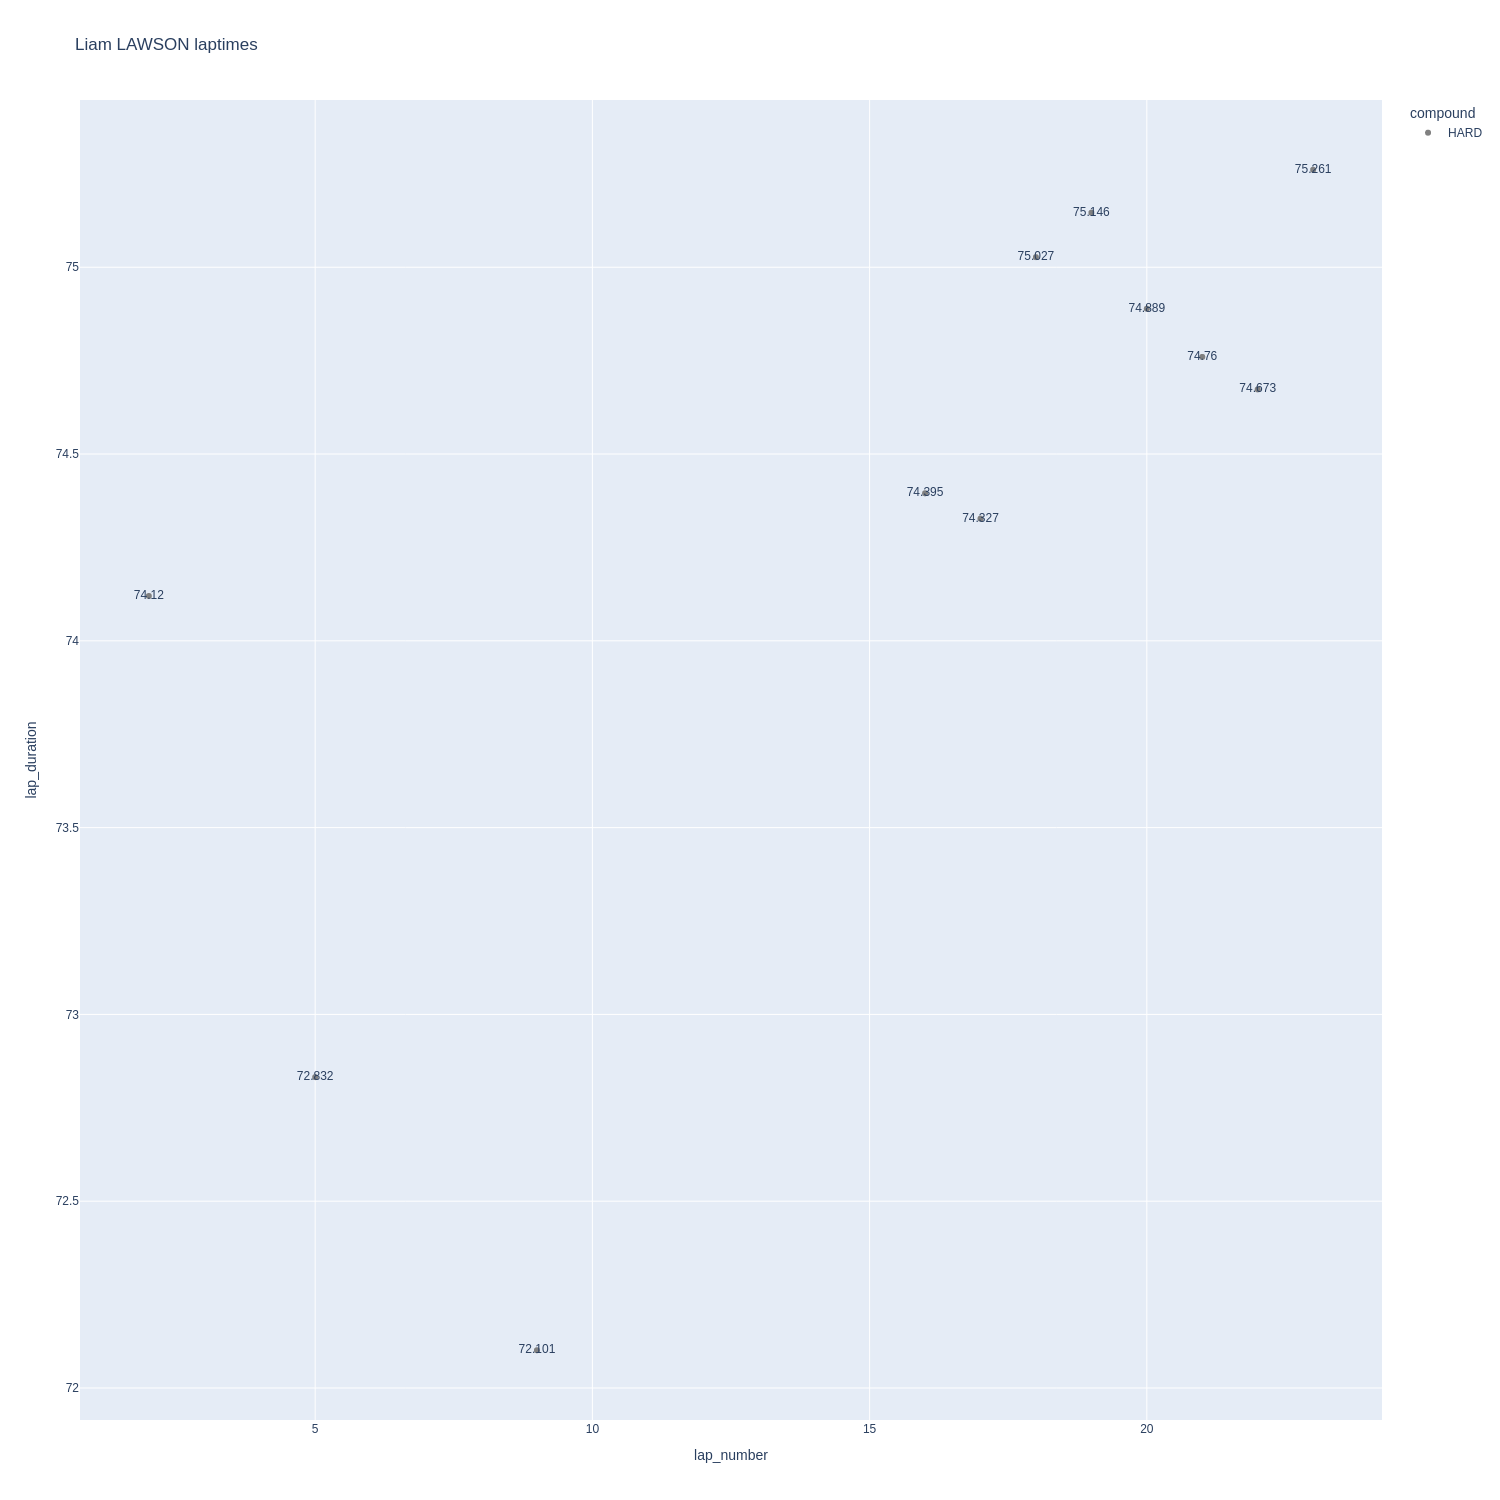

In [133]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

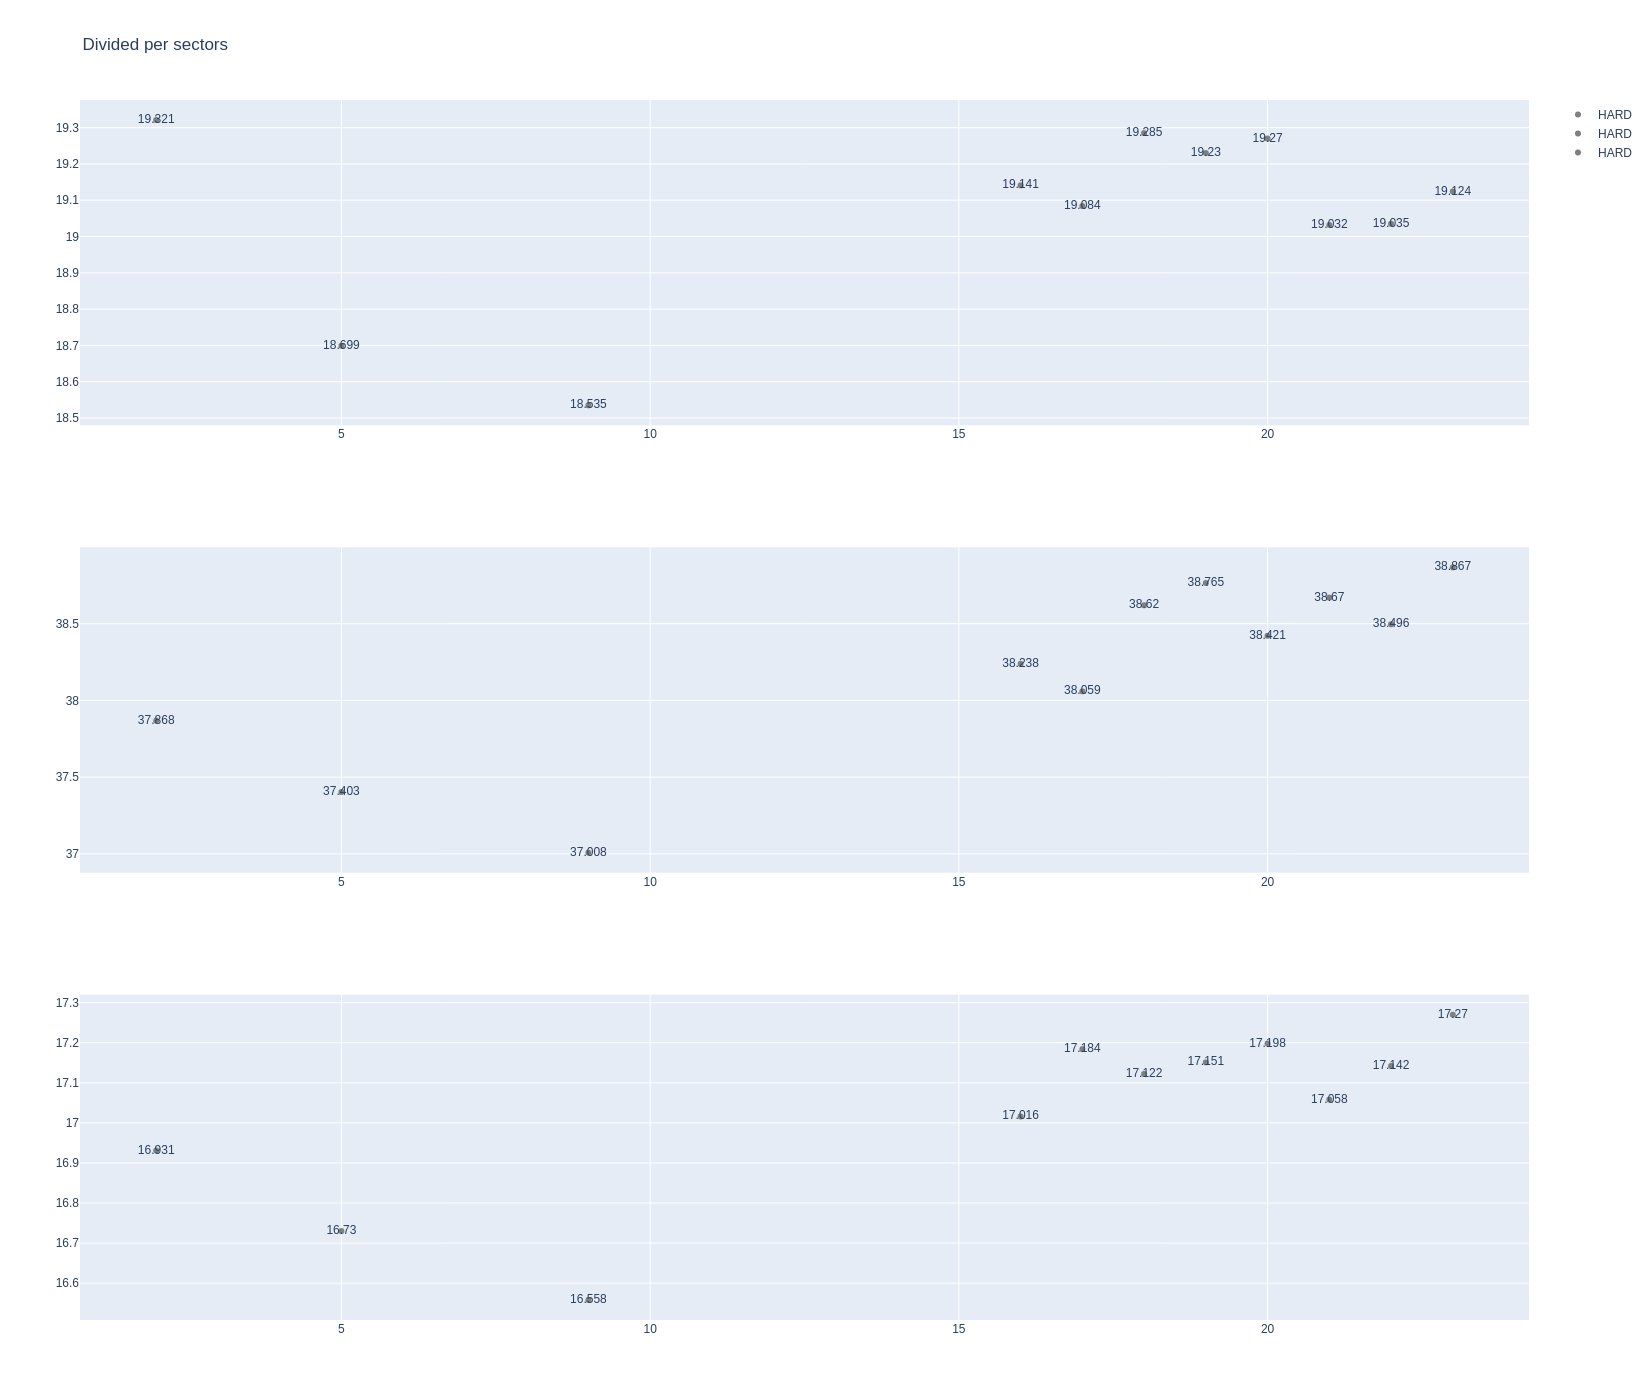

In [134]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [135]:
data = libraryDataF1.getinfolongruns(jointables2,6,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
44   Isack HADJAR     HARD  2025-11-07T14:38:45.125000+00:00           2   
62   Isack HADJAR     HARD  2025-11-07T14:39:58.521000+00:00           3   
99   Isack HADJAR     HARD  2025-11-07T14:43:10.721000+00:00           5   
248  Isack HADJAR     HARD  2025-11-07T15:02:15.522000+00:00          14   
261  Isack HADJAR     HARD  2025-11-07T15:03:30.818000+00:00          15   
275  Isack HADJAR     HARD  2025-11-07T15:04:45.725000+00:00          16   
292  Isack HADJAR     HARD  2025-11-07T15:06:00.330000+00:00          17   
327  Isack HADJAR     HARD  2025-11-07T15:08:30.730000+00:00          19   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
44              19.038             37.639             16.791        73.468  
62              18.622             37.585             16.857        73.064  
99              18.449             37.429             16.744        72.622  
248             19.729             38.508             17.051        75.288  
261             19.234             38.569             17.088        74.891  
275             19.062             38.503             17.066        74.631  
292             18.943             38.344             17.059        74.346  
327             19.235             38.655             17.338        75.228

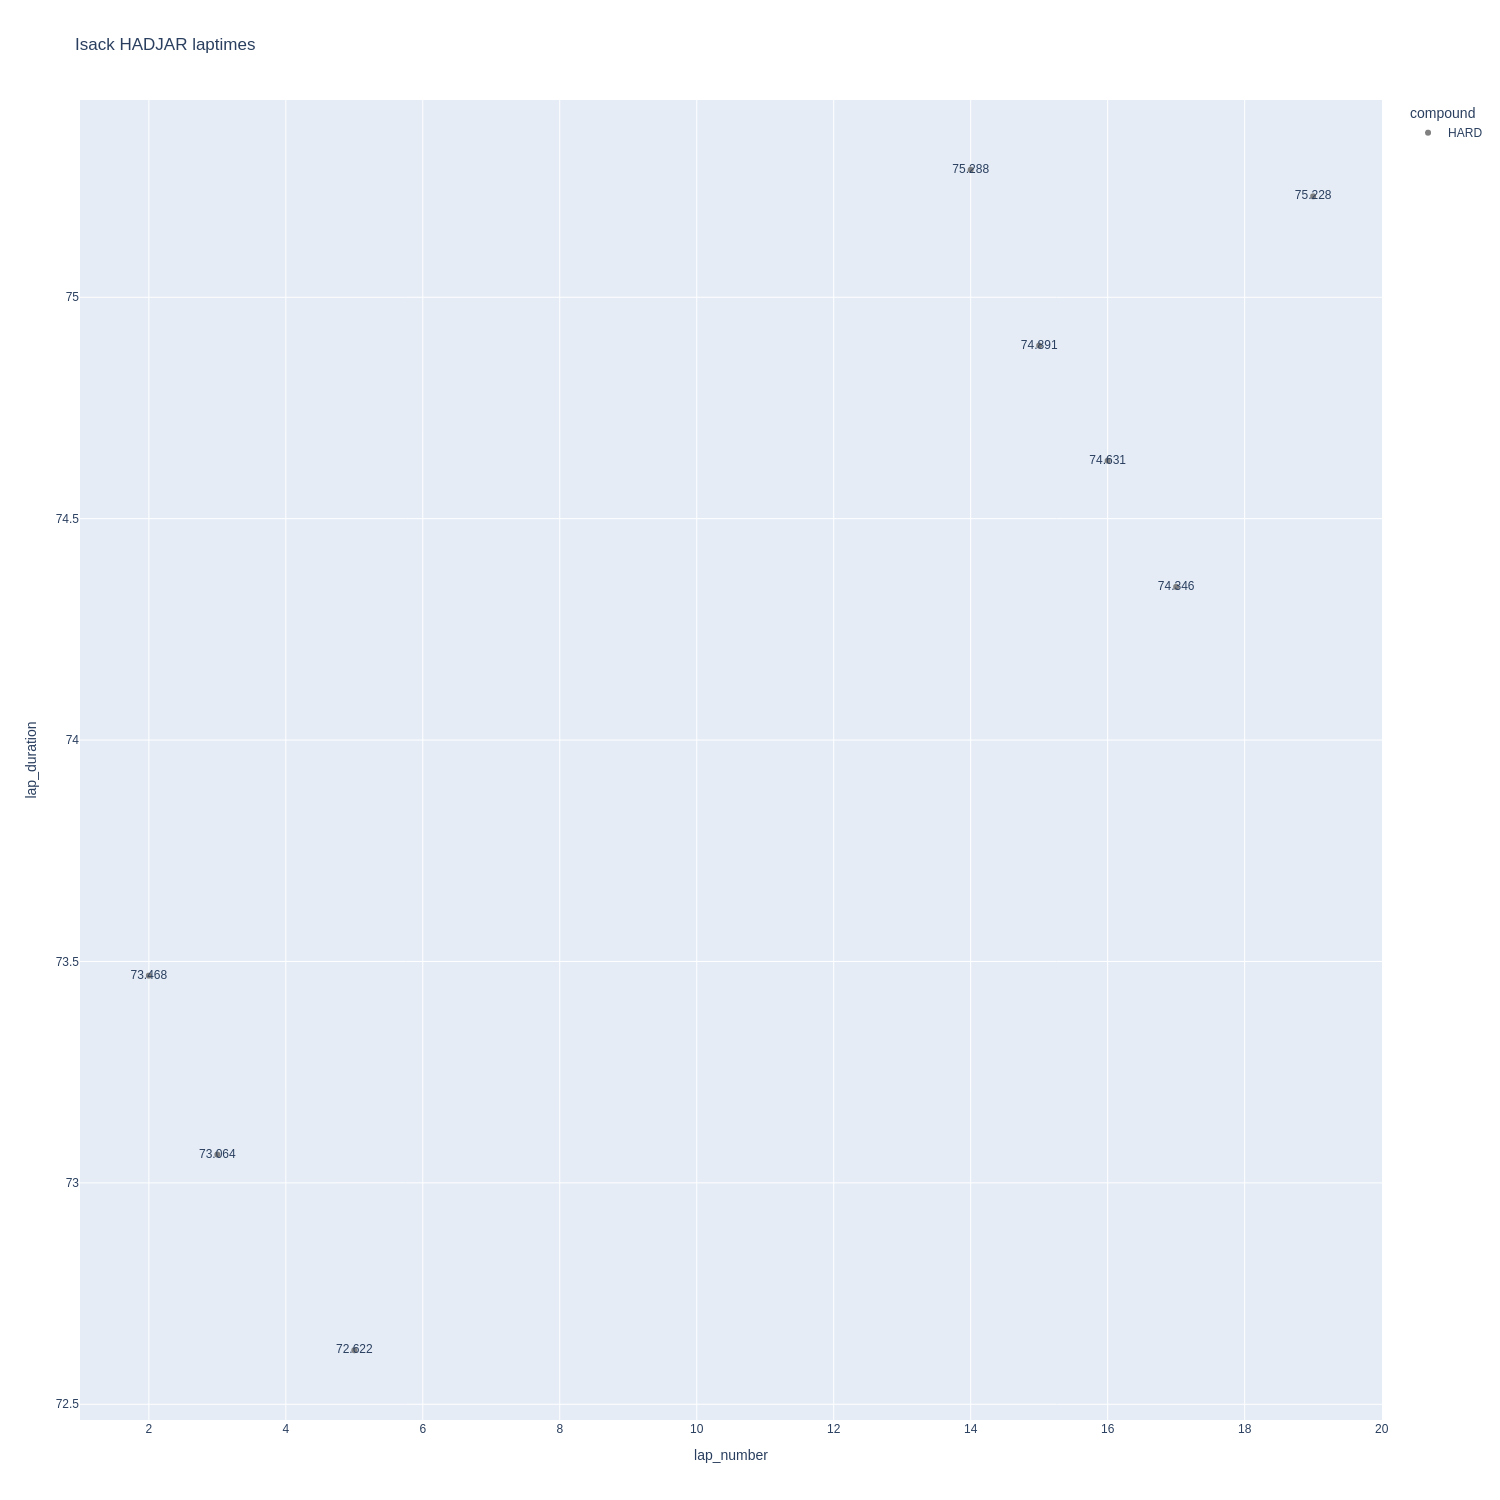

In [136]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

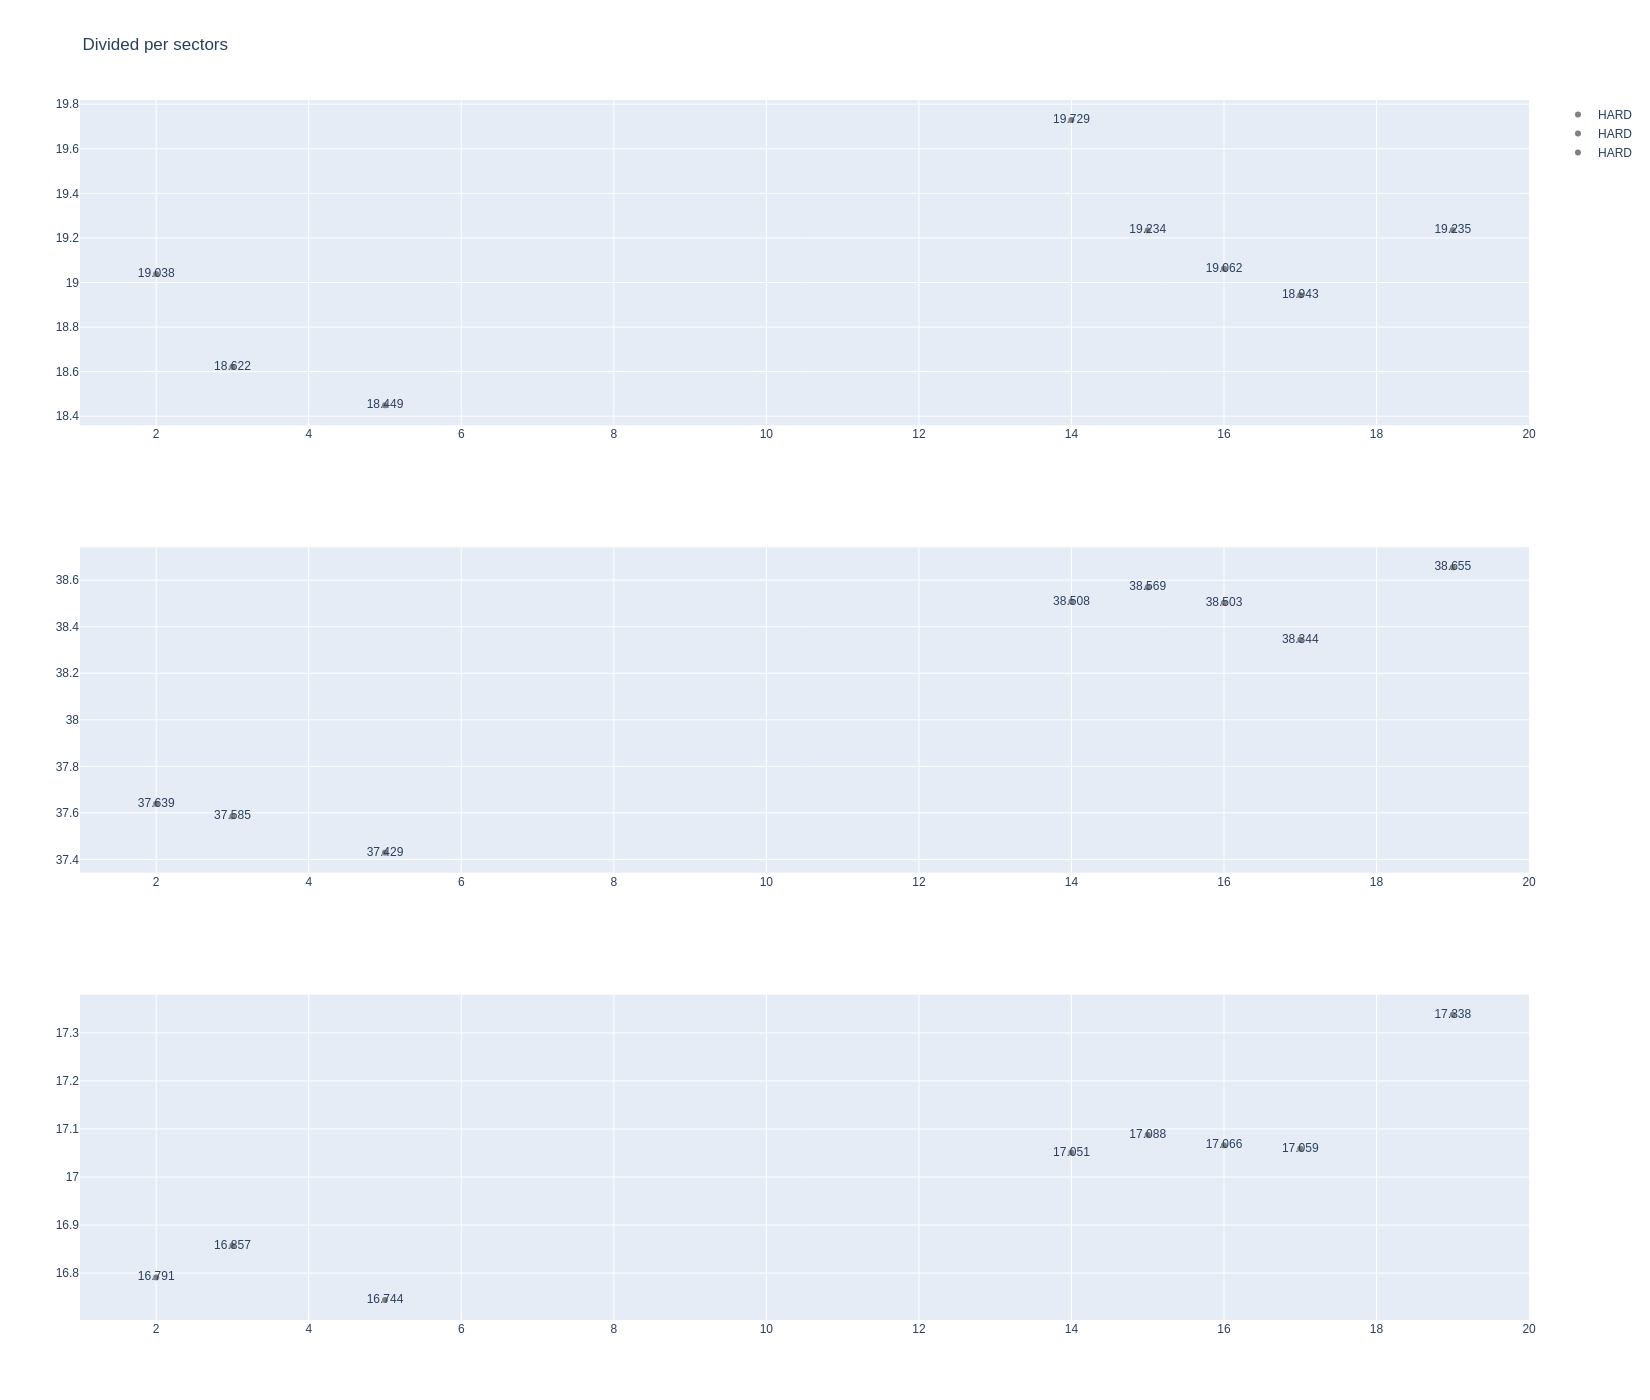

In [137]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [138]:
stintInformation.query('driver_number == 31 or driver_number == 87')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
6          1273         9859             1             87          1        9   
23         1273         9859             2             87         10       13   
25         1273         9859             1             31          1       11   
34         1273         9859             3             87         14       22   
36         1273         9859             2             31         12       19   
48         1273         9859             4             87         23       25   
49         1273         9859             3             31         20       22   
60         1273         9859             5             87         26       28   
62         1273         9859             4             31         23       25   
67         1273         9859             6             87         29       32   
75         1273         9859             5             31         26       29   

   compound  tyre_age_at_start  
6      HARD                  0  
23     HARD                  9  
25     HARD                  0  
34     HARD                 13  
36     HARD                 11  
48   MEDIUM                  0  
49   MEDIUM                  0  
60   MEDIUM                  3  
62   MEDIUM                  3  
67   MEDIUM                  6  
75   MEDIUM                  6

In [139]:
data = libraryDataF1.getinfolongruns(jointables2,31,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
25   Esteban OCON     HARD  2025-11-07T14:37:20.725000+00:00           2   
41   Esteban OCON     HARD  2025-11-07T14:38:35.405000+00:00           3   
105  Esteban OCON     HARD  2025-11-07T14:43:42.512000+00:00           6   
143  Esteban OCON     HARD  2025-11-07T14:46:58.601000+00:00           8   
178  Esteban OCON     HARD  2025-11-07T14:50:13.886000+00:00          10   
314  Esteban OCON     HARD  2025-11-07T15:07:41.401000+00:00          13   
333  Esteban OCON     HARD  2025-11-07T15:08:55.244000+00:00          14   
351  Esteban OCON     HARD  2025-11-07T15:10:09.211000+00:00          15   
368  Esteban OCON     HARD  2025-11-07T15:11:23.366000+00:00          16   
385  Esteban OCON     HARD  2025-11-07T15:12:37.612000+00:00          17   
401  Esteban OCON     HARD  2025-11-07T15:13:51.680000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
25              19.678             38.022             16.931        74.631  
41              19.005             37.568             16.976        73.549  
105             18.892             37.162             16.698        72.752  
143             18.925             36.881             16.635        72.441  
178             18.648             36.831             16.673        72.152  
314             19.200             37.699             16.949        73.848  
333             19.185             37.725             17.026        73.936  
351             19.106             37.952             17.036        74.094  
368             19.071             37.792             17.124        73.987  
385             19.450             37.980             16.966        74.396  
401             18.931             37.937             16.851        73.719

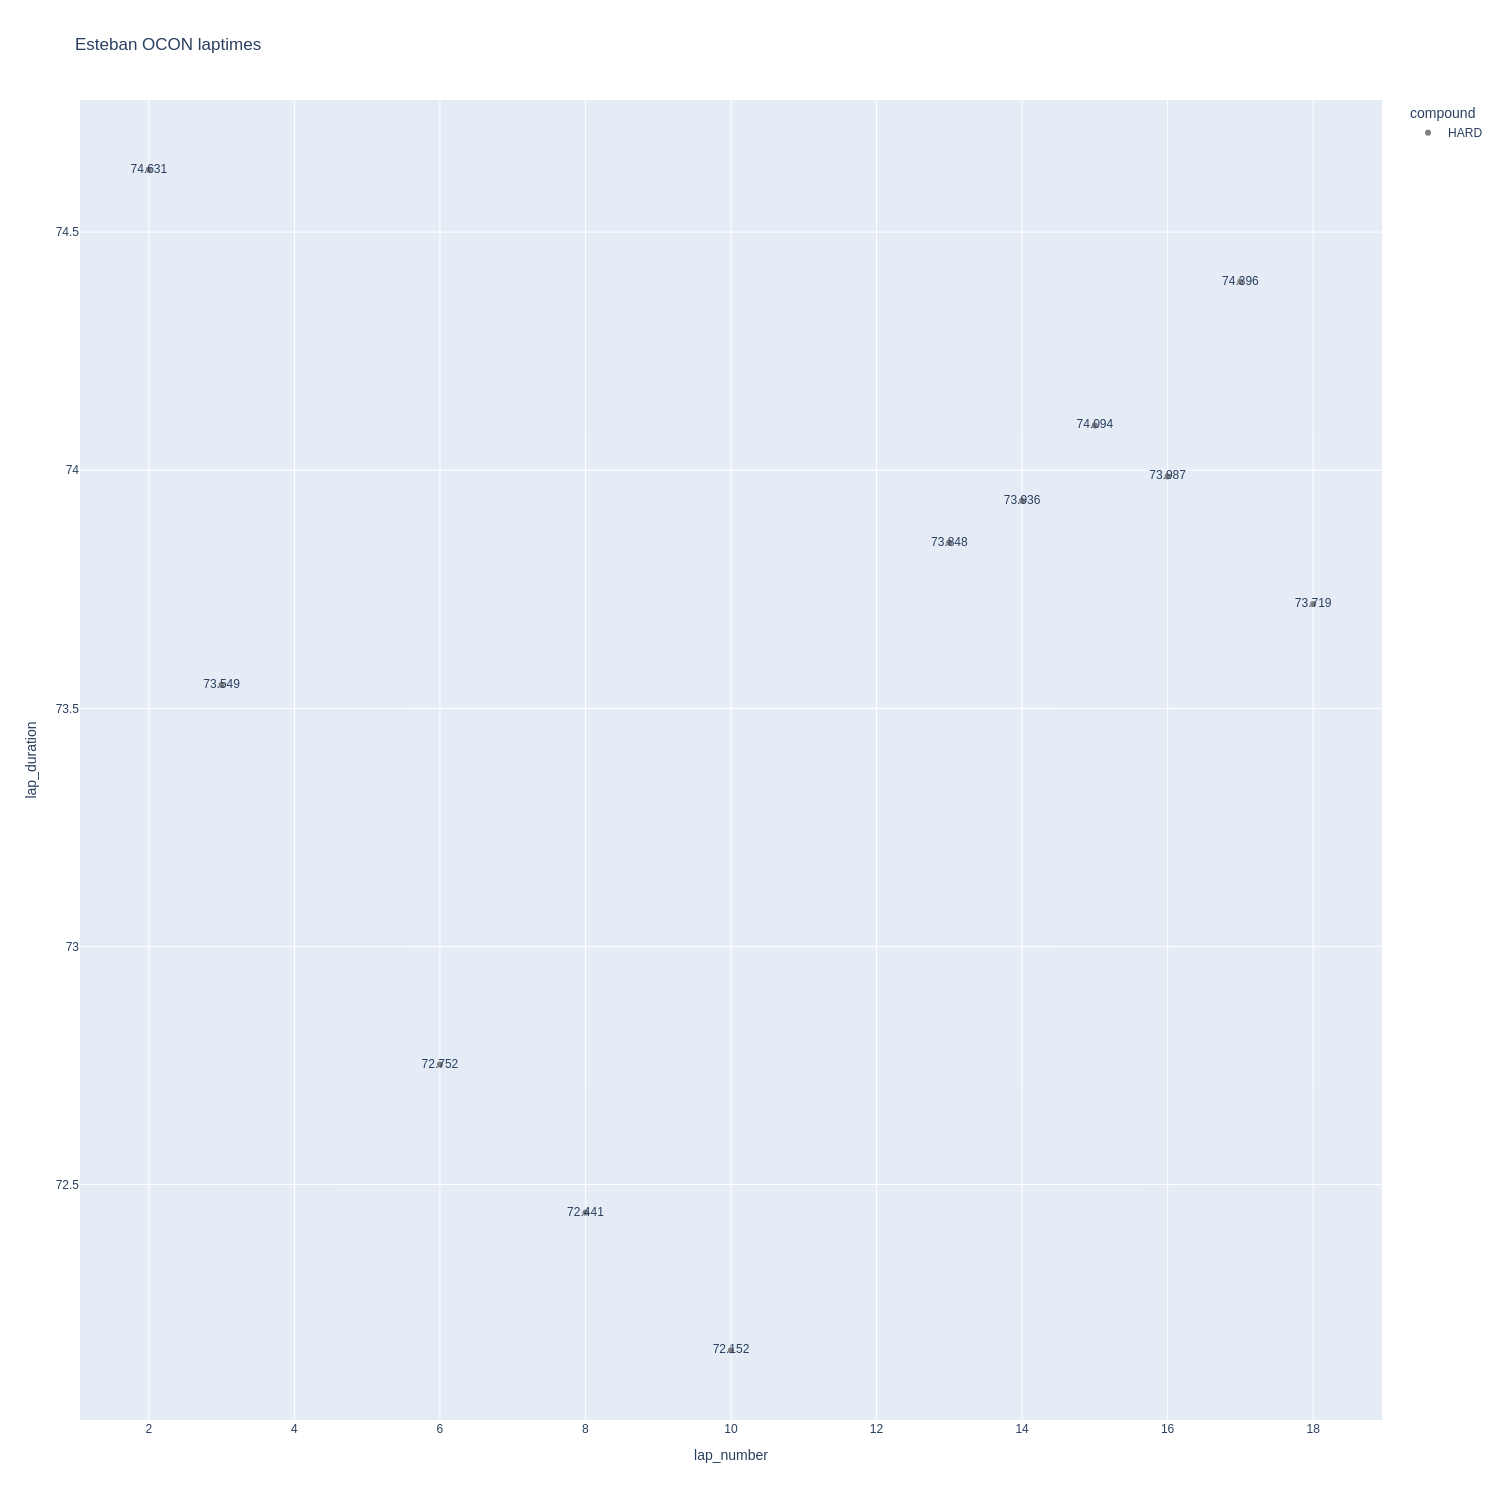

In [140]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

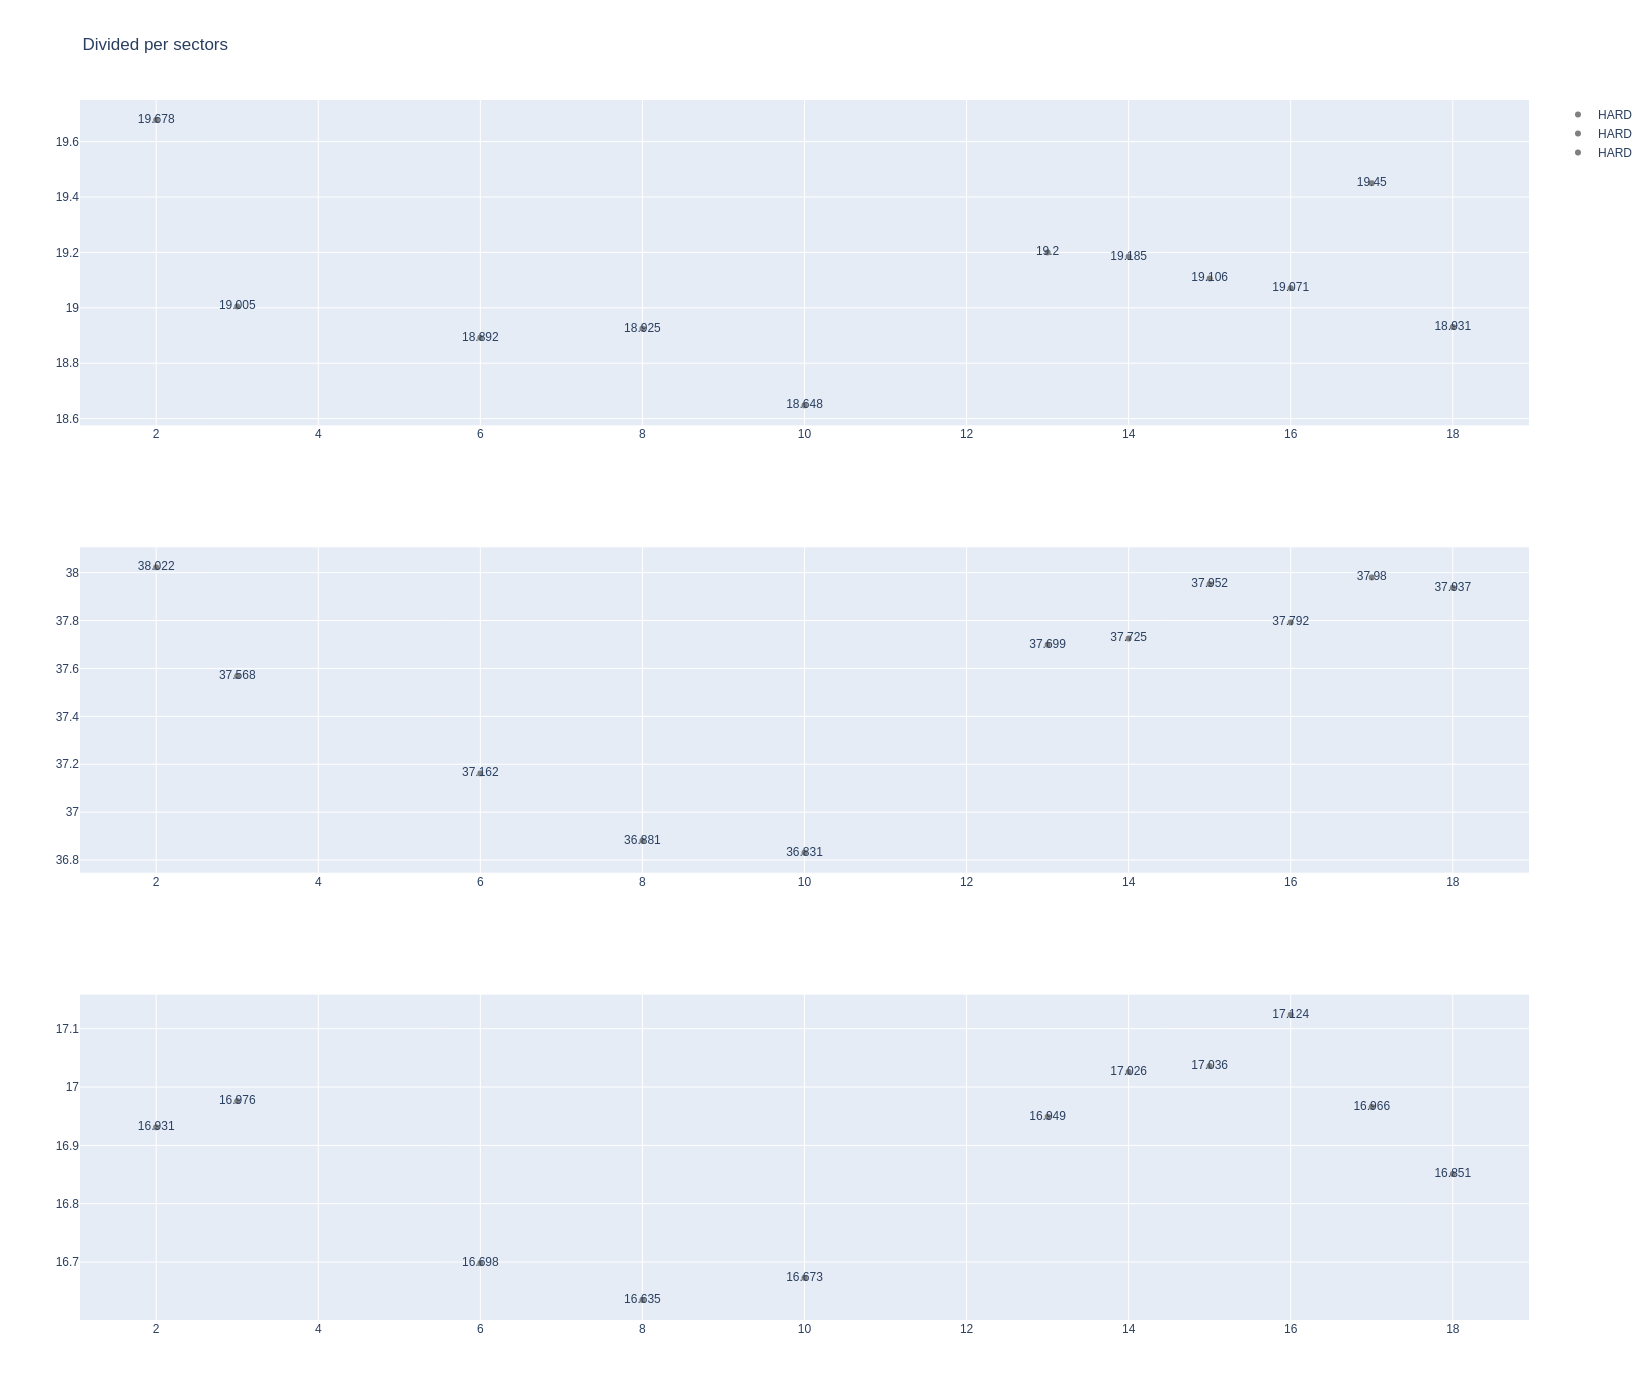

In [141]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [142]:
data = libraryDataF1.getinfolongruns(jointables2,87,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


full_name compound                        date_start  lap_number  \
23   Oliver BEARMAN     HARD  2025-11-07T14:37:06.949000+00:00           2   
37   Oliver BEARMAN     HARD  2025-11-07T14:38:21.664000+00:00           3   
104  Oliver BEARMAN     HARD  2025-11-07T14:43:37.618000+00:00           6   
139  Oliver BEARMAN     HARD  2025-11-07T14:46:47.017000+00:00           8   
310  Oliver BEARMAN     HARD  2025-11-07T15:07:22.983000+00:00          16   
329  Oliver BEARMAN     HARD  2025-11-07T15:08:36.884000+00:00          17   
348  Oliver BEARMAN     HARD  2025-11-07T15:09:52.708000+00:00          18   
364  Oliver BEARMAN     HARD  2025-11-07T15:11:07.552000+00:00          19   
381  Oliver BEARMAN     HARD  2025-11-07T15:12:21.494000+00:00          20   
398  Oliver BEARMAN     HARD  2025-11-07T15:13:36.686000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
23              19.543             38.027             16.879        74.449  
37              18.805             37.233             16.800        72.838  
104             18.771             37.476             16.930        73.177  
139             18.765             37.000             16.576        72.341  
310             19.088             37.735             16.972        73.795  
329             19.220             38.120             18.534        75.874  
348             19.144             38.128             17.070        74.342  
364             19.011             38.346             17.071        74.428  
381             19.110             38.122             17.170        74.402  
398             19.188             38.014             16.906        74.108

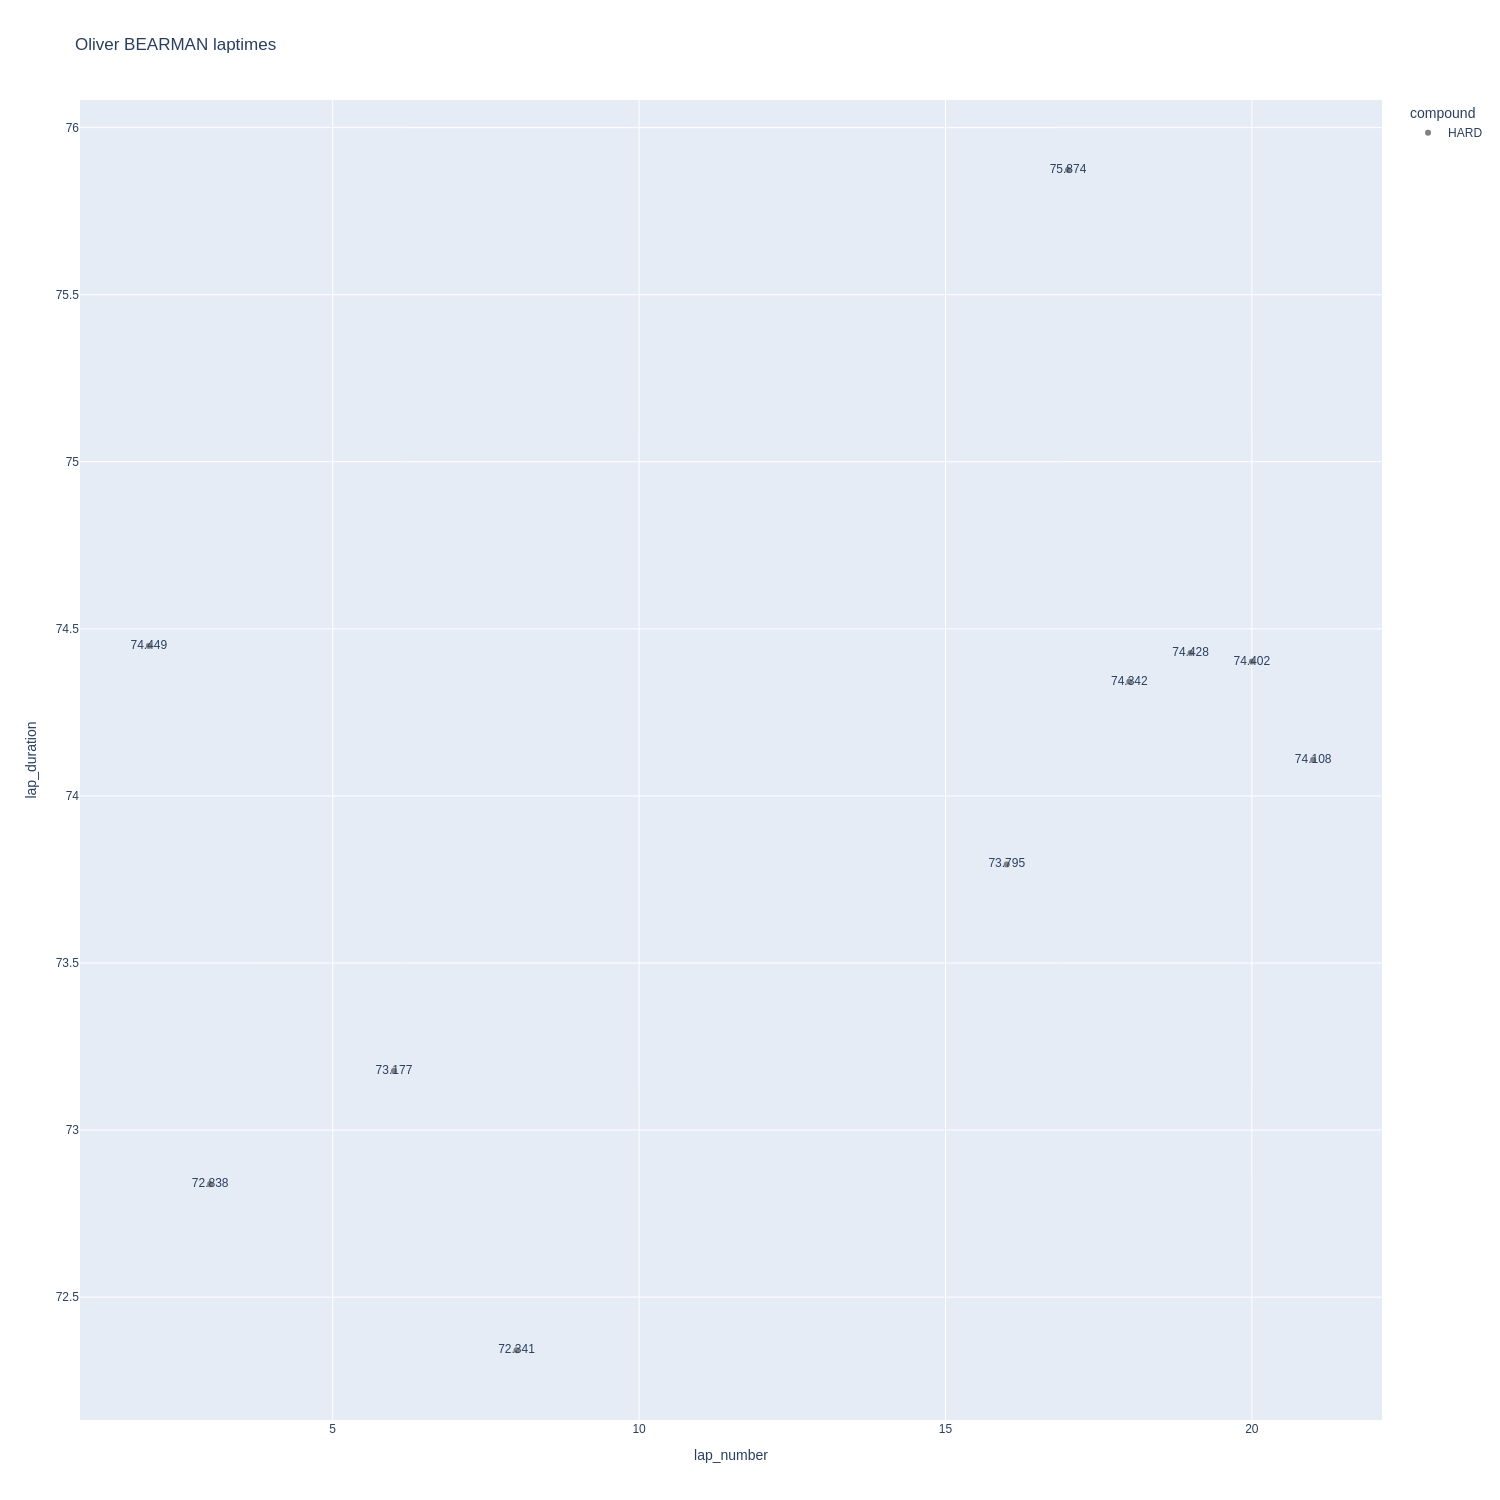

In [143]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

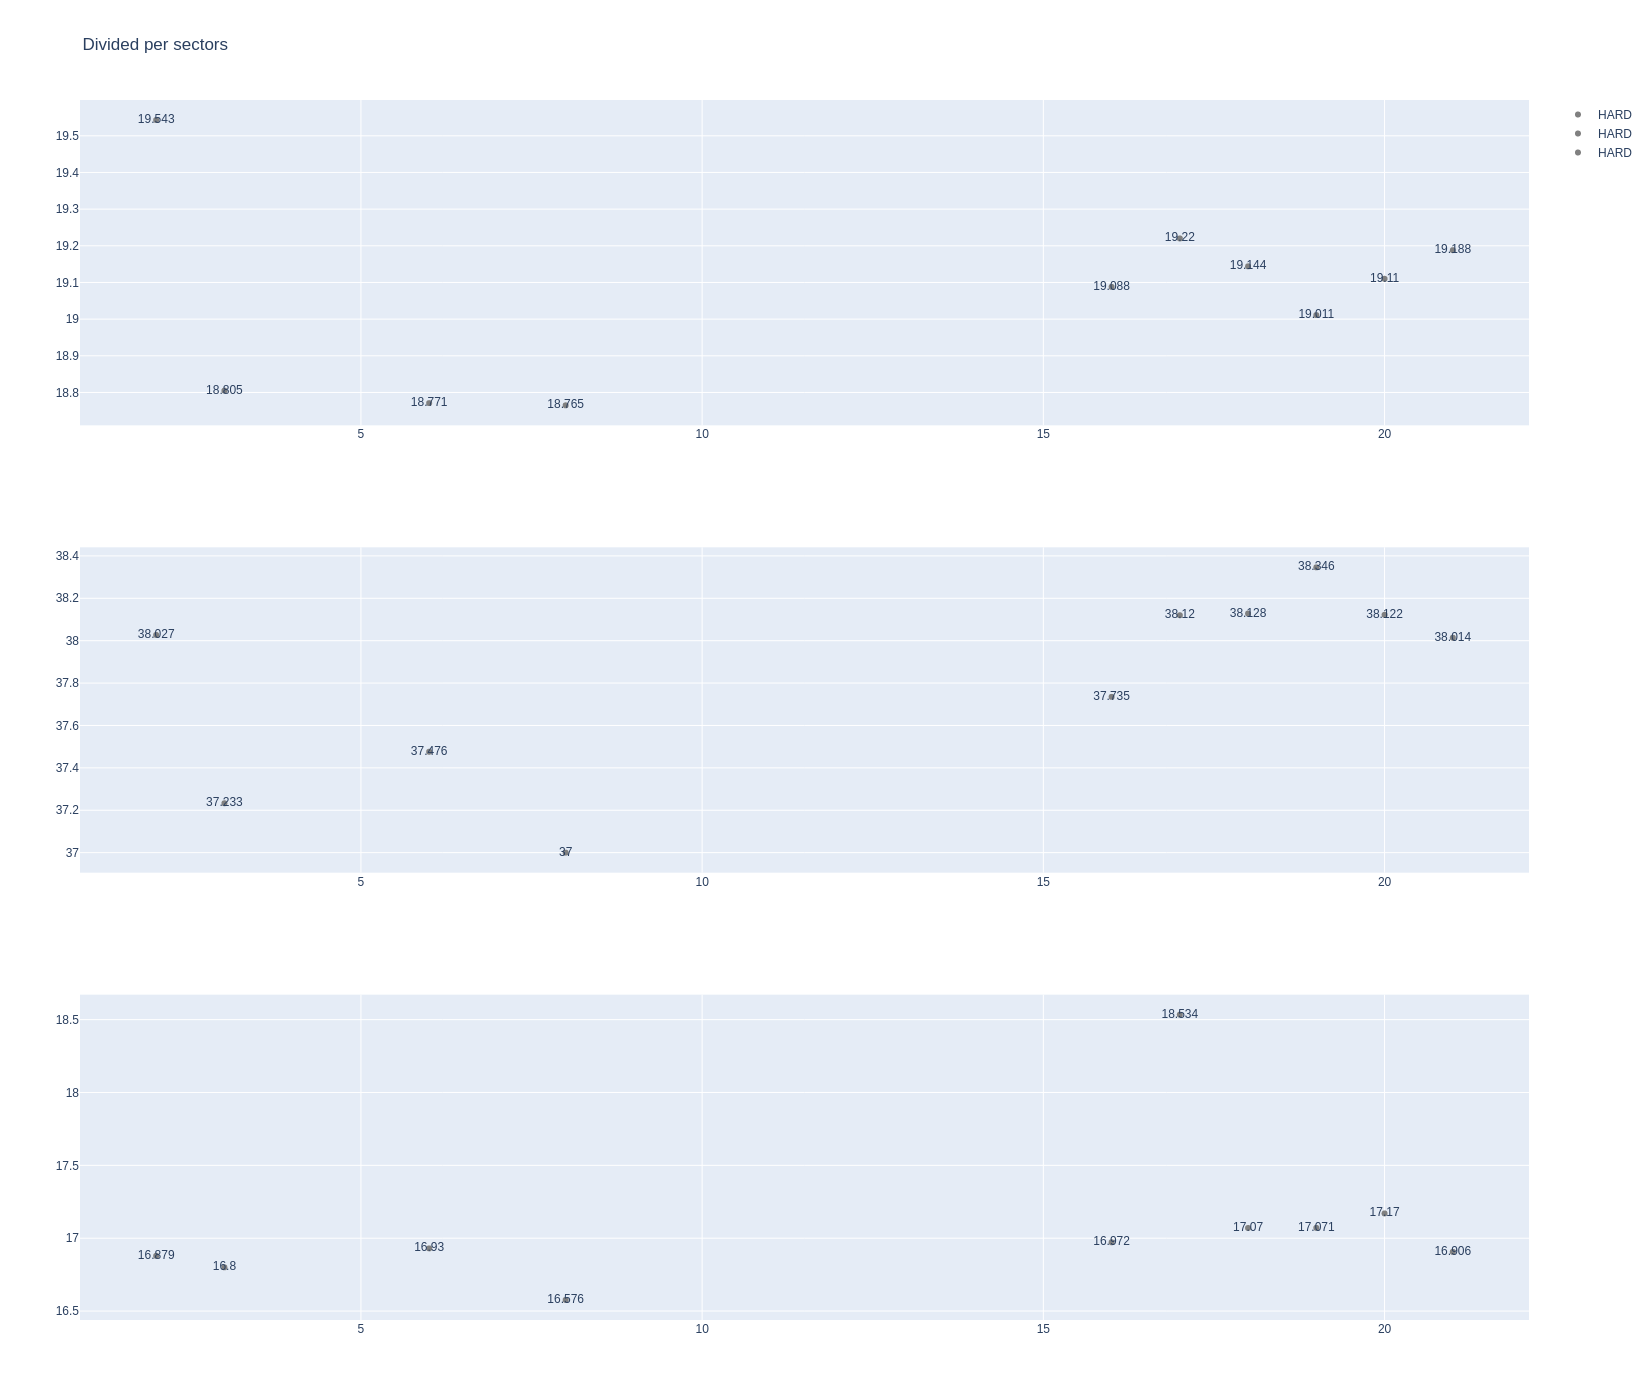

In [144]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [145]:
stintInformation.query('driver_number == 10 or driver_number == 43')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
4          1273         9859             1             43          1        8   
8          1273         9859             2             43          9       11   
22         1273         9859             1             10          1       12   
37         1273         9859             2             10         13       22   
38         1273         9859             3             43         12       19   
70         1273         9859             3             10         23       33   
84         1273         9859             4             43         20       30   

   compound  tyre_age_at_start  
4      HARD                  0  
8      HARD                  0  
22     HARD                  0  
37     HARD                 12  
38     HARD                  0  
70   MEDIUM                  0  
84   MEDIUM                  0

In [146]:
data =libraryDataF1.getinfolongruns(jointables2,43,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
42   Franco COLAPINTO     HARD  2025-11-07T14:38:37.414000+00:00           2   
61   Franco COLAPINTO     HARD  2025-11-07T14:39:51.073000+00:00           3   
101  Franco COLAPINTO     HARD  2025-11-07T14:43:25.525000+00:00           5   
144  Franco COLAPINTO     HARD  2025-11-07T14:47:04.678000+00:00           7   
199  Franco COLAPINTO     HARD  2025-11-07T14:52:44.243000+00:00          10   
312  Franco COLAPINTO     HARD  2025-11-07T15:07:34.494000+00:00          13   
350  Franco COLAPINTO     HARD  2025-11-07T15:10:05.031000+00:00          15   
367  Franco COLAPINTO     HARD  2025-11-07T15:11:19.342000+00:00          16   
384  Franco COLAPINTO     HARD  2025-11-07T15:12:33.476000+00:00          17   
400  Franco COLAPINTO     HARD  2025-11-07T15:13:47.802000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
42              18.880             38.196             16.673        73.749  
61              18.717             37.648             16.606        72.971  
101             18.669             37.465             16.748        72.882  
144             18.618             37.294             16.553        72.465  
199             18.640             37.058             16.640        72.338  
312             18.790             37.116             16.599        72.505  
350             19.106             38.083             17.032        74.221  
367             19.077             38.105             16.994        74.176  
384             19.164             38.141             16.948        74.253  
400             19.077             38.134             16.943        74.154

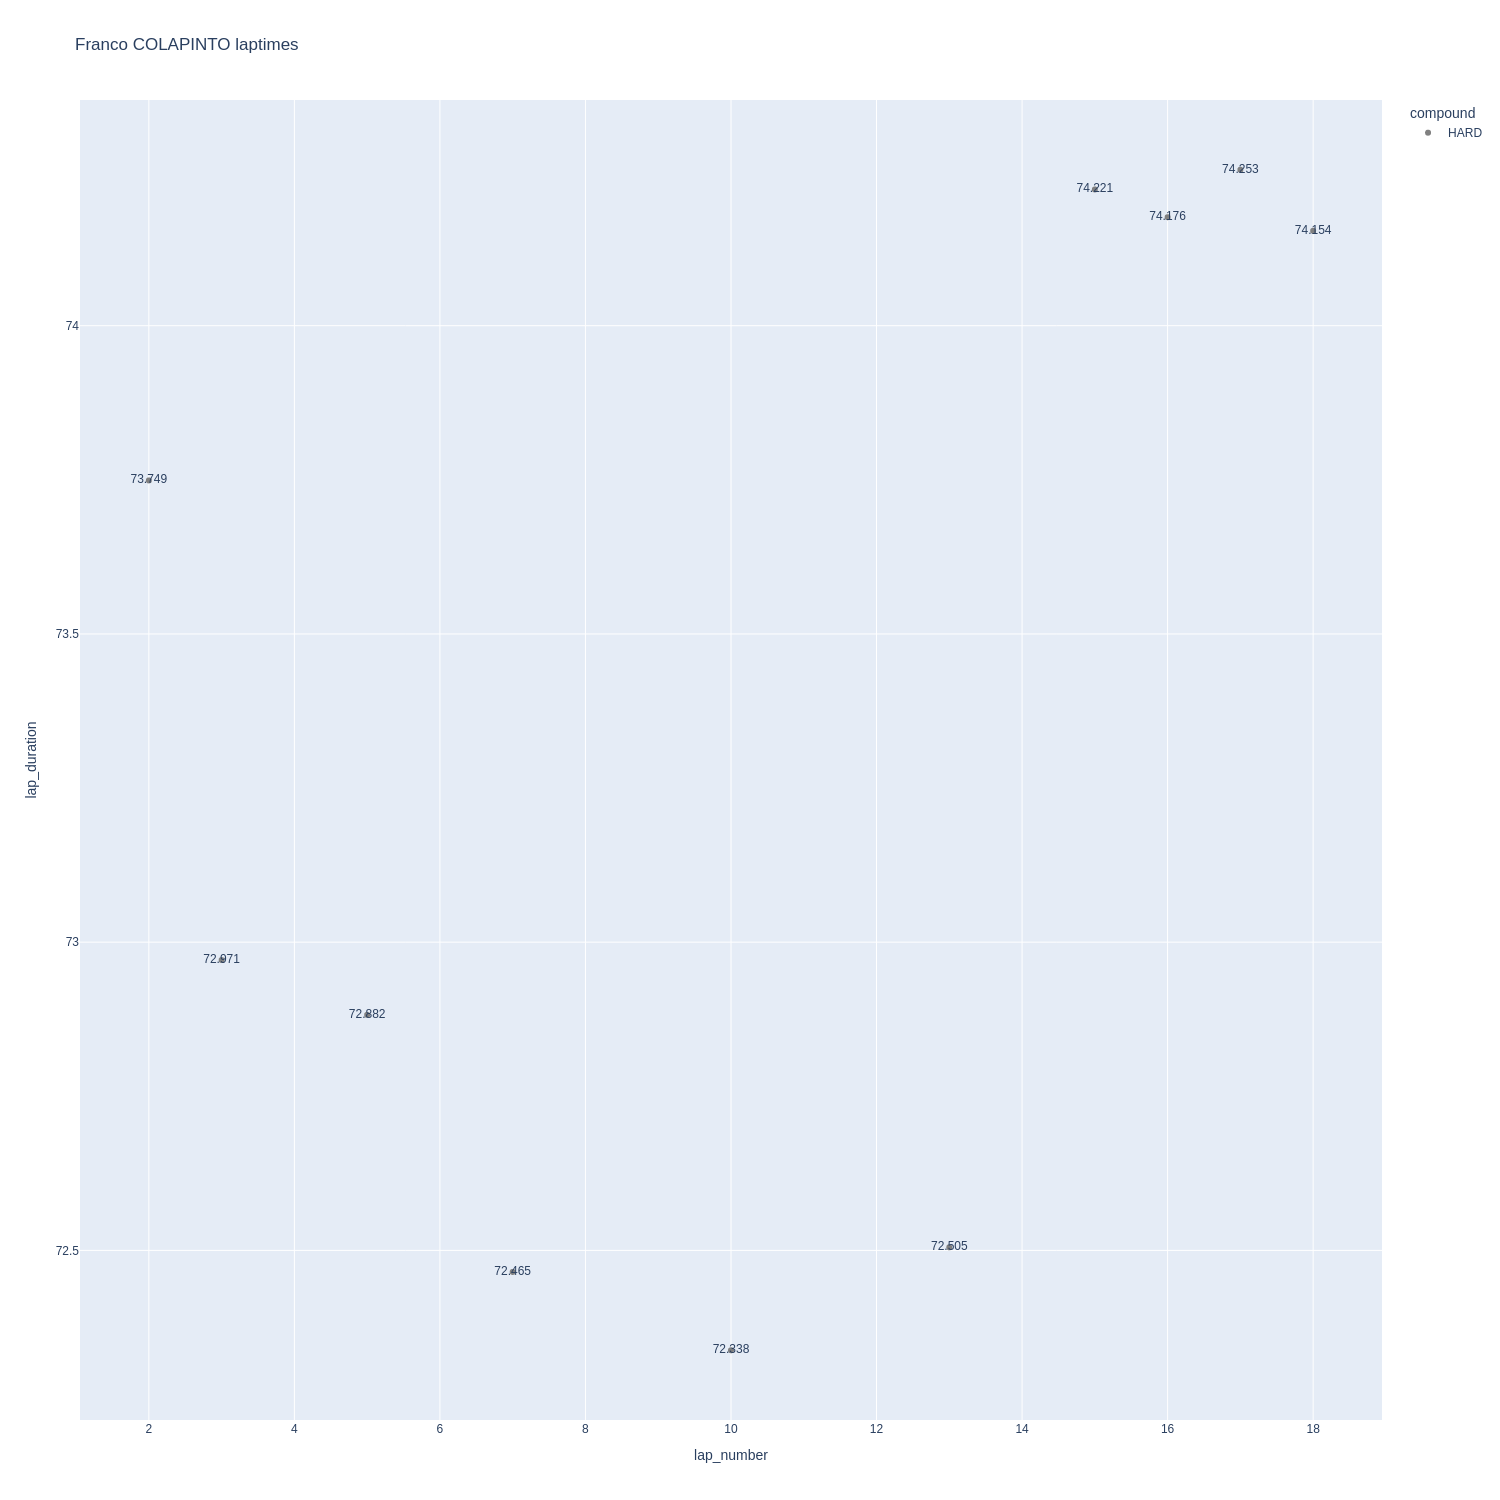

In [147]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

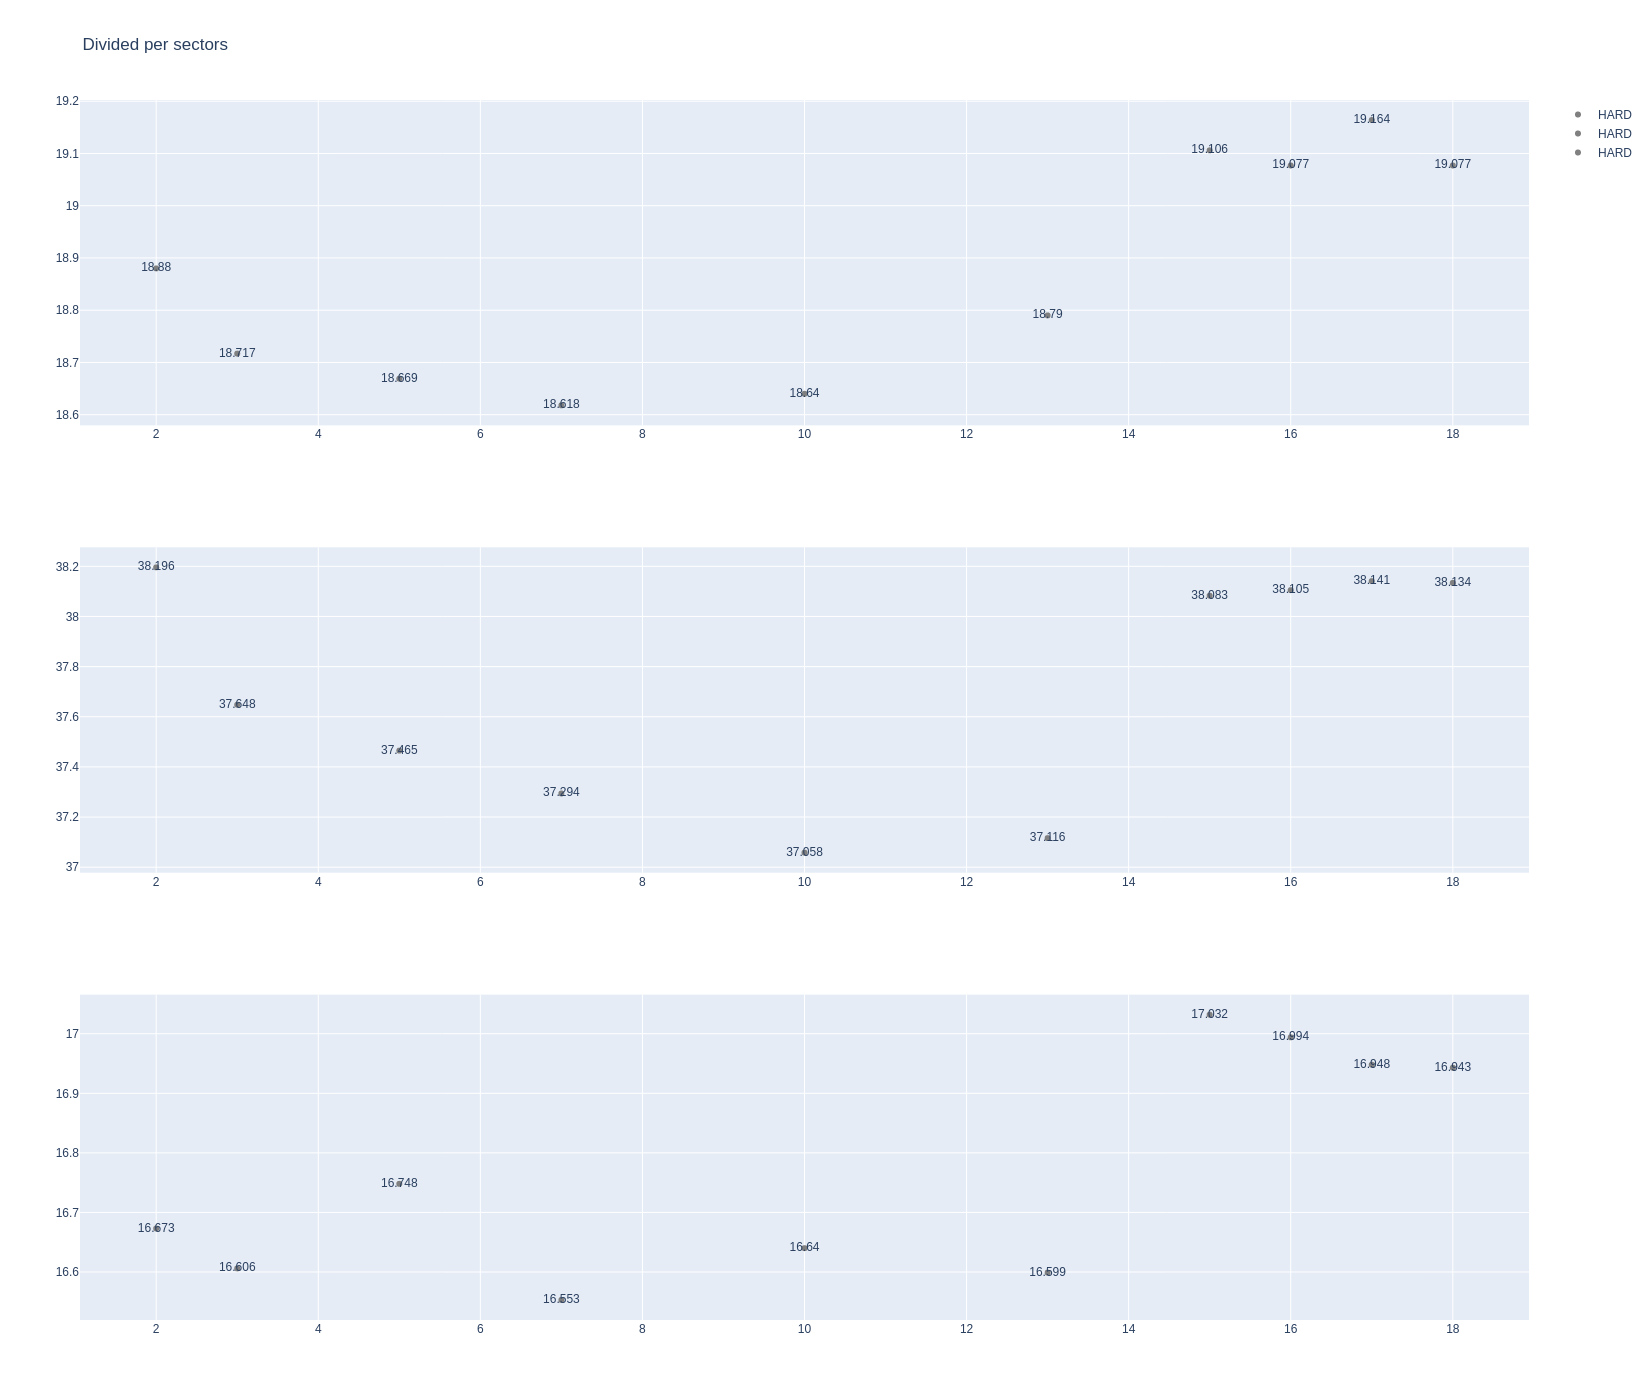

In [148]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [149]:
data = libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
38   Pierre GASLY     HARD  2025-11-07T14:38:26.904000+00:00           2   
82   Pierre GASLY     HARD  2025-11-07T14:41:36.853000+00:00           4   
135  Pierre GASLY     HARD  2025-11-07T14:46:20.937000+00:00           7   
299  Pierre GASLY     HARD  2025-11-07T15:06:33.763000+00:00          15   
316  Pierre GASLY     HARD  2025-11-07T15:07:48.895000+00:00          16   
335  Pierre GASLY     HARD  2025-11-07T15:09:03.358000+00:00          17   
353  Pierre GASLY     HARD  2025-11-07T15:10:17.783000+00:00          18   
370  Pierre GASLY     HARD  2025-11-07T15:11:32.128000+00:00          19   
387  Pierre GASLY     HARD  2025-11-07T15:12:46.400000+00:00          20   
403  Pierre GASLY     HARD  2025-11-07T15:14:00.781000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
38              18.958             37.546             16.621        73.125  
82              18.591             37.129             16.596        72.316  
135             18.493             37.022             16.589        72.104  
299             19.479             38.759             16.910        75.148  
316             19.299             38.198             16.824        74.321  
335             19.491             38.076             16.916        74.483  
353             19.300             38.150             16.883        74.333  
370             19.396             37.906             16.975        74.277  
387             19.248             38.130             17.013        74.391  
403             19.140             38.485             16.958        74.583

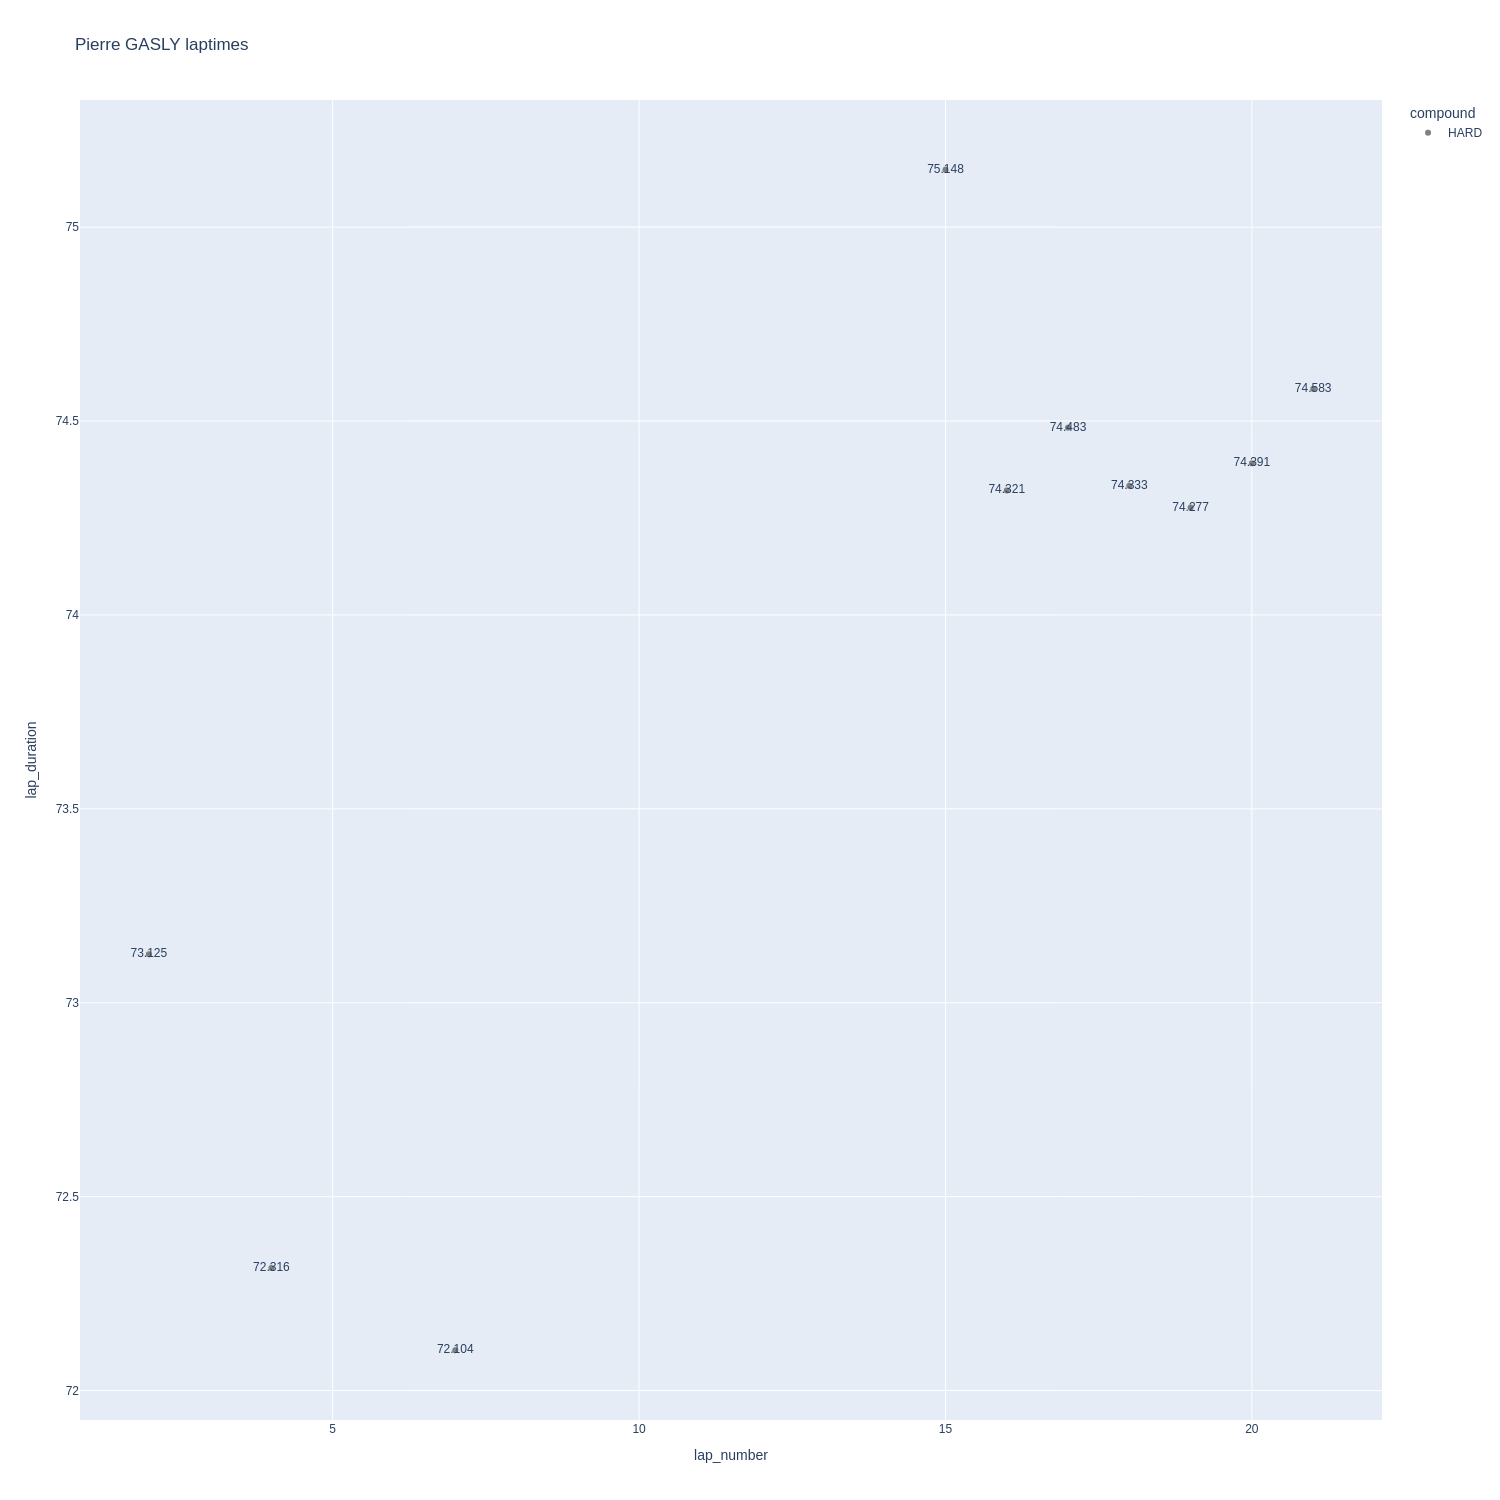

In [150]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

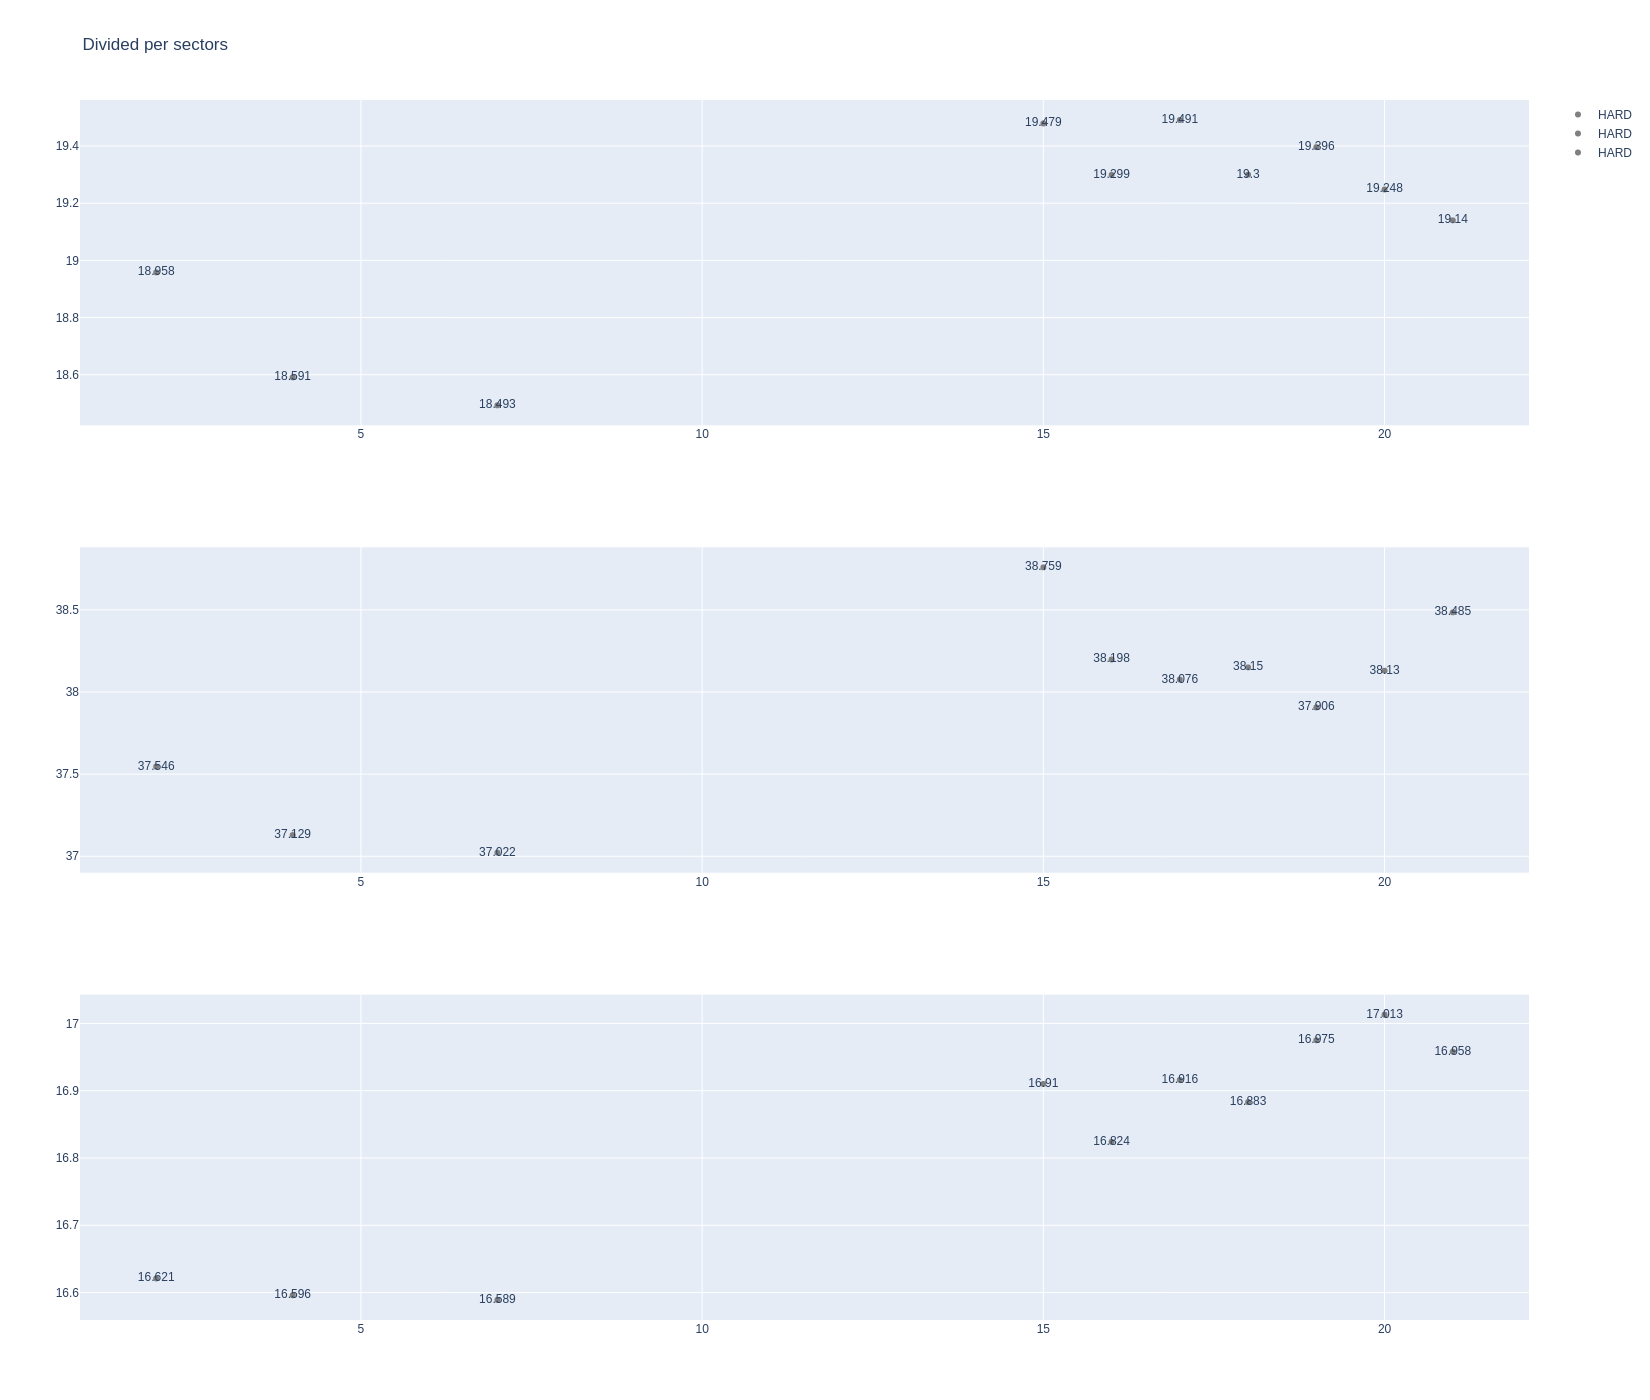

In [151]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [152]:
stintInformation.query('driver_number == 55 or driver_number == 23')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
16         1273         9859             1             55          1       14   
17         1273         9859             1             23          1       13   
27         1273         9859             2             23         14       23   
28         1273         9859             2             55         15       23   
33         1273         9859             3             55         24       24   
76         1273         9859             3             23         24       35   
79         1273         9859             4             55         25       36   

   compound  tyre_age_at_start  
16     HARD                  0  
17     HARD                  0  
27     HARD                 13  
28     HARD                 14  
33     HARD                  0  
76   MEDIUM                  0  
79   MEDIUM                  0

In [153]:
data = libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
22   Alexander ALBON     HARD  2025-11-07T14:36:57.951000+00:00           2   
35   Alexander ALBON     HARD  2025-11-07T14:38:11.577000+00:00           3   
80   Alexander ALBON     HARD  2025-11-07T14:41:30.252000+00:00           5   
117  Alexander ALBON     HARD  2025-11-07T14:44:40.128000+00:00           7   
197  Alexander ALBON     HARD  2025-11-07T14:52:37.827000+00:00          12   
253  Alexander ALBON     HARD  2025-11-07T15:03:01.157000+00:00          15   
267  Alexander ALBON     HARD  2025-11-07T15:04:16.733000+00:00          16   
283  Alexander ALBON     HARD  2025-11-07T15:05:30.484000+00:00          17   
320  Alexander ALBON     HARD  2025-11-07T15:08:00.811000+00:00          19   
339  Alexander ALBON     HARD  2025-11-07T15:09:15.331000+00:00          20   
357  Alexander ALBON     HARD  2025-11-07T15:10:29.530000+00:00          21   
374  Alexander ALBON     HARD  2025-11-07T15:11:44.212000+00:00          22   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
22              19.233             37.752             16.766        73.751  
35              19.038             37.690             16.718        73.446  
80              18.624             37.311             16.623        72.558  
117             18.369             37.053             16.669        72.091  
197             18.577             36.739             16.736        72.052  
253             18.514             39.847             17.177        75.538  
267             19.216             37.738             16.836        73.790  
283             18.910             38.057             16.954        73.921  
320             19.016             38.437             17.003        74.456  
339             18.936             38.267             17.034        74.237  
357             19.115             38.565             16.997        74.677  
374             18.897             38.555             17.060        74.512

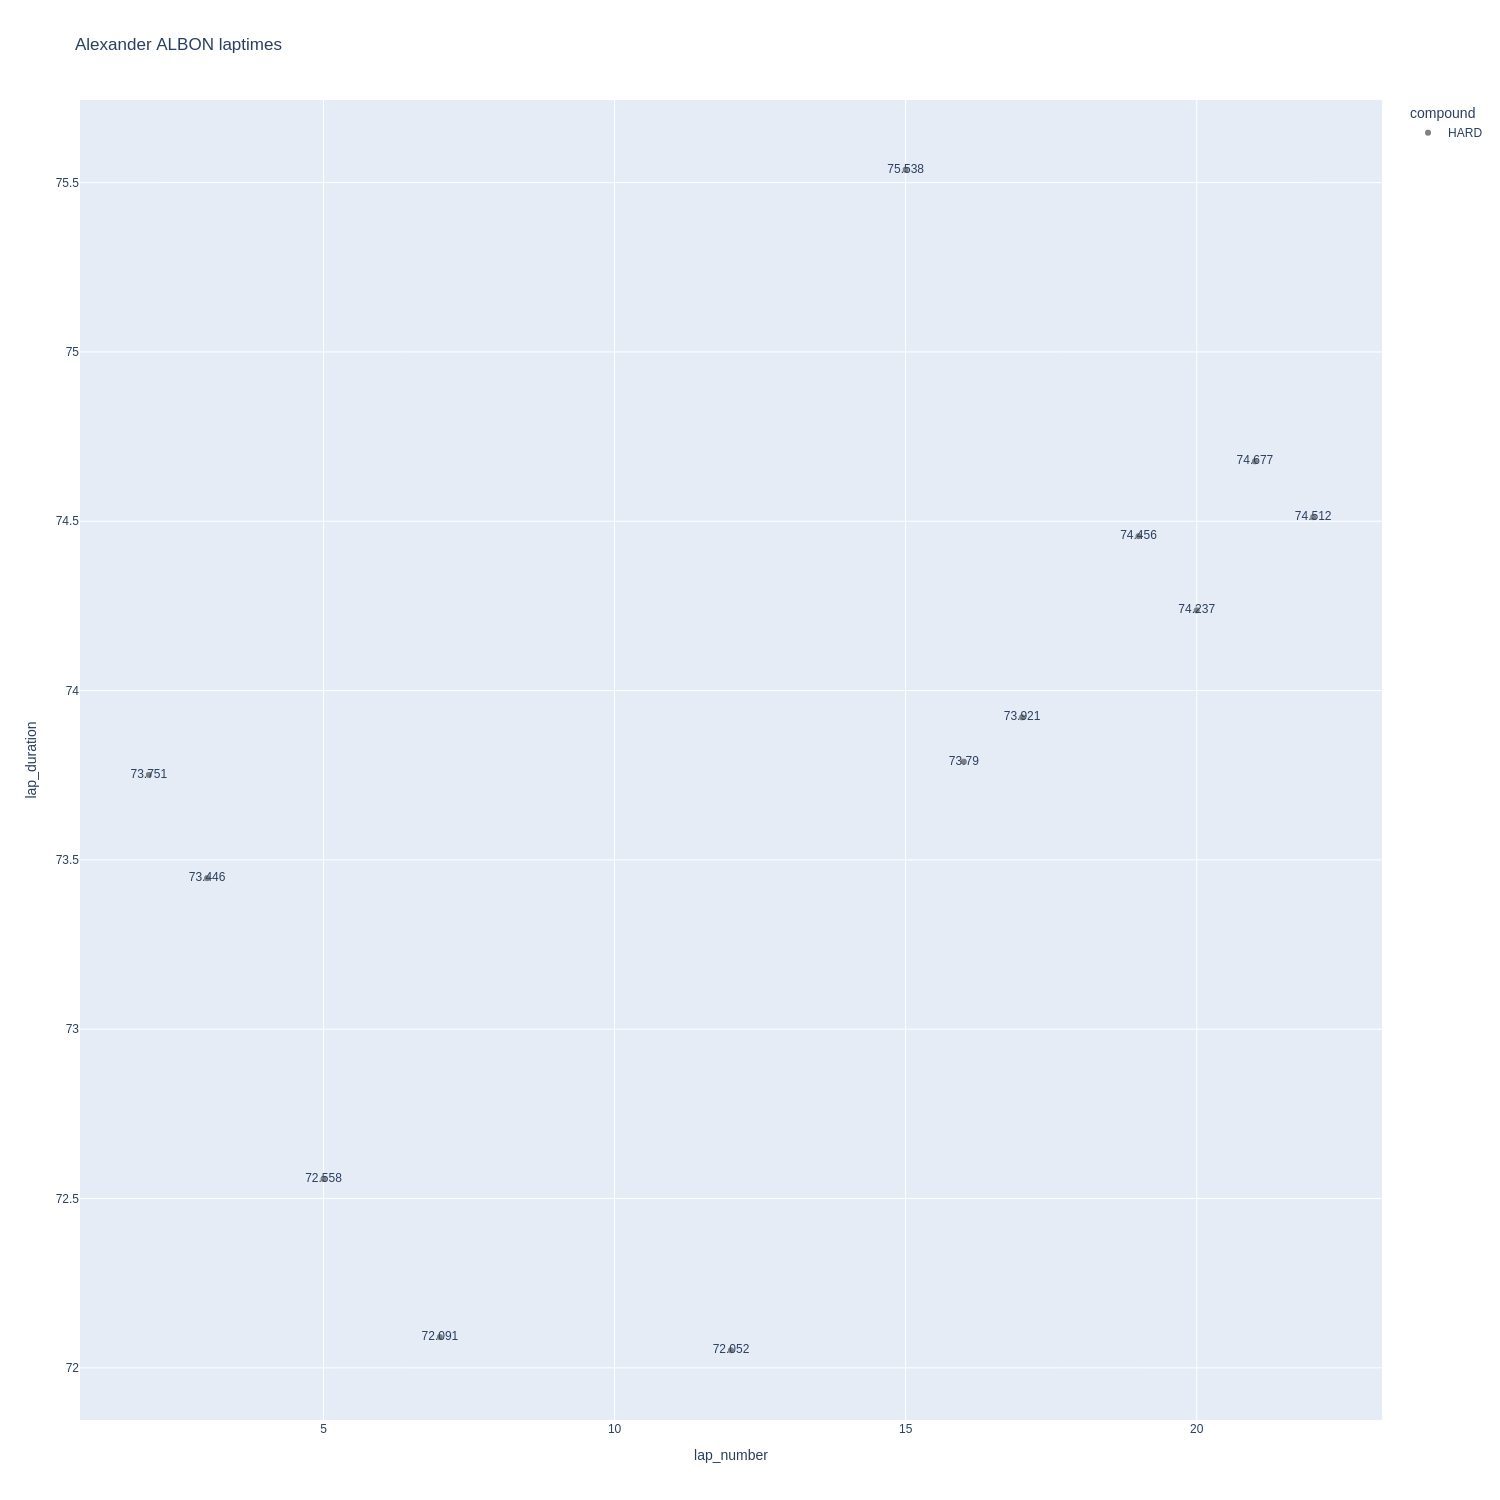

In [154]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

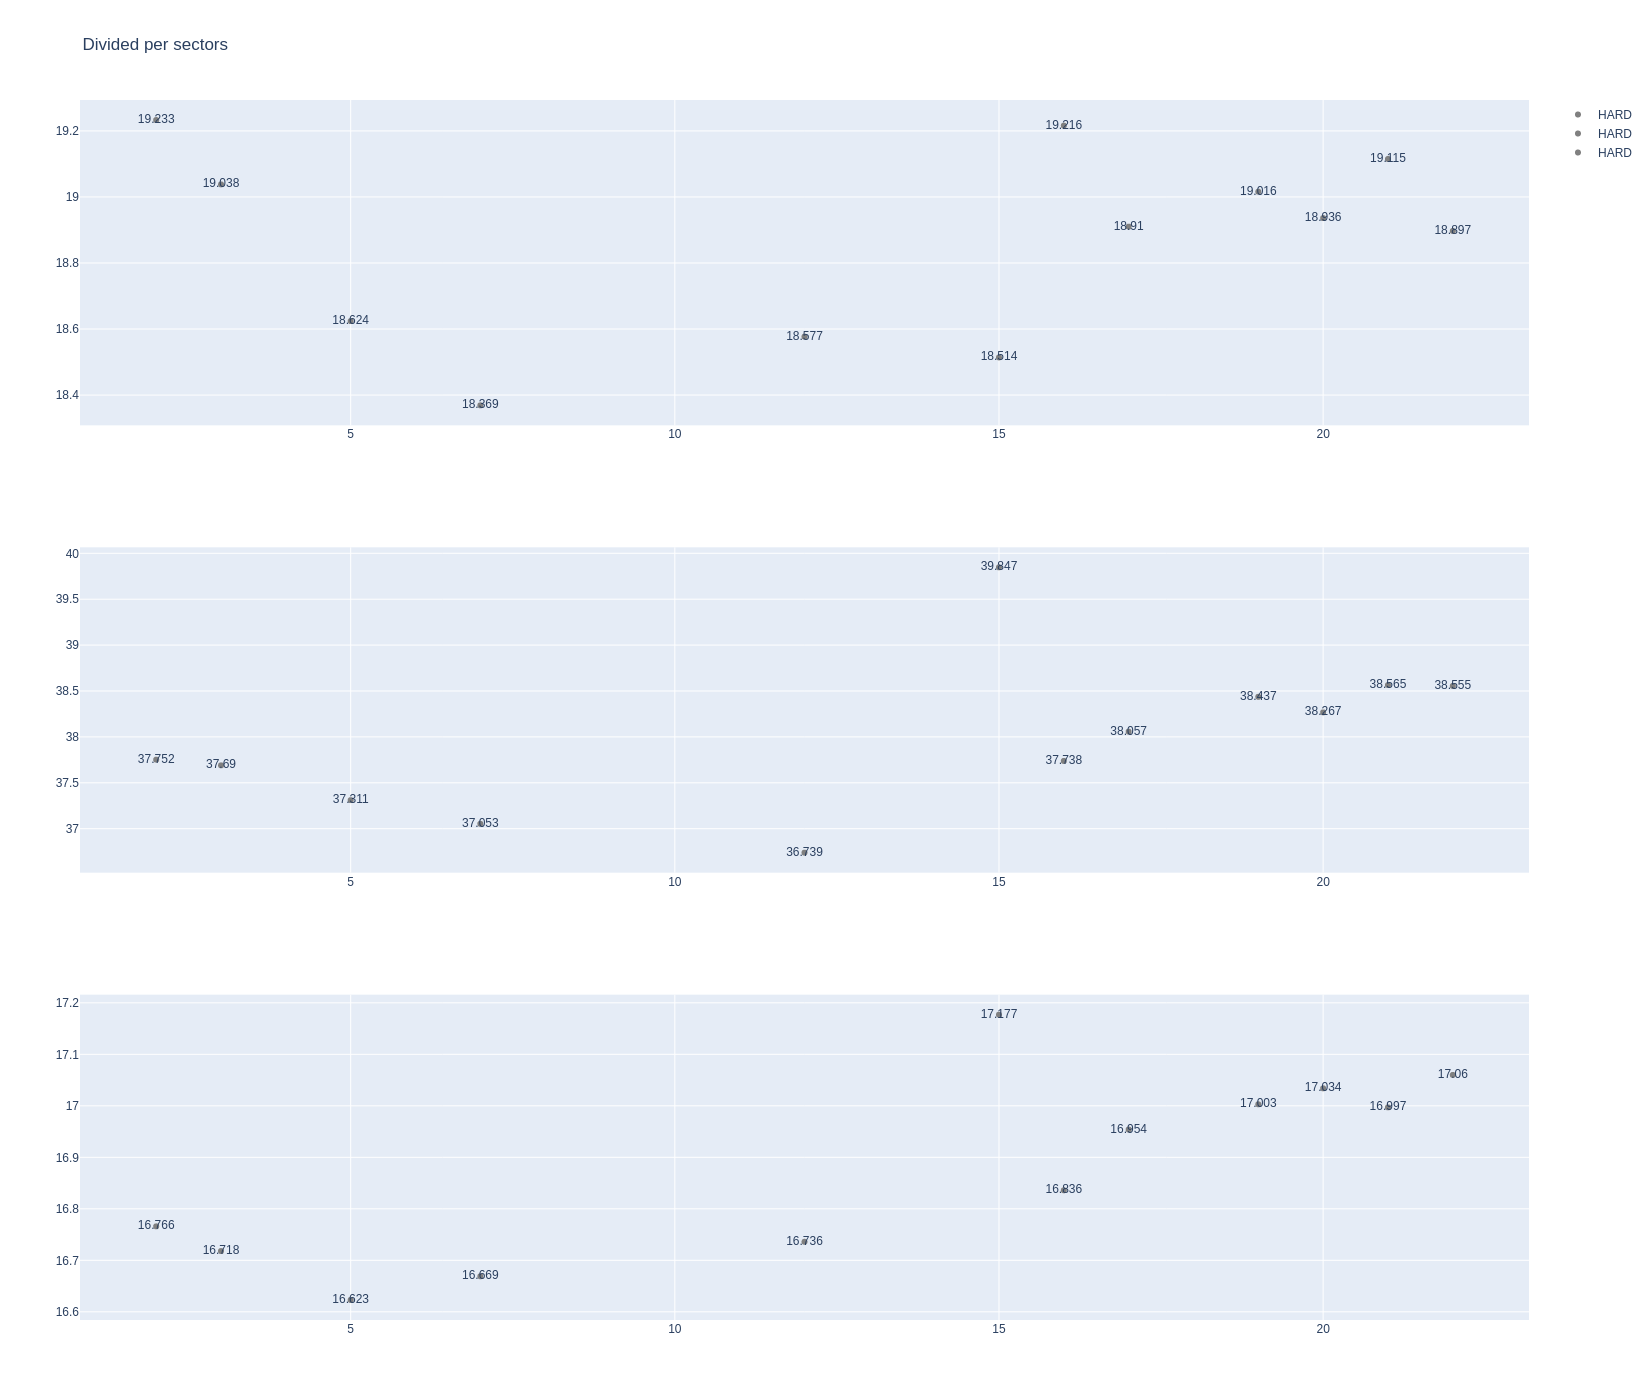

In [155]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [156]:
data= libraryDataF1.getinfolongruns(jointables2,55,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
26   Carlos SAINZ     HARD  2025-11-07T14:37:25.862000+00:00           2   
66   Carlos SAINZ     HARD  2025-11-07T14:40:25.167000+00:00           4   
106  Carlos SAINZ     HARD  2025-11-07T14:43:48.745000+00:00           6   
145  Carlos SAINZ     HARD  2025-11-07T14:47:13.611000+00:00           8   
254  Carlos SAINZ     HARD  2025-11-07T15:03:05.772000+00:00          16   
284  Carlos SAINZ     HARD  2025-11-07T15:05:36.441000+00:00          18   
303  Carlos SAINZ     HARD  2025-11-07T15:06:49.810000+00:00          19   
321  Carlos SAINZ     HARD  2025-11-07T15:08:03.691000+00:00          20   
340  Carlos SAINZ     HARD  2025-11-07T15:09:17.803000+00:00          21   
358  Carlos SAINZ     HARD  2025-11-07T15:10:31.990000+00:00          22   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
26              18.904             37.362             16.640        72.906  
66              18.660             37.605             16.680        72.945  
106             18.363             37.000             16.681        72.044  
145             18.461             37.066             16.512        72.039  
254             18.885             37.694             16.877        73.456  
284             18.737             37.718             16.960        73.415  
303             18.890             38.103             16.901        73.894  
321             18.879             38.293             16.897        74.069  
340             18.961             38.230             17.000        74.191  
358             18.955             38.406             16.961        74.322

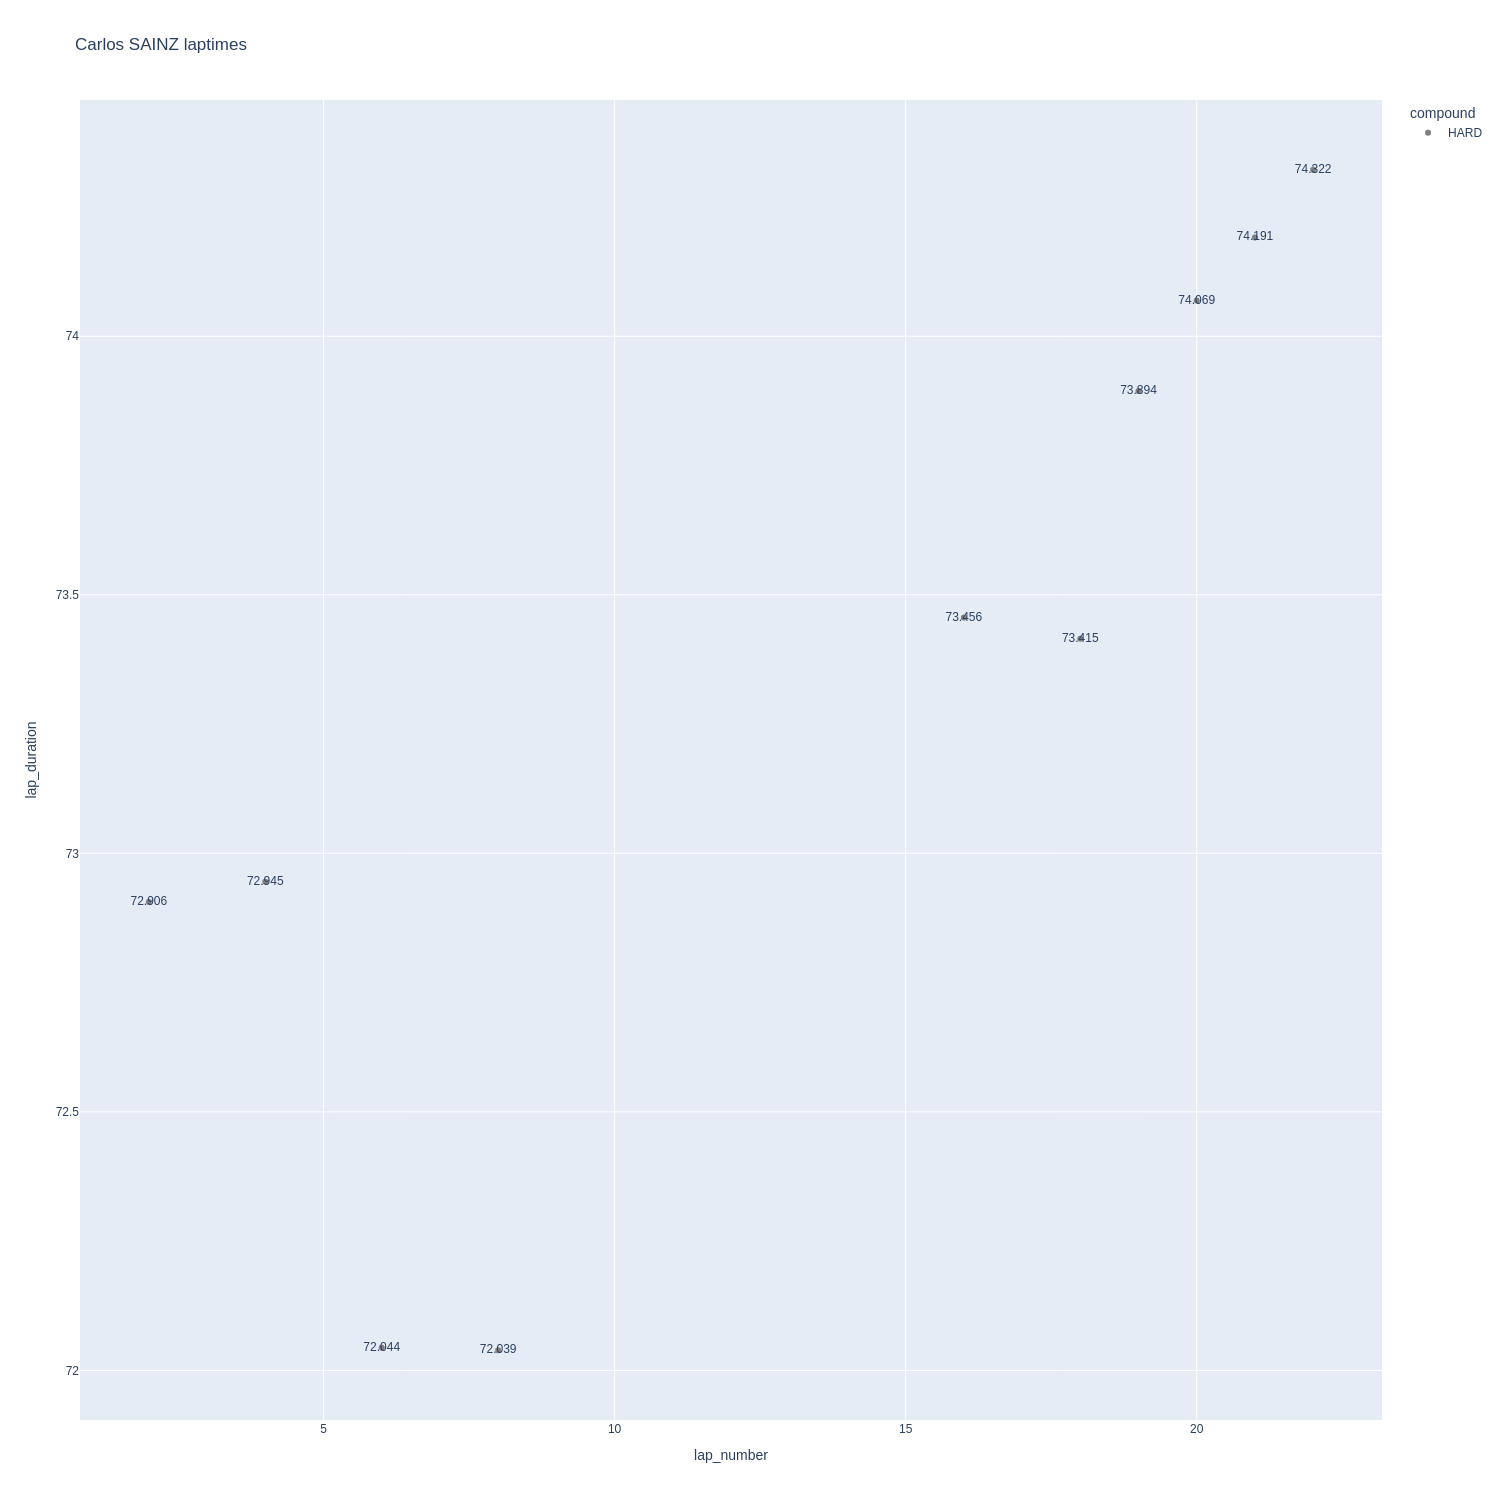

In [157]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

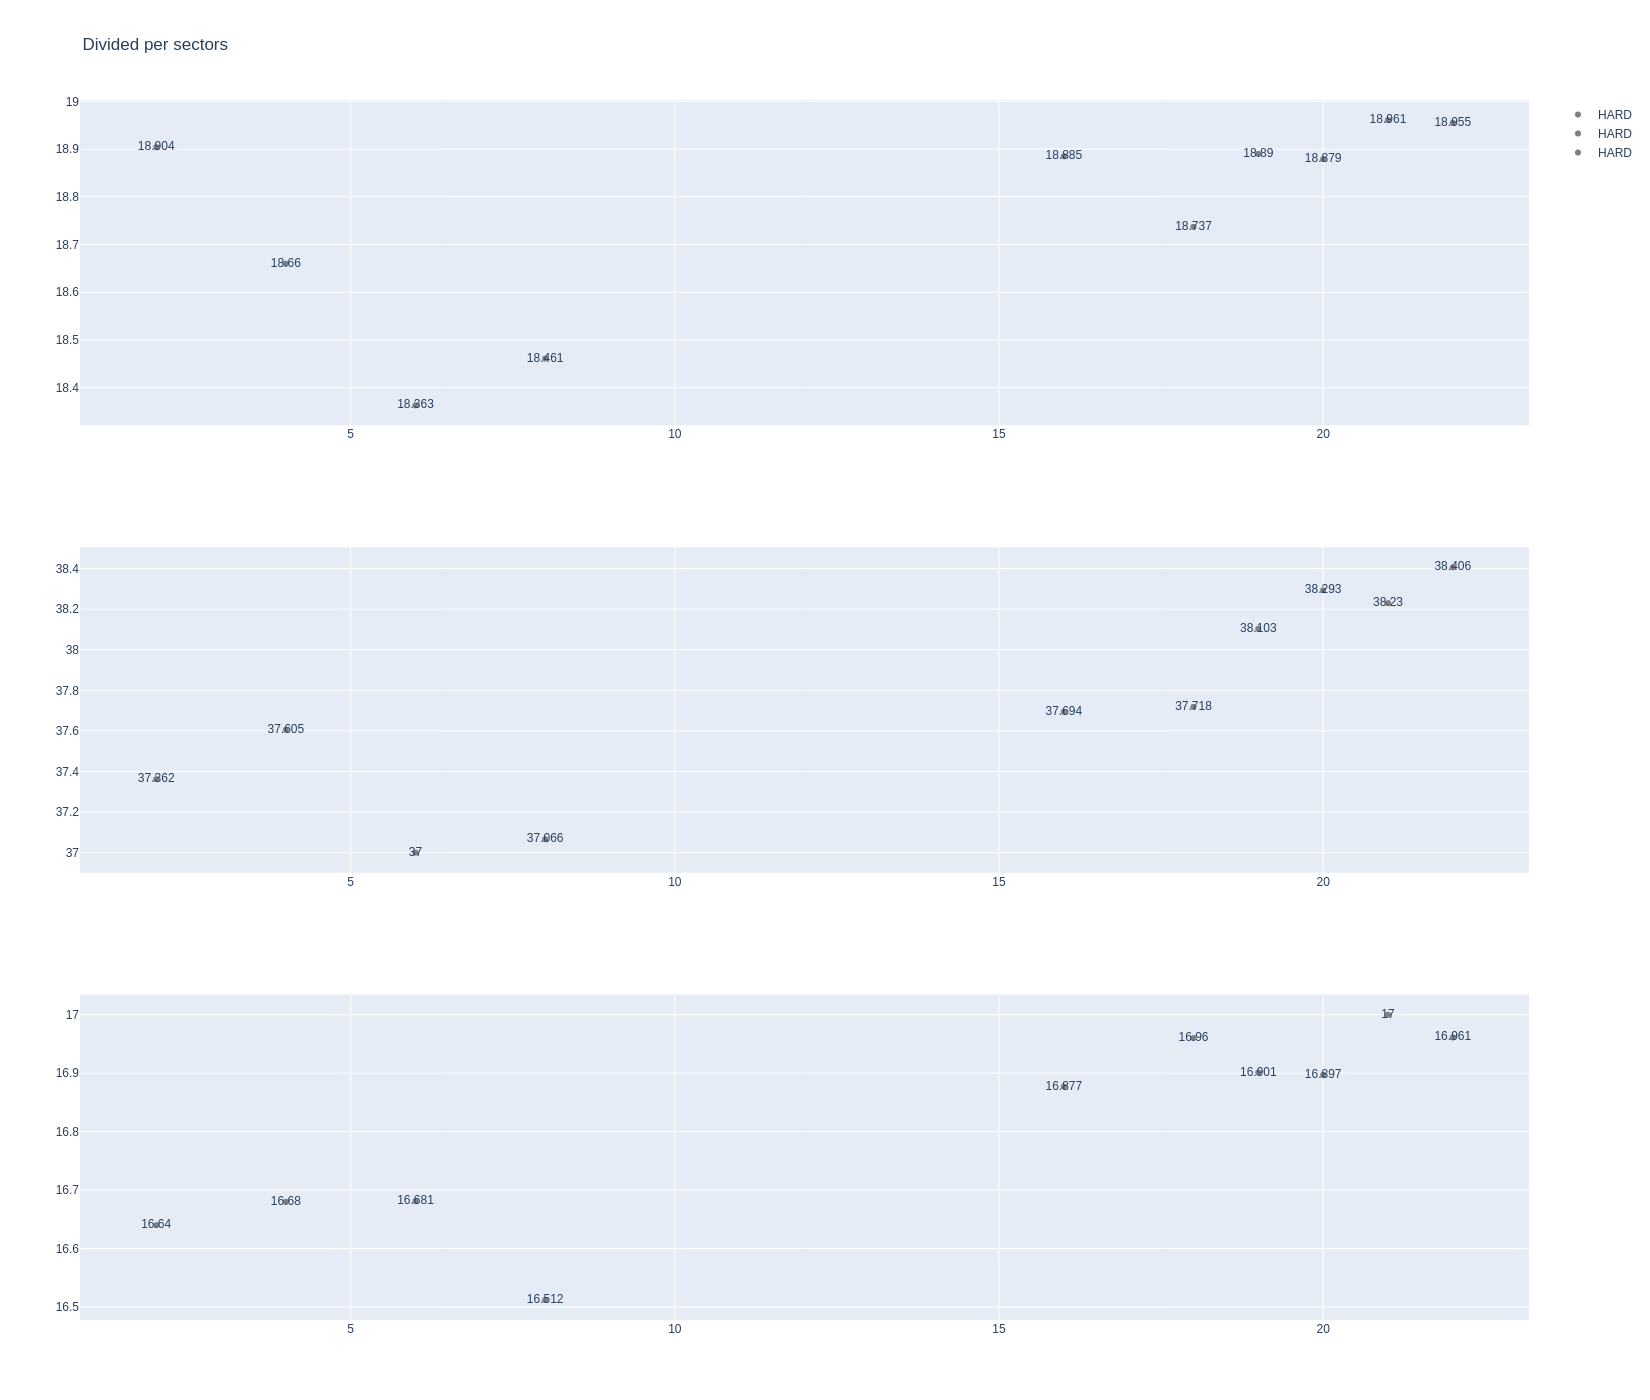

In [158]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [159]:
stintInformation.query('driver_number == 27 or driver_number == 5')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
5          1273         9859             1             27          1        8   
19         1273         9859             1              5          1       11   
21         1273         9859             2             27          9       10   
40         1273         9859             2              5         12       22   
42         1273         9859             3             27         11       22   
52         1273         9859             3              5         23       25   
57         1273         9859             4             27         23       27   
61         1273         9859             4              5         26       28   
69         1273         9859             5              5         29       32   
77         1273         9859             5             27         28       32   

   compound  tyre_age_at_start  
5      HARD                  0  
19     HARD                  0  
21     HARD                  8  
40     HARD                 11  
42     HARD                 10  
52   MEDIUM                  0  
57   MEDIUM                  0  
61   MEDIUM                  0  
69   MEDIUM                  0  
77   MEDIUM                  0

In [160]:
data = libraryDataF1.getinfolongruns(jointables2,27,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
63   Nico HULKENBERG     HARD  2025-11-07T14:40:05.424000+00:00           3   
98   Nico HULKENBERG     HARD  2025-11-07T14:43:04.470000+00:00           5   
134  Nico HULKENBERG     HARD  2025-11-07T14:46:07.006000+00:00           7   
277  Nico HULKENBERG     HARD  2025-11-07T15:05:04.587000+00:00          12   
322  Nico HULKENBERG     HARD  2025-11-07T15:08:08.544000+00:00          14   
360  Nico HULKENBERG     HARD  2025-11-07T15:10:45.894000+00:00          16   
377  Nico HULKENBERG     HARD  2025-11-07T15:12:00.167000+00:00          17   
393  Nico HULKENBERG     HARD  2025-11-07T15:13:14.369000+00:00          18   
406  Nico HULKENBERG     HARD  2025-11-07T15:14:28.617000+00:00          19   
417  Nico HULKENBERG     HARD  2025-11-07T15:15:42.913000+00:00          20   
421  Nico HULKENBERG     HARD  2025-11-07T15:16:56.933000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
63              18.619             37.599             16.935        73.153  
98              18.820             37.431             16.780        73.031  
134             18.489             36.920             16.719        72.128  
277             18.666             36.844             16.675        72.185  
322             18.639             36.977             16.742        72.358  
360             19.124             38.157             17.102        74.383  
377             19.049             37.925             17.120        74.094  
393             19.171             37.853             17.323        74.347  
406             19.137             37.847             17.251        74.235  
417             19.079             37.787             17.141        74.007  
421             19.179             38.000             17.006        74.185

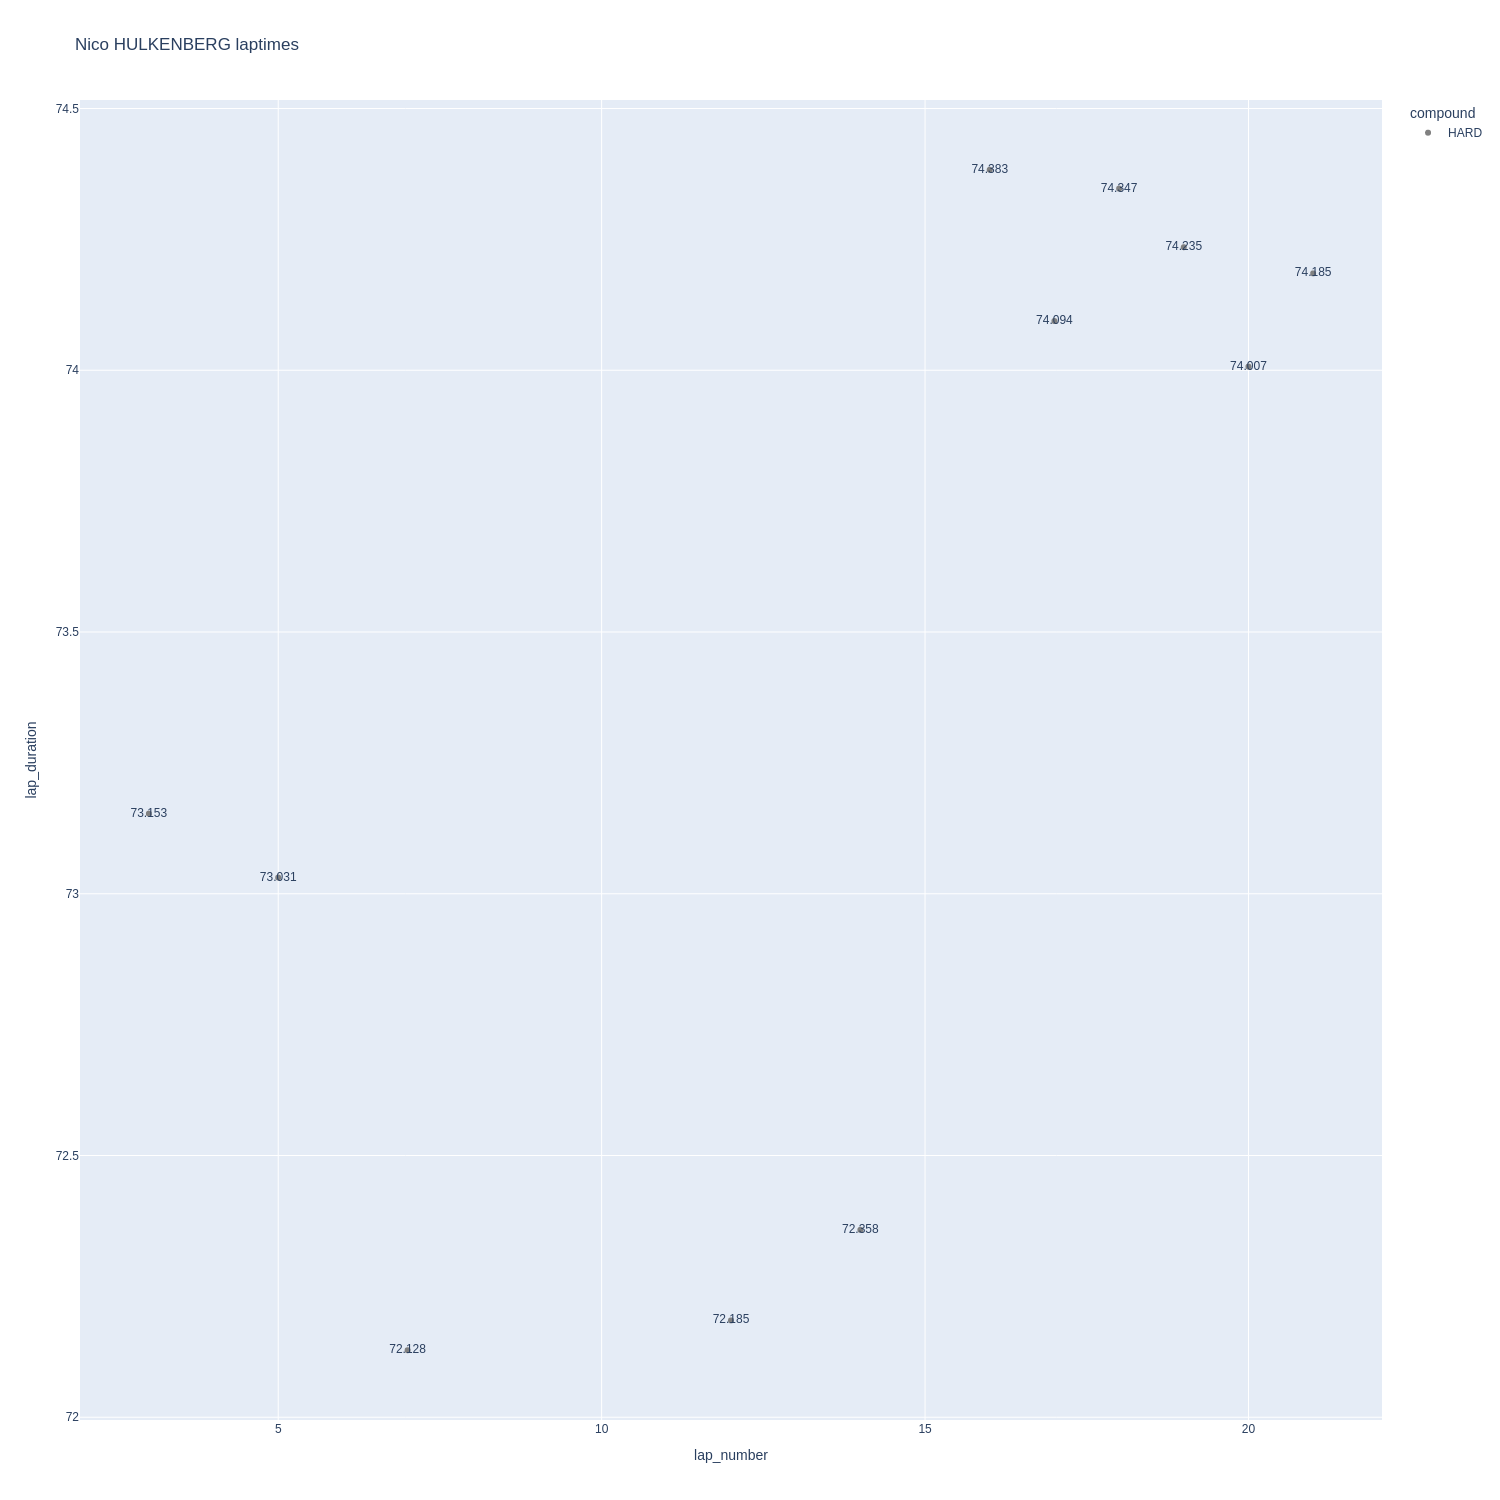

In [161]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

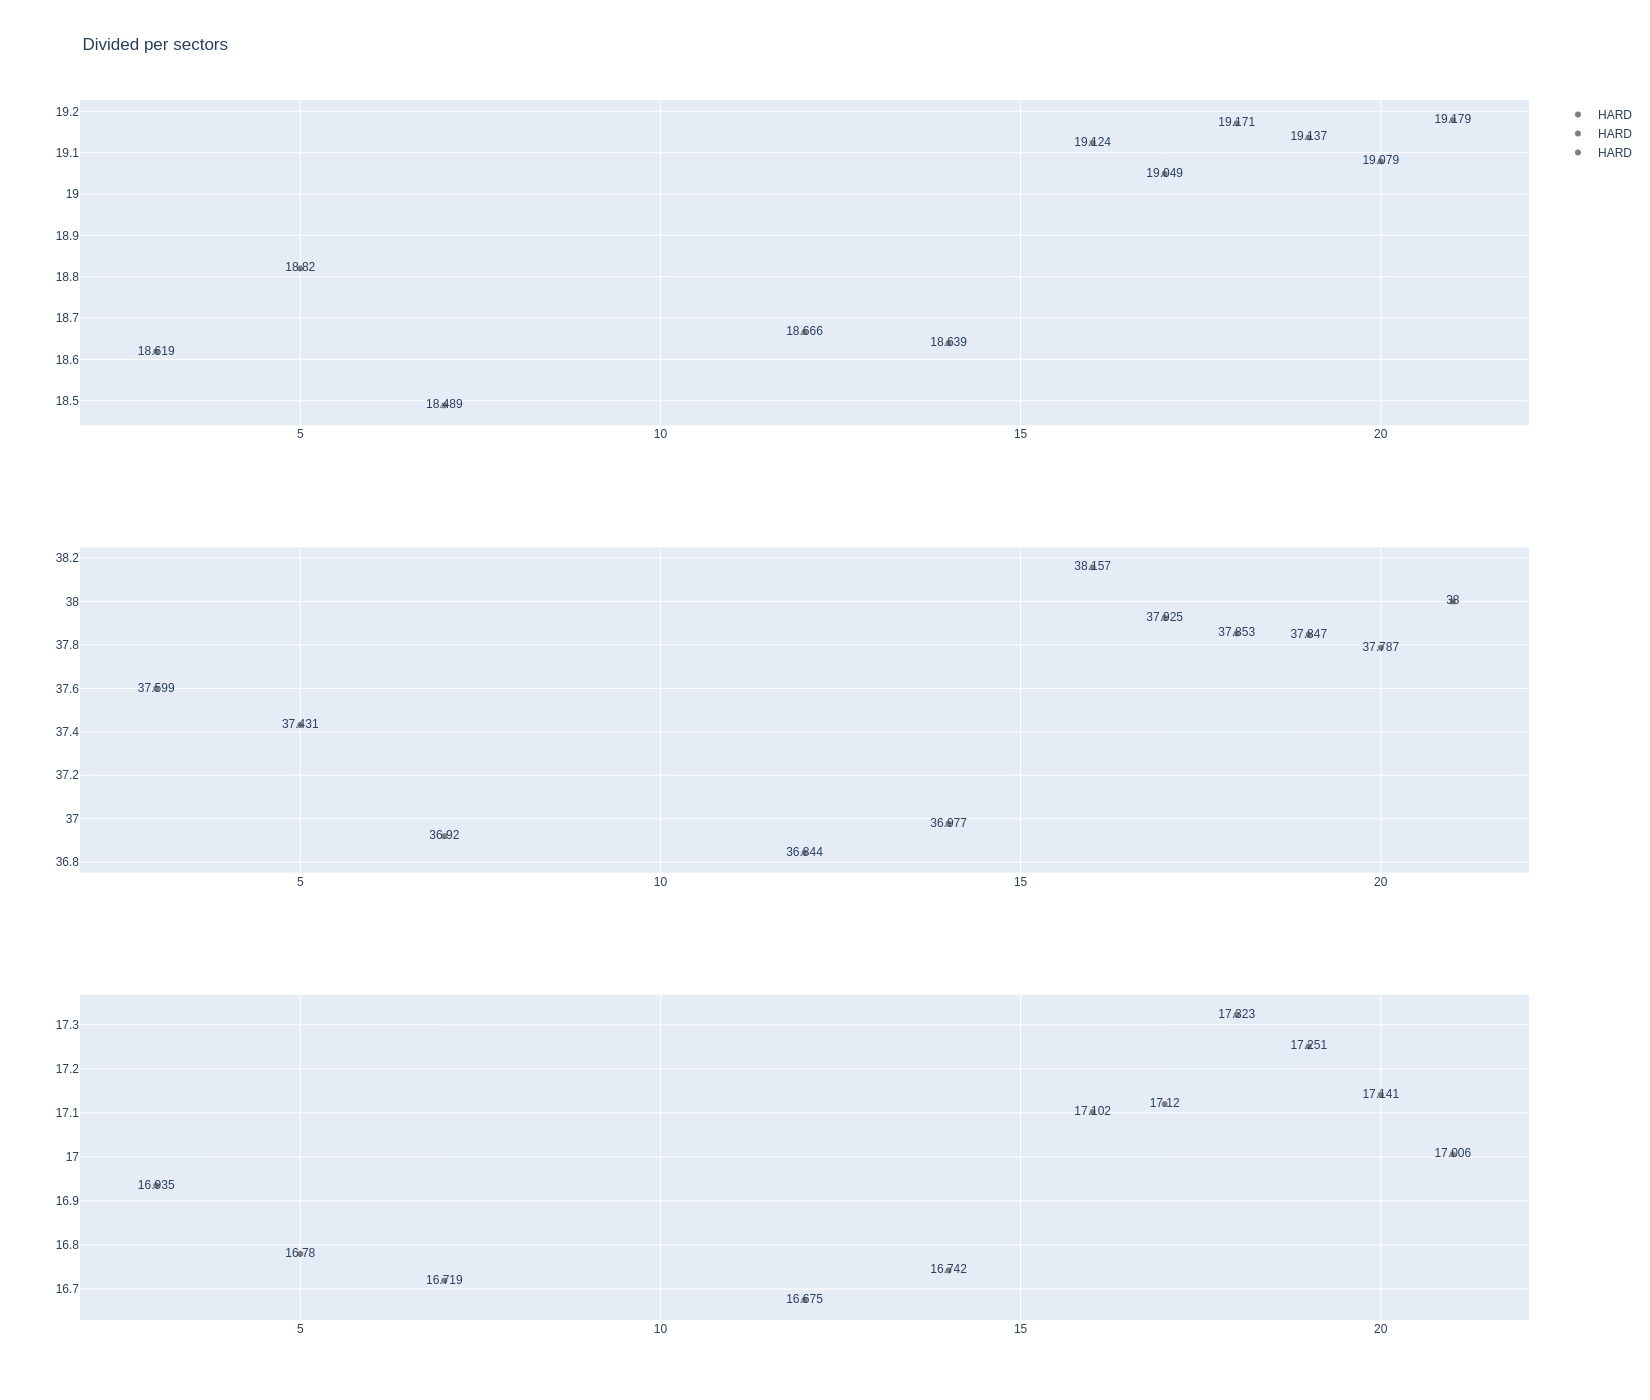

In [162]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [163]:
data = libraryDataF1.getinfolongruns(jointables2,5,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
64   Gabriel BORTOLETO     HARD  2025-11-07T14:40:11.492000+00:00           3   
100  Gabriel BORTOLETO     HARD  2025-11-07T14:43:17.437000+00:00           5   
136  Gabriel BORTOLETO     HARD  2025-11-07T14:46:26.220000+00:00           7   
274  Gabriel BORTOLETO     HARD  2025-11-07T15:04:42.257000+00:00          13   
311  Gabriel BORTOLETO     HARD  2025-11-07T15:07:25.624000+00:00          15   
330  Gabriel BORTOLETO     HARD  2025-11-07T15:08:39.884000+00:00          16   
349  Gabriel BORTOLETO     HARD  2025-11-07T15:09:54.265000+00:00          17   
365  Gabriel BORTOLETO     HARD  2025-11-07T15:11:09.087000+00:00          18   
382  Gabriel BORTOLETO     HARD  2025-11-07T15:12:23.632000+00:00          19   
399  Gabriel BORTOLETO     HARD  2025-11-07T15:13:38.212000+00:00          20   
411  Gabriel BORTOLETO     HARD  2025-11-07T15:14:52.446000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
64              19.050             37.467             16.833        73.350  
100             18.625             37.160             16.752        72.537  
136             18.548             36.974             16.771        72.293  
274             18.869             37.441             16.879        73.189  
311             19.292             37.893             17.078        74.263  
330             19.193             38.115             17.125        74.433  
349             19.254             38.398             17.137        74.789  
365             19.099             38.391             17.073        74.563  
382             19.044             38.387             17.114        74.545  
399             19.023             38.214             16.999        74.236  
411             19.350             38.482             17.234        75.066

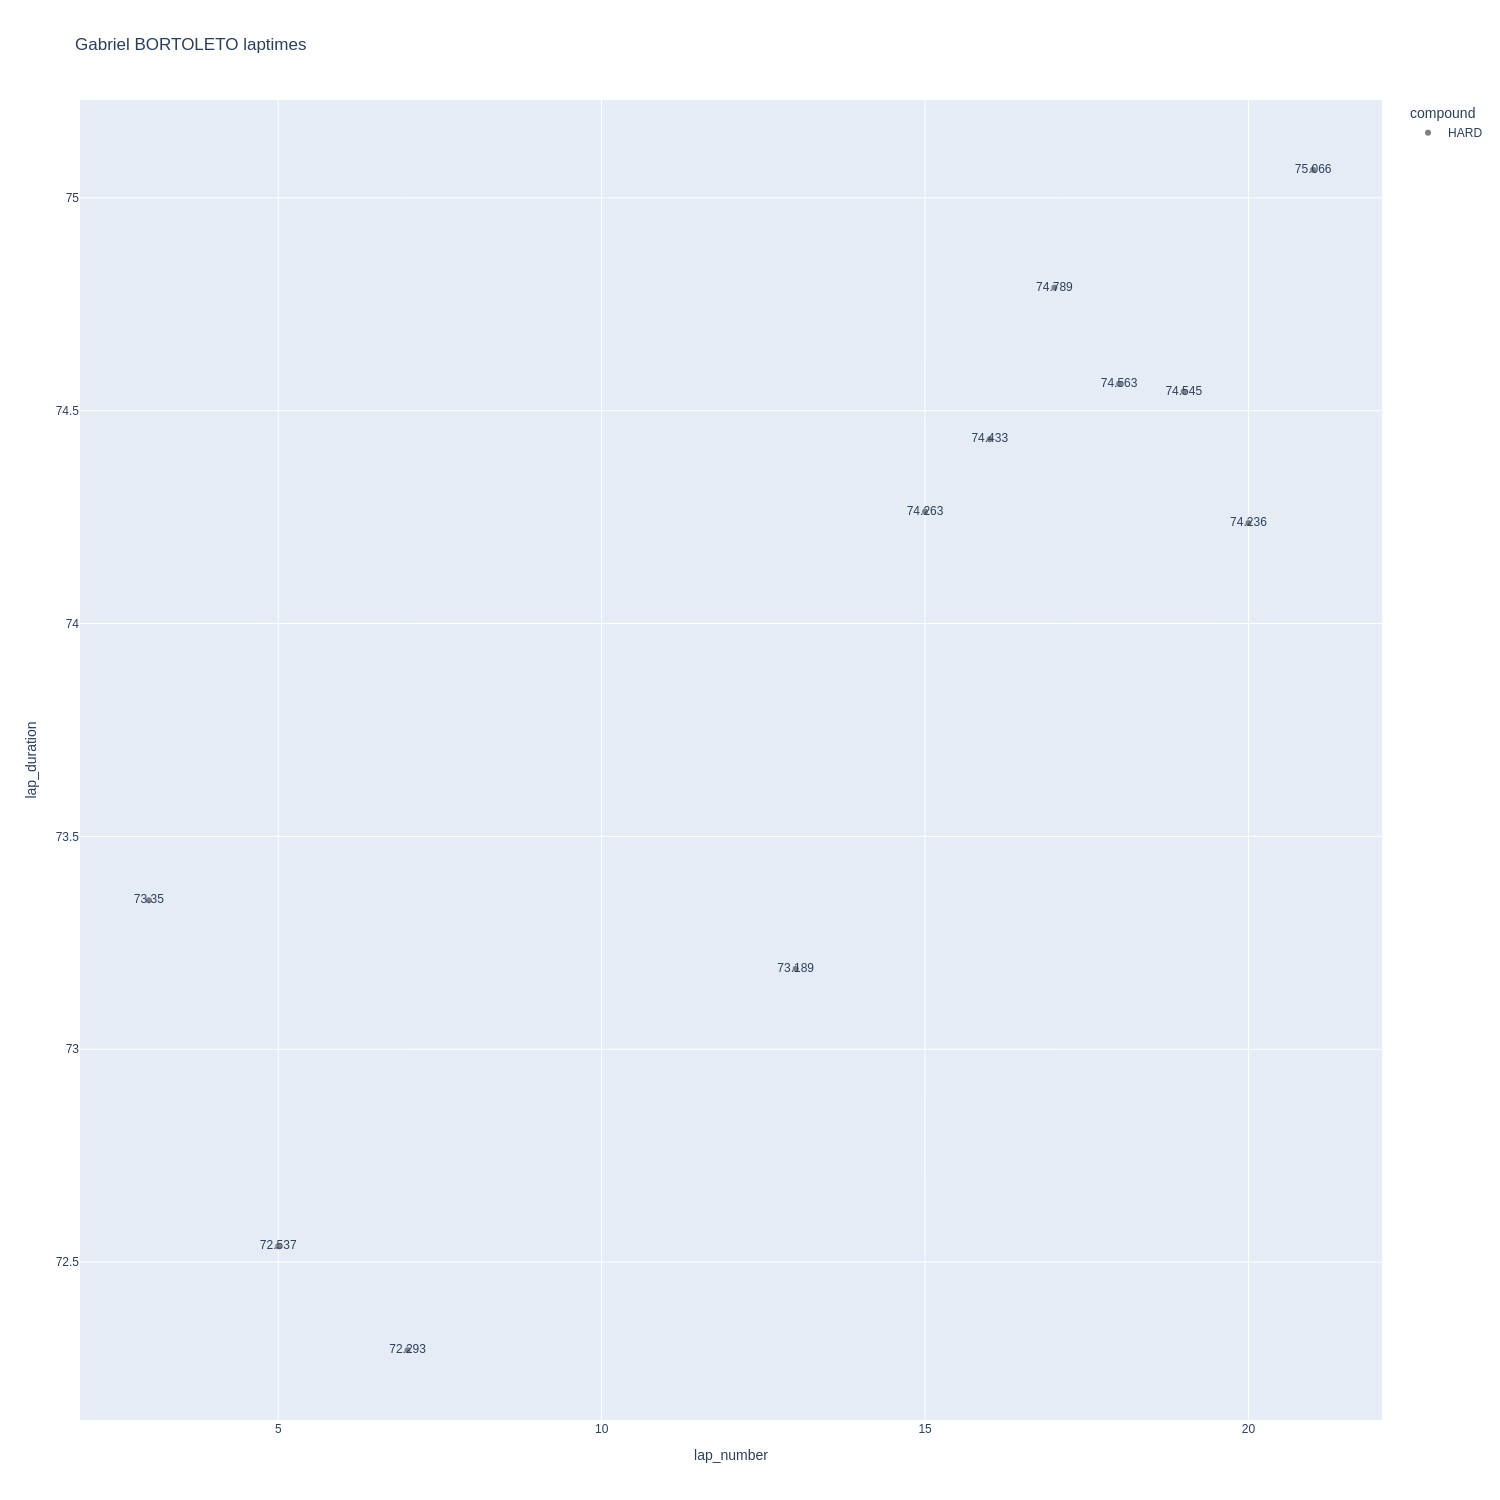

In [164]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

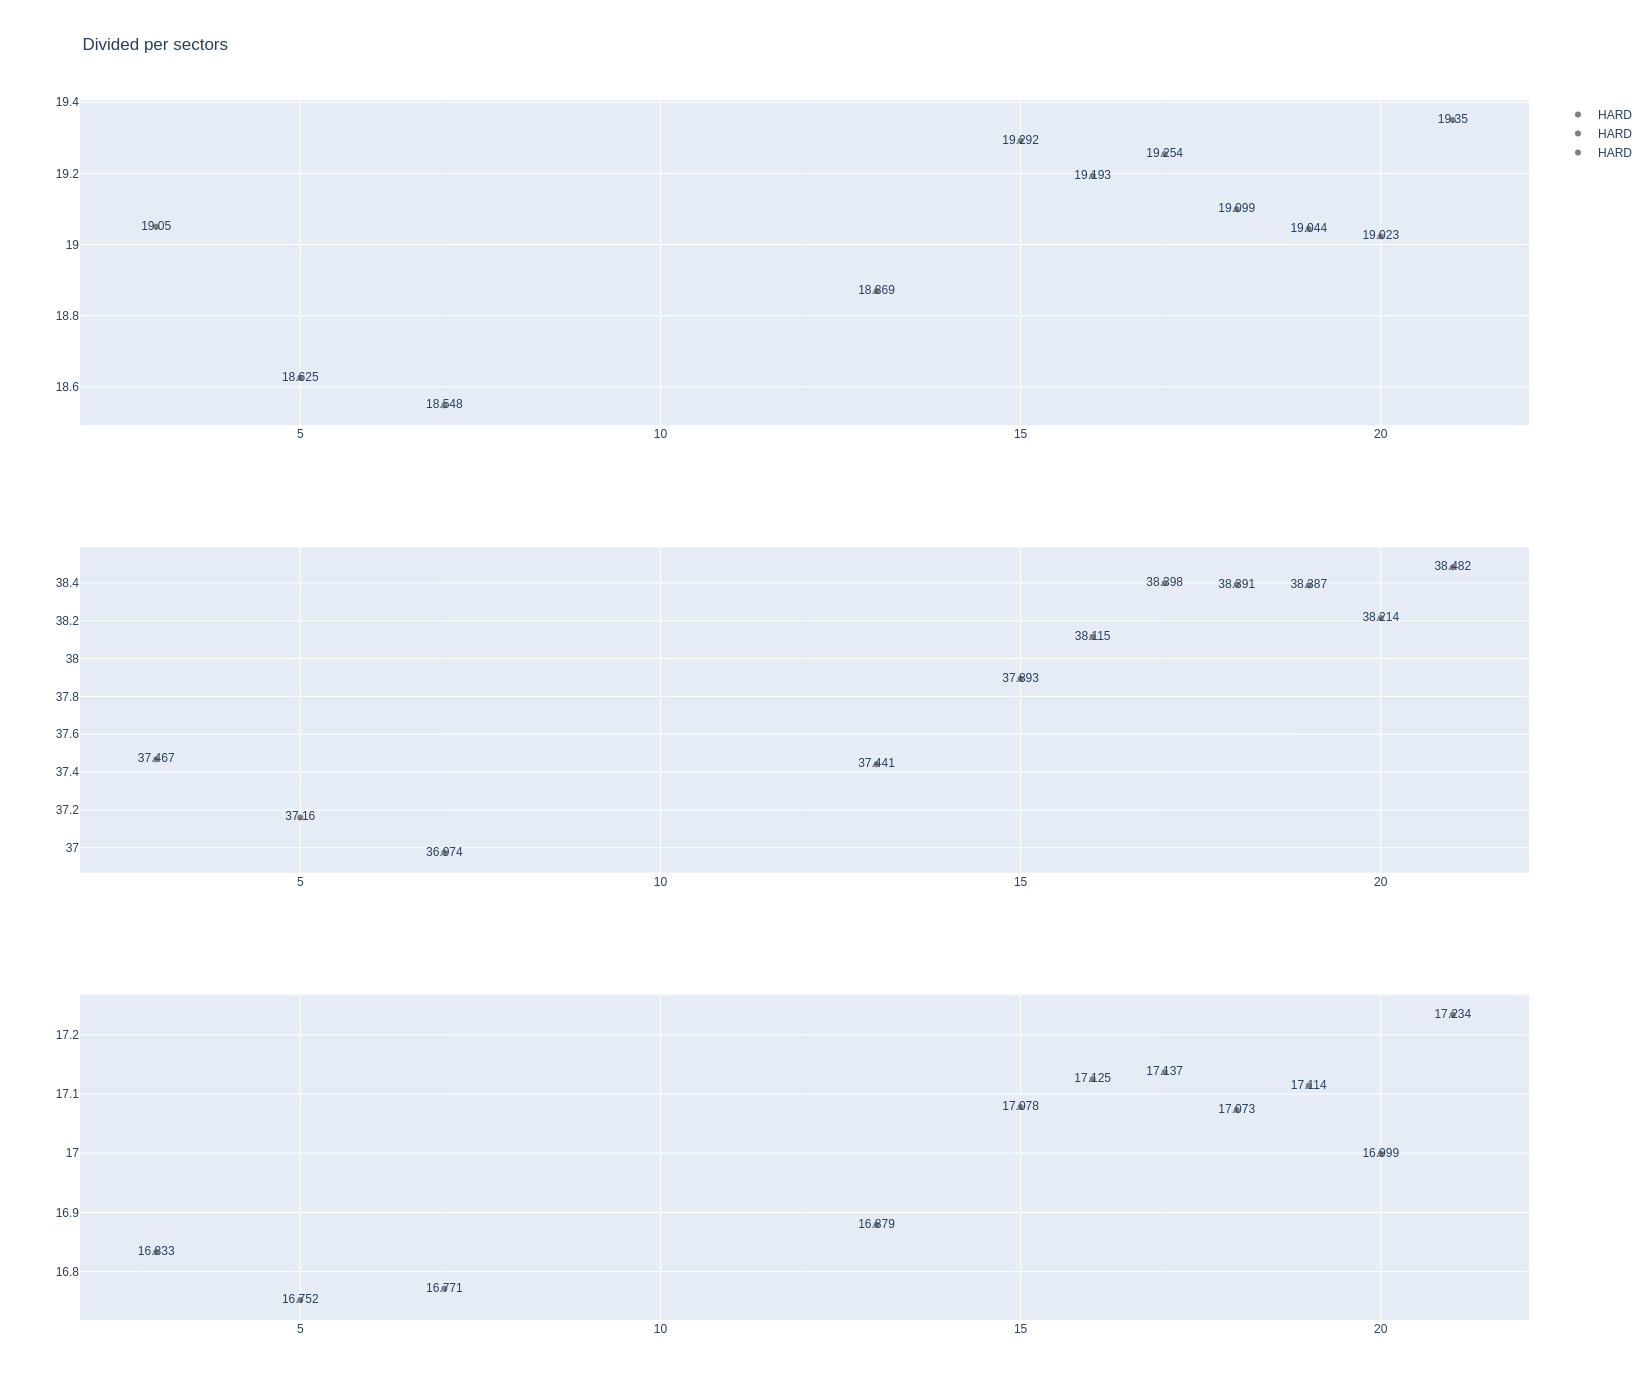

In [165]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Long runs mean for each driver

In [166]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration

In [167]:
sorted_laps = pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3'])

In [168]:
sorted_laps.sort_values(by='lap_duration',ascending=True)

driver compound  lap_duration    sector1    sector2    sector3
6     Fernando ALONSO     HARD     72.950250  18.750750  37.390000  16.809500
1        Lando NORRIS     HARD     72.956100  18.742300  37.513600  16.700200
15     Lewis HAMILTON     HARD     73.308333  18.817889  37.647556  16.842889
16       Carlos SAINZ     HARD     73.328100  18.769500  37.747700  16.810900
14   Franco COLAPINTO     HARD     73.371400  18.873800  37.724000  16.773600
11    Nico HULKENBERG     HARD     73.464182  18.906545  37.576364  16.981273
7     Charles LECLERC     HARD     73.473556  18.805333  37.622111  17.046111
18      Oscar PIASTRI     HARD     73.522091  19.011091  37.620909  16.890091
13       Esteban OCON     HARD     73.591364  19.099182  37.595364  16.896818
10    Alexander ALBON     HARD     73.752417  18.870417  38.000917  16.881083
8        Lance STROLL     HARD     73.782818  18.856636  37.752000  17.174182
4        Pierre GASLY     HARD     73.908100  19.139500  37.940100  16.828500
2   Gabriel BORTOLETO     HARD     73.933091  19.031545  37.902000  16.999545
19     Oliver BEARMAN     HARD     73.975400  19.064500  37.820100  17.090800
3        Isack HADJAR     HARD     74.192250  19.039000  38.154000  16.999250
5      Kimi ANTONELLI     HARD     74.241083  19.063667  38.225250  16.952167
17     George RUSSELL     HARD     74.273500  19.019583  38.330667  16.923250
12        Liam LAWSON     HARD     74.321000  19.068727  38.219545  17.032727
0      Max VERSTAPPEN     HARD     74.583667  19.052000  38.464933  17.066733
9        Yuki TSUNODA     SOFT     74.597000  19.141500  38.515000  16.940500

##### Sorted by sector 1

In [169]:
sorted_laps.sort_values(by='sector1',ascending=True)[['driver','compound','sector1']]

driver compound    sector1
1        Lando NORRIS     HARD  18.742300
6     Fernando ALONSO     HARD  18.750750
16       Carlos SAINZ     HARD  18.769500
7     Charles LECLERC     HARD  18.805333
15     Lewis HAMILTON     HARD  18.817889
8        Lance STROLL     HARD  18.856636
10    Alexander ALBON     HARD  18.870417
14   Franco COLAPINTO     HARD  18.873800
11    Nico HULKENBERG     HARD  18.906545
18      Oscar PIASTRI     HARD  19.011091
17     George RUSSELL     HARD  19.019583
2   Gabriel BORTOLETO     HARD  19.031545
3        Isack HADJAR     HARD  19.039000
0      Max VERSTAPPEN     HARD  19.052000
5      Kimi ANTONELLI     HARD  19.063667
19     Oliver BEARMAN     HARD  19.064500
12        Liam LAWSON     HARD  19.068727
13       Esteban OCON     HARD  19.099182
4        Pierre GASLY     HARD  19.139500
9        Yuki TSUNODA     SOFT  19.141500

##### Sorted by sector 2

In [170]:
sorted_laps.sort_values(by='sector2',ascending=True)[['driver','compound','sector2']]

driver compound    sector2
6     Fernando ALONSO     HARD  37.390000
1        Lando NORRIS     HARD  37.513600
11    Nico HULKENBERG     HARD  37.576364
13       Esteban OCON     HARD  37.595364
18      Oscar PIASTRI     HARD  37.620909
7     Charles LECLERC     HARD  37.622111
15     Lewis HAMILTON     HARD  37.647556
14   Franco COLAPINTO     HARD  37.724000
16       Carlos SAINZ     HARD  37.747700
8        Lance STROLL     HARD  37.752000
19     Oliver BEARMAN     HARD  37.820100
2   Gabriel BORTOLETO     HARD  37.902000
4        Pierre GASLY     HARD  37.940100
10    Alexander ALBON     HARD  38.000917
3        Isack HADJAR     HARD  38.154000
12        Liam LAWSON     HARD  38.219545
5      Kimi ANTONELLI     HARD  38.225250
17     George RUSSELL     HARD  38.330667
0      Max VERSTAPPEN     HARD  38.464933
9        Yuki TSUNODA     SOFT  38.515000

##### Sorted by sector 3

In [171]:
sorted_laps.sort_values(by='sector3',ascending=True)[['driver','compound','sector3']]

driver compound    sector3
1        Lando NORRIS     HARD  16.700200
14   Franco COLAPINTO     HARD  16.773600
6     Fernando ALONSO     HARD  16.809500
16       Carlos SAINZ     HARD  16.810900
4        Pierre GASLY     HARD  16.828500
15     Lewis HAMILTON     HARD  16.842889
10    Alexander ALBON     HARD  16.881083
18      Oscar PIASTRI     HARD  16.890091
13       Esteban OCON     HARD  16.896818
17     George RUSSELL     HARD  16.923250
9        Yuki TSUNODA     SOFT  16.940500
5      Kimi ANTONELLI     HARD  16.952167
11    Nico HULKENBERG     HARD  16.981273
3        Isack HADJAR     HARD  16.999250
2   Gabriel BORTOLETO     HARD  16.999545
12        Liam LAWSON     HARD  17.032727
7     Charles LECLERC     HARD  17.046111
0      Max VERSTAPPEN     HARD  17.066733
19     Oliver BEARMAN     HARD  17.090800
8        Lance STROLL     HARD  17.174182

#### Long runs mean

In [172]:
longruns_summary = libraryDataF1.obtainMeanLongRuns(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Mean pace per compound

In [173]:
#libraryDataF1.showDataLongRuns(longruns_summary,"INTERMEDIATE","mean_lap_time",['driver','mean_lap_time'])

In [174]:
libraryDataF1.showDataLongRuns(longruns_summary,"SOFT","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
9  Y TSUNODA         74.643

In [175]:
libraryDataF1.showDataLongRuns(longruns_summary,"MEDIUM","mean_lap_time",['driver','mean_lap_time'])

Empty DataFrame
Columns: [driver, mean_lap_time]
Index: []

In [176]:
libraryDataF1.showDataLongRuns(longruns_summary,"HARD","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
6       F ALONSO         72.950
1       L NORRIS         72.956
15    L HAMILTON         73.308
16       C SAINZ         73.328
14   F COLAPINTO         73.371
11  N HULKENBERG         73.464
7      C LECLERC         73.474
18     O PIASTRI         73.522
13        E OCON         73.591
10       A ALBON         73.752
8       L STROLL         73.783
4        P GASLY         73.908
2    G BORTOLETO         73.933
19     O BEARMAN         73.975
3       I HADJAR         74.192
5    K ANTONELLI         74.241
17     G RUSSELL         74.274
12      L LAWSON         74.321
0   M VERSTAPPEN         74.584

## Sprint Qualyfing
### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session as well.

In [3]:
libraryDataF1.obtain_information('race_control',session_key=9860)

meeting_key  session_key                       date driver_number  \
0          1273         9860  2025-11-07T18:30:00+00:00          None   
1          1273         9860  2025-11-07T18:42:00+00:00          None   
2          1273         9860  2025-11-07T18:42:12+00:00          None   
3          1273         9860  2025-11-07T18:45:39+00:00          None   
4          1273         9860  2025-11-07T18:46:07+00:00          None   
5          1273         9860  2025-11-07T18:49:00+00:00          None   
6          1273         9860  2025-11-07T18:58:45+00:00          None   
7          1273         9860  2025-11-07T18:58:58+00:00          None   
8          1273         9860  2025-11-07T18:59:00+00:00          None   
9          1273         9860  2025-11-07T18:59:21+00:00          None   
10         1273         9860  2025-11-07T18:59:45+00:00          None   
11         1273         9860  2025-11-07T19:01:38+00:00          None   
12         1273         9860  2025-11-07T19:01:59+00:00          None   
13         1273         9860  2025-11-07T19:04:39+00:00          None   
14         1273         9860  2025-11-07T19:06:00+00:00          None   
15         1273         9860  2025-11-07T19:06:19+00:00          None   
16         1273         9860  2025-11-07T19:14:00+00:00          None   
17         1273         9860  2025-11-07T19:14:07+00:00          None   
18         1273         9860  2025-11-07T19:17:14+00:00          None   
19         1273         9860  2025-11-07T19:17:35+00:00          None   
20         1273         9860  2025-11-07T19:17:41+00:00          None   
21         1273         9860  2025-11-07T19:19:00+00:00          None   

   lap_number category           flag   scope  sector  \
0        None     Flag          GREEN   Track     NaN   
1        None     Flag      CHEQUERED   Track     NaN   
2        None    Other           None    None     NaN   
3        None    Other           None    None     NaN   
4        None    Other           None    None     NaN   
5        None     Flag          GREEN   Track     NaN   
6        None     Flag  DOUBLE YELLOW  Sector    11.0   
7        None     Flag          CLEAR  Sector    11.0   
8        None     Flag      CHEQUERED   Track     NaN   
9        None    Other           None    None     NaN   
10       None    Other           None    None     NaN   
11       None    Other           None    None     NaN   
12       None    Other           None    None     NaN   
13       None    Other           None    None     NaN   
14       None     Flag          GREEN   Track     NaN   
15       None    Other           None    None     NaN   
16       None     Flag      CHEQUERED   Track     NaN   
17       None    Other           None    None     NaN   
18       None    Other           None    None     NaN   
19       None    Other           None    None     NaN   
20       None    Other           None    None     NaN   
21       None    Other           None    None     NaN   

                                              message  
0                         GREEN LIGHT - PIT EXIT OPEN  
1                                      CHEQUERED FLAG  
2           FIRST CAR TO TAKE THE FLAG - CAR 43 (COL)  
3   FIA STEWARDS: SQ1 INCIDENT INVOLVING CARS 81 (...  
4   FIA STEWARDS: SQ1 INCIDENT INVOLVING CARS 81 (...  
5                         GREEN LIGHT - PIT EXIT OPEN  
6                    DOUBLE YELLOW IN TRACK SECTOR 11  
7                            CLEAR IN TRACK SECTOR 11  
8                                      CHEQUERED FLAG  
9           FIRST CAR TO TAKE THE FLAG - CAR 44 (HAM)  
10  CAR 44 (HAM) TIME 1:09.934 DELETED - DOUBLE YE...  
11  FIA STEWARDS: SQ2 INCIDENT INVOLVING CARS 6 (H...  
12  FIA STEWARDS: SQ2 INCIDENT INVOLVING CARS 6 (H...  
13  TURN 10 INCIDENT INVOLVING CAR 44 (HAM) NOTED ...  
14                        GREEN LIGHT - PIT EXIT OPEN  
15  FIA STEWARDS: TURN 10 INCIDENT INVOLVING CAR 4...  
16                                     CHEQUERED FLAG  
17  

### Obtain setup

In [4]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9860)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9860)
drivers = libraryDataF1.obtain_information('drivers',session_key=9860)
# drivers.loc[drivers['driver_number']==30,'team_name'] = 'RB'
# drivers.loc[drivers['driver_number']==43,'team_name'] = 'Williams'
# drivers.loc[drivers['driver_number']==50,'team_name'] = 'Haas F1 Team'
# drivers.loc[drivers['driver_number']==50,'team_colour'] = 'B6BABD'
# drivers.loc[drivers['driver_number']==30,'team_colour'] = '6692FF'
# drivers.loc[drivers['driver_number']==43,'team_colour'] = '64C4FF'
libraryDataF1.obtain_drivers_colours(drivers)

In race control dataset, I can see a lot of laptimes deleted, principally for track limits. Those laps deleted ,within the 107%, were deleted from dataset in order to obtain only the valid laps for the analysis.

In [5]:
laptimes_deleted = [69.934]
driver_number_lap_deleted = [44]

for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
    try:
        id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
        qualyfing = qualyfing.drop(id_deleted)
    except:
        print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [6]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)

The fastest lap is 69.243 seconds (1.09.243= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (74.09 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [8]:
allowedlaps = 69.243*1.07
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < @allowedlaps")

In [9]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
There were a big track improvement between Q1 and Q2 being Bearman 3 tenths faster than Franco's best laptime. Alpine and Sauber had a good performance but they felt in Q2. Williams and Ferrari suffered and Mercedes seems competitive in this track. Aston had a better feeling with mediums.

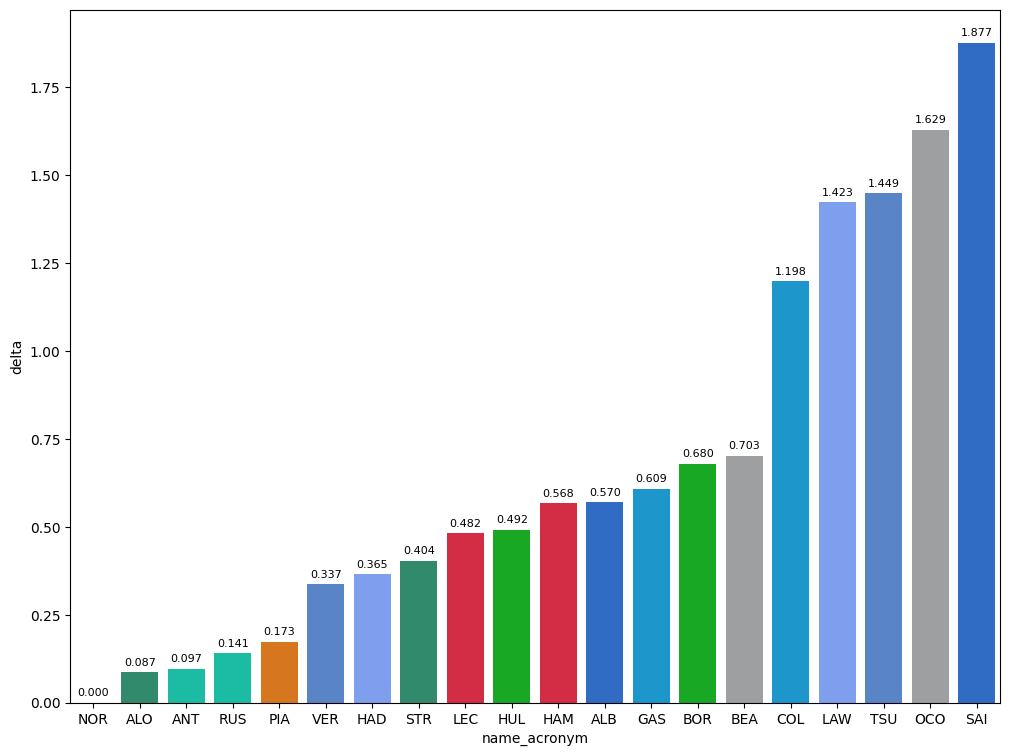

In [10]:
libraryDataF1.obtainchart("name_acronym","delta",jointables.sort_values(by=['fastest_lap'],ascending=True))

In [11]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In [13]:
# In order to know when each session finished, race control dataset will be consulted.
maximumDateQ1 = "date_start <'2025-11-07T18:49:00+00:00'"
maximumDateQ2 = "date_start <'2025-11-07T19:06:00+00:00' and date_start >='2025-11-07T18:49:00+00:00'"
maximumDateQ3 = "date_start >'2025-11-07T19:06:00+00:00'"

### Sprint Qualyfing 1

In [14]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

Franco and Lawson were so slow in first sector and this finished with their options to pass. Franco tried to recover in the second sector being very quick but I think that for the setup he was unable to cut the gap. On the other hand, Lawson was quick in the last sector so that means that he had pace on the straights

In [15]:
#Reference
P15 = q1Data[14:15]

In [16]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

Driver: Kimi ANTONELLI Sector 1:  18.104 Sector 2:  35.999 Sector 3:  16.278


In [17]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 =  libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             43         0.060                0.174               -0.125   
1             30         0.285                0.239                0.134   
2             22         0.311                0.058                0.216   
3             31         0.491                0.168                0.200   
4             55         0.739                0.086                0.490   

   difference_sector_3 name_acronym  
0                0.011          COL  
1               -0.088          LAW  
2                0.037          TSU  
3                0.123          OCO  
4                0.163          SAI

#### Best sector per driver

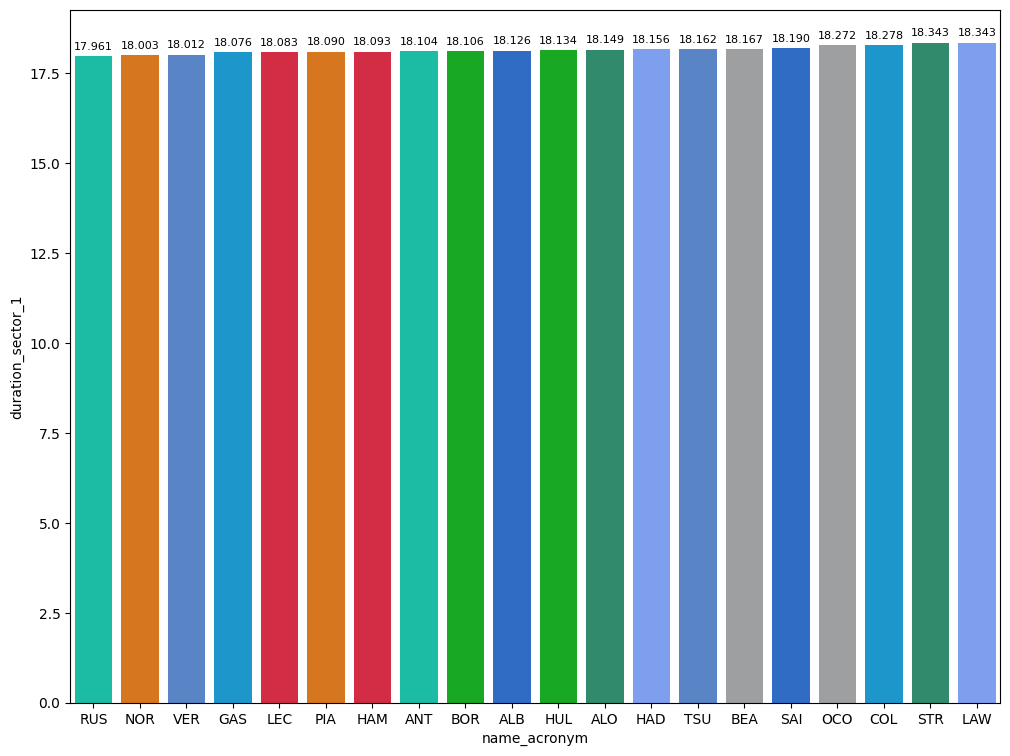

In [18]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

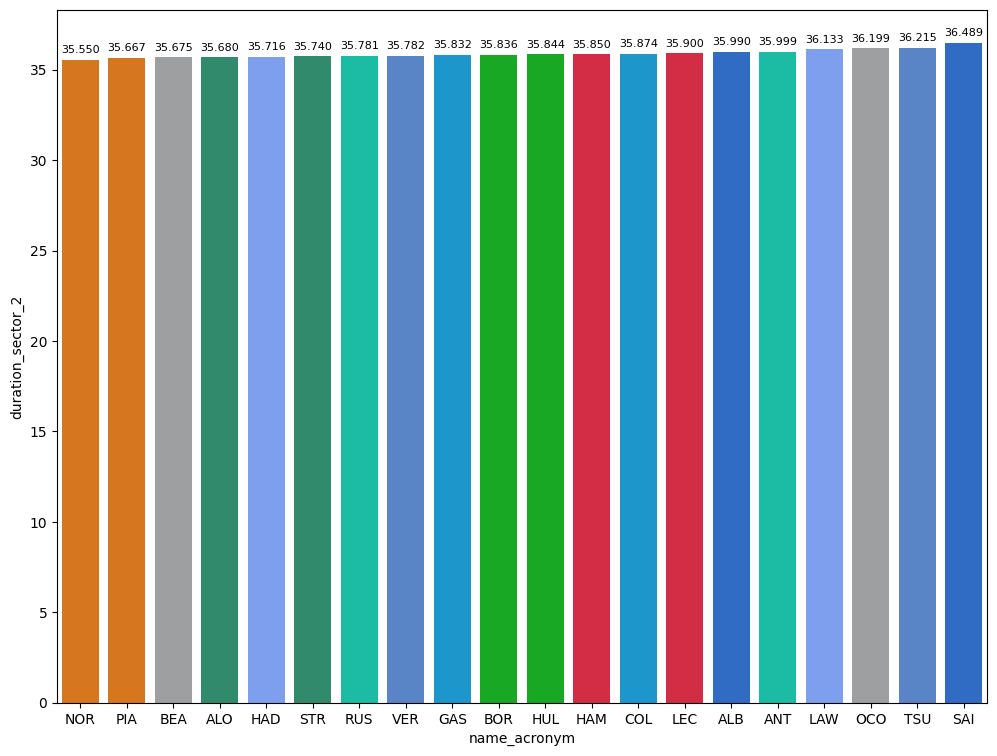

In [19]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

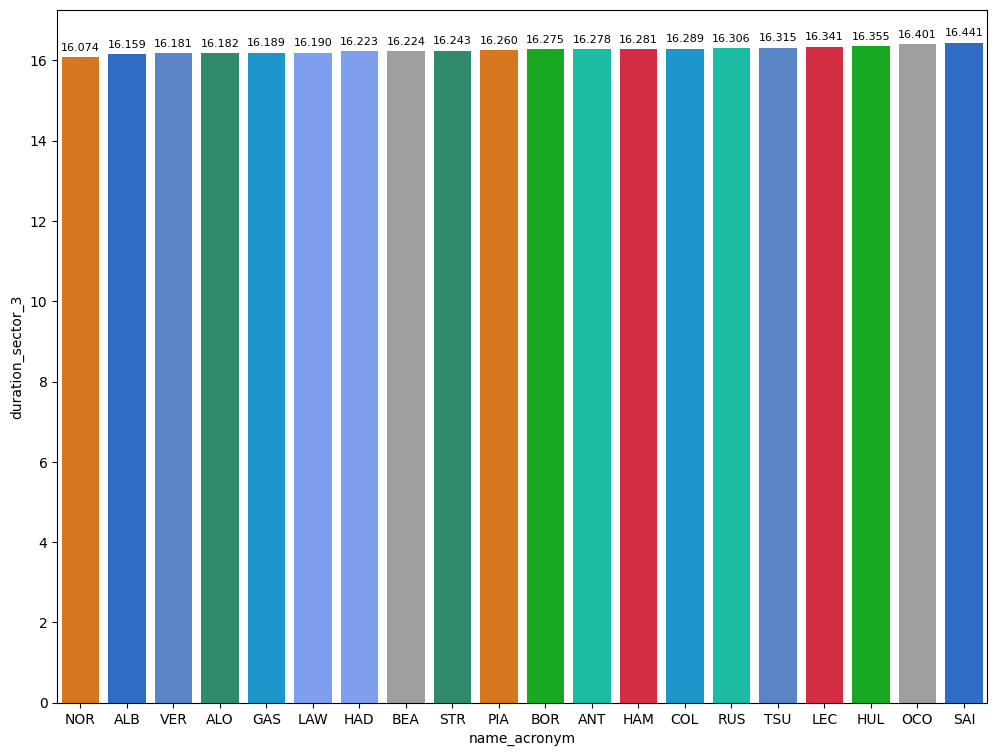

In [20]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Sprint Qualyfing 2

In [21]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

S1: Very competitive sector. Verstappen's setup was very competitive being the references as Mercedes and Gasly
S2: Alonso dominated followed by McLaren and Ferrari had a lot of problems. Max and Gasly lost all the advnatage in S2.
S3: Ferrari has a problem with traction and McLaren and Mercedes dominated here.

In [22]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

Driver: Nico HULKENBERG Sector 1:  18.054 Sector 2:  35.559 Sector 3:  16.122


In [23]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             44         0.076               -0.085                0.013   
1             23         0.078               -0.086                0.076   
2             10         0.117               -0.197                0.283   
3              5         0.188               -0.026                0.013   
4             87         0.211               -0.019                0.261   

   difference_sector_3 name_acronym  
0                0.148          HAM  
1                0.088          ALB  
2                0.031          GAS  
3                0.201          BOR  
4               -0.031          BEA

#### Best sector per driver

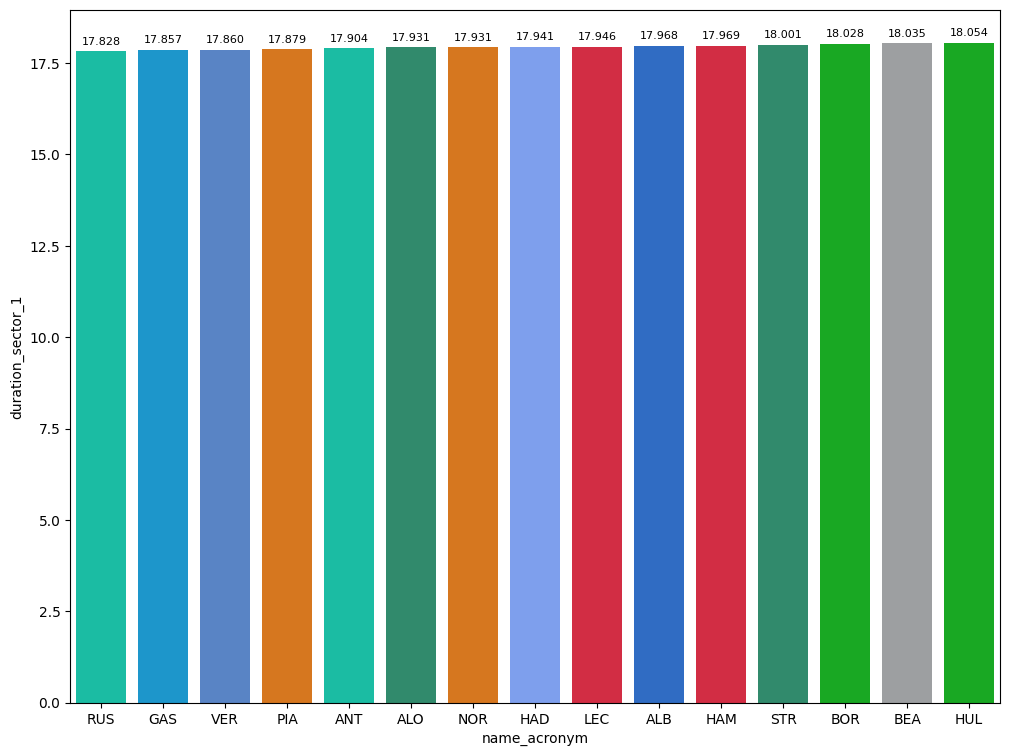

In [36]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

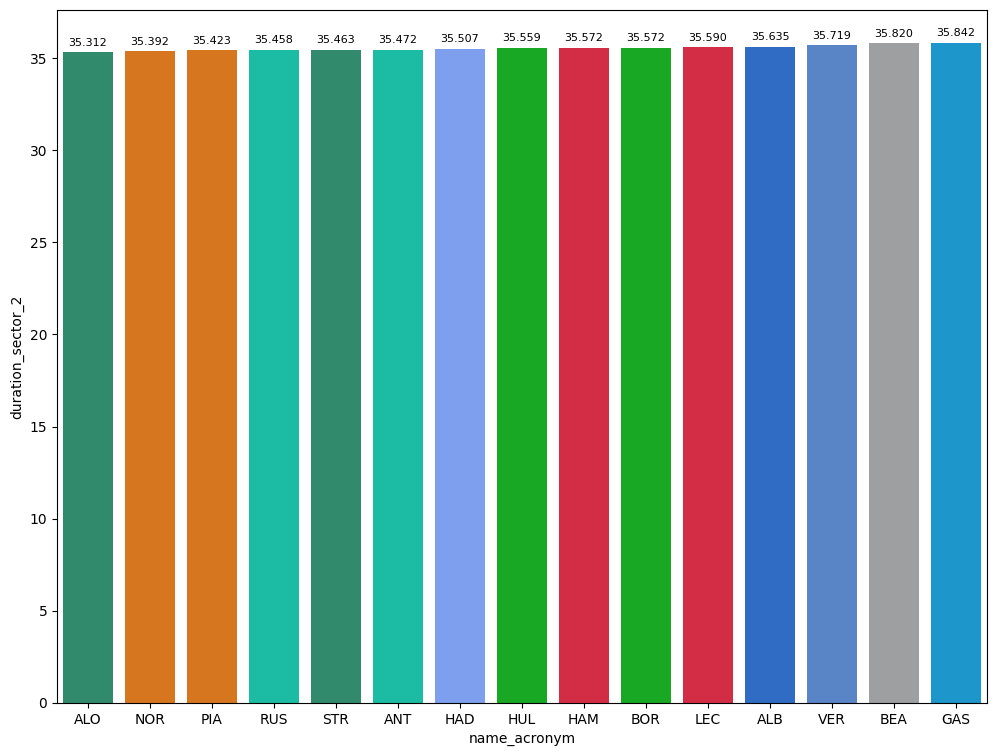

In [37]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

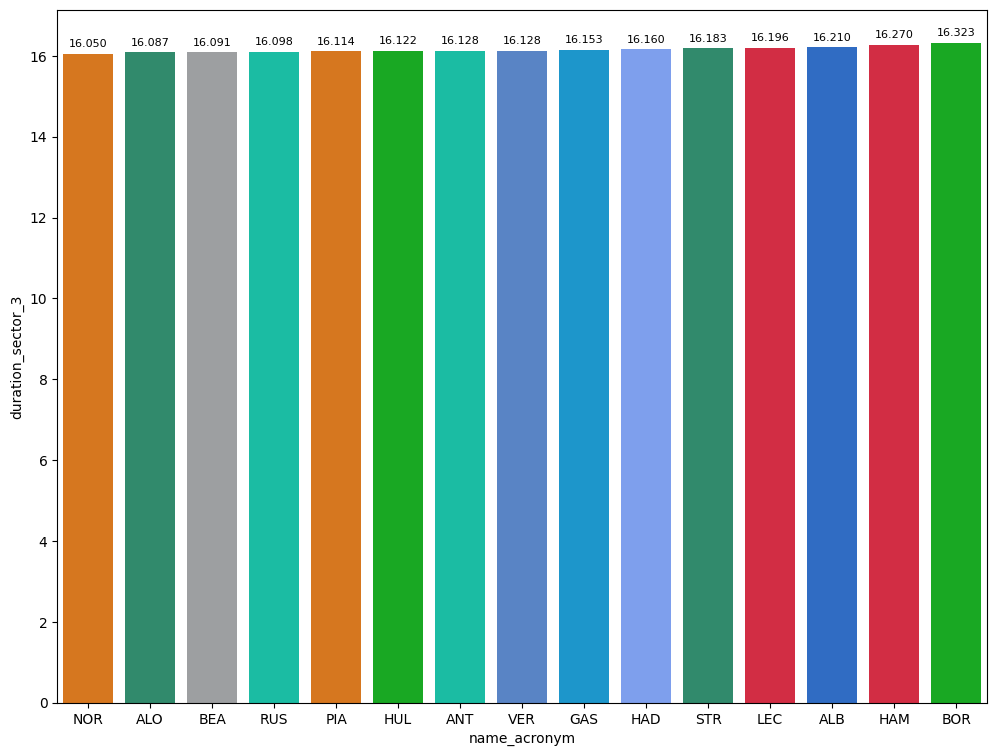

In [38]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Sprint Qualyfing 3

In [27]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

In [28]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

Driver: Lando NORRIS Sector 1:  17.756 Sector 2:  35.375 Sector 3:  16.112


##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

It seems that Verstappen setup is centered on the straights beeting for S1 and S3 and sacrifying a lot the 2 sector where they are the slowest. Mercdes is so fast in the 1 sector and in 2 and 3 Aston can compete with them.

In [29]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             12         0.097                0.078                0.008   
1             81         0.185                0.144               -0.022   
2             63         0.252                0.027                0.122   
3             14         0.253                0.085                0.107   
4              1         0.337               -0.014                0.290   
5             18         0.428                0.210                0.108   
6             16         0.482                0.179                0.187   
7              6         0.532                0.118                0.271   
8             27         0.692                0.396                0.048   

   difference_sector_3 name_acronym  
0                0.011          ANT  
1                0.063          PIA  
2                0.103          RUS  
3                0.061          ALO  
4                0.061          VER  
5                0.110          STR  
6                0.116          LEC  
7                0.143          HAD  
8                0.248          HUL

#### Best sector per driver

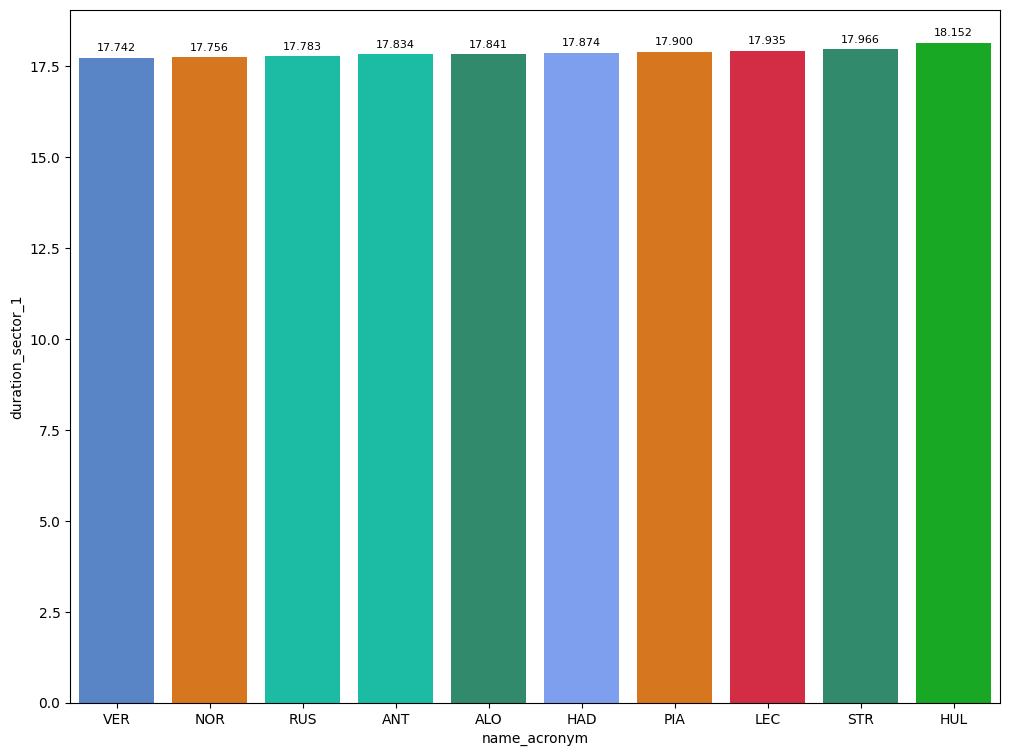

In [30]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

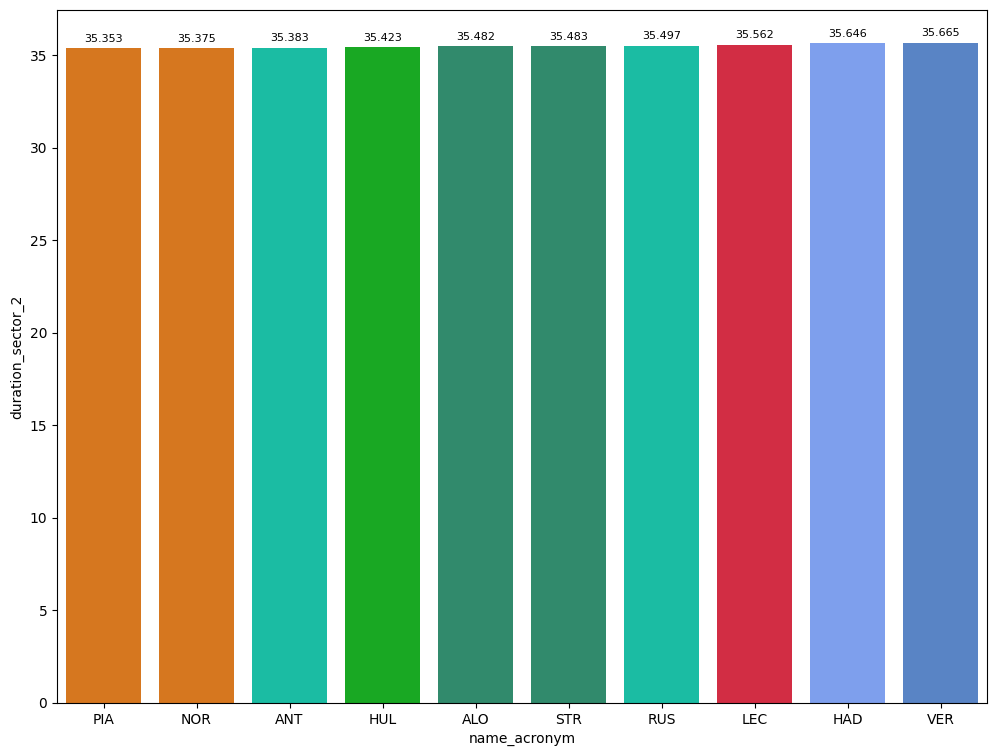

In [31]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

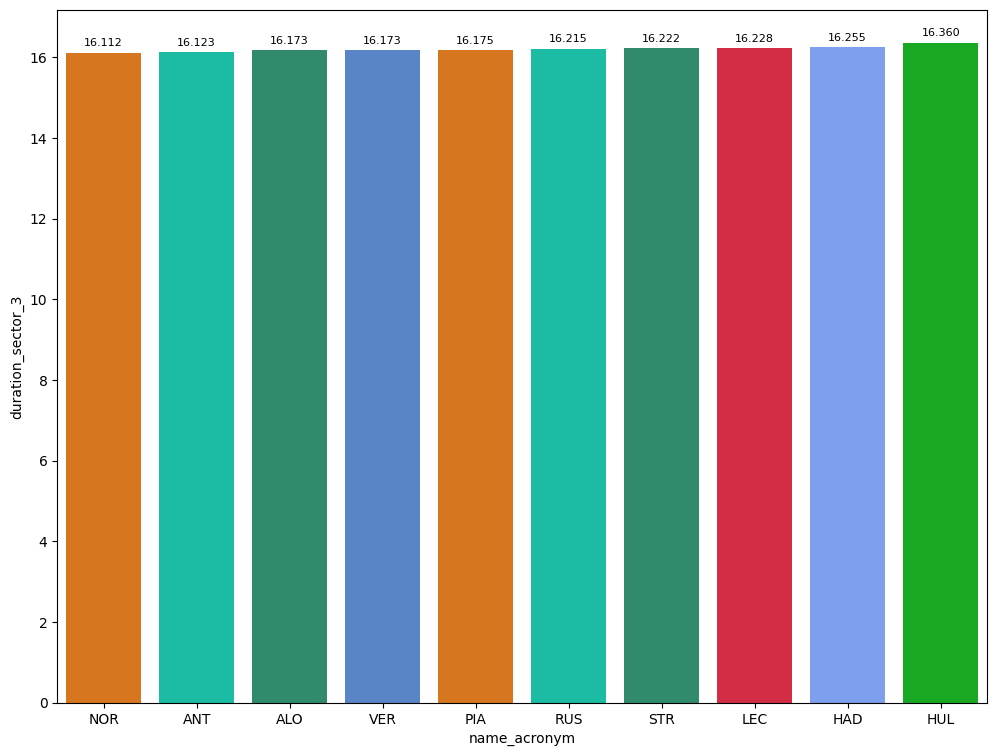

In [32]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

### Best sector in the session

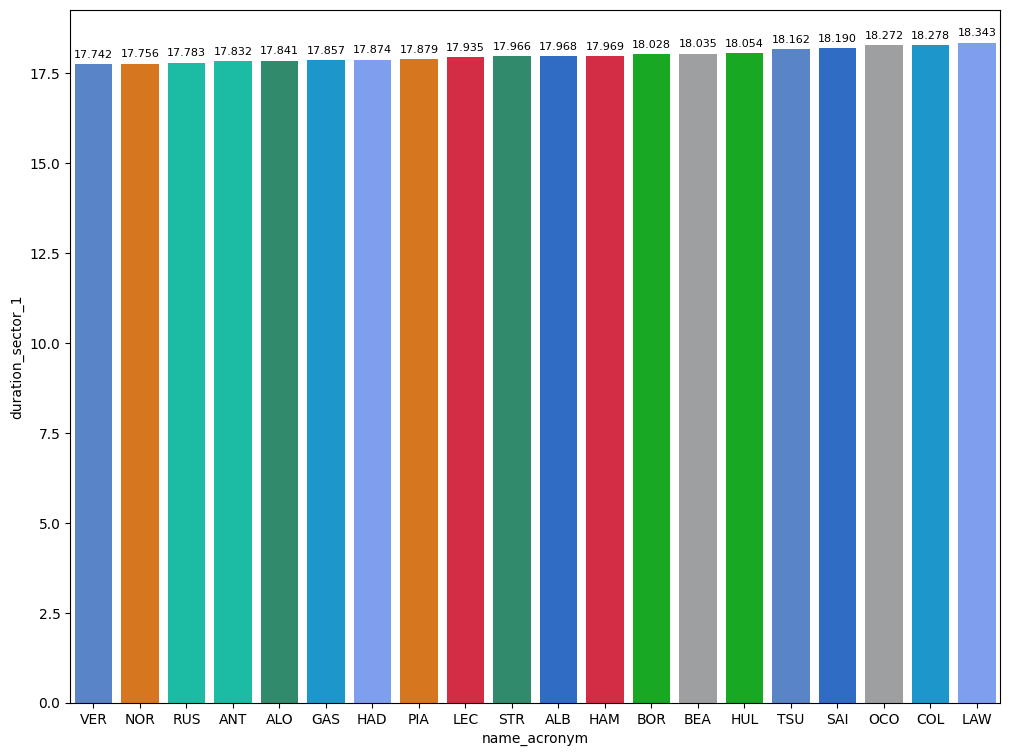

In [33]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

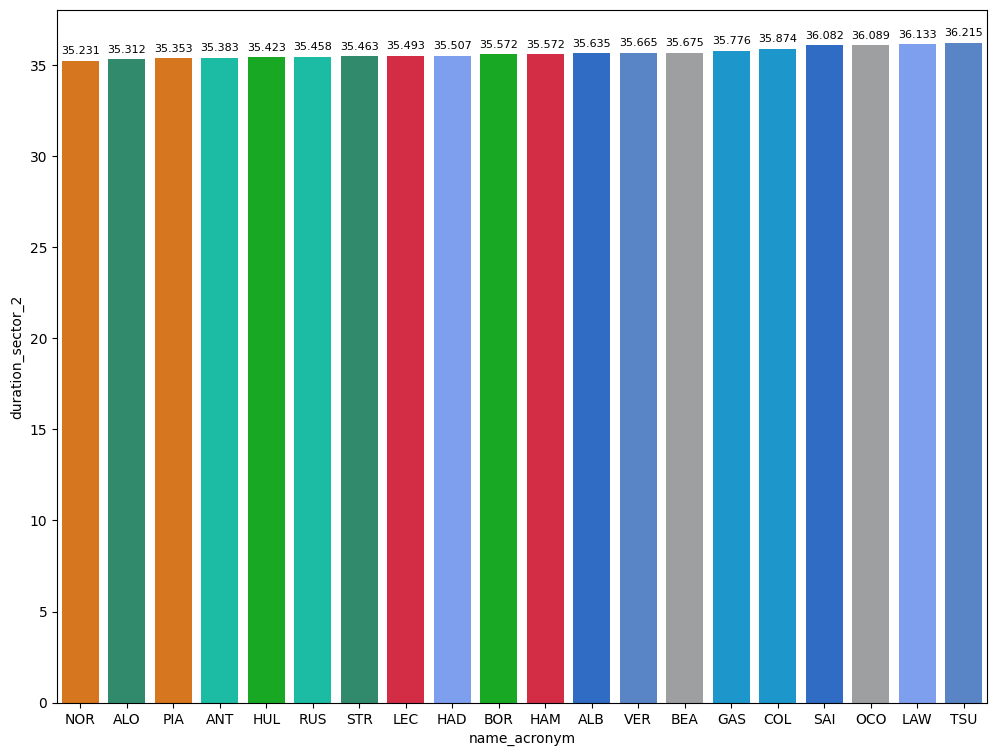

In [34]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

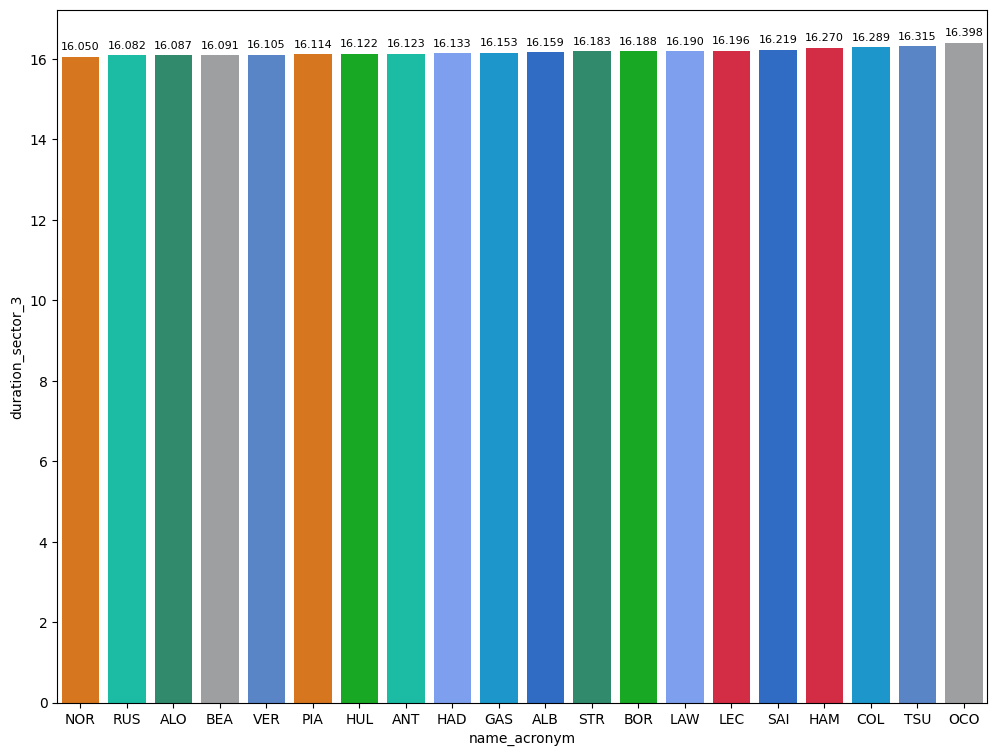

In [35]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

## Predictions

In [ ]:
# Free Practice 1
practice = libraryDataF1.obtain_information('laps',session_key=9626)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9626)
drivers = libraryDataF1.obtain_information('drivers',session_key=9626)

stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice1 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

# Free Practice 2
# practice = libraryDataF1.obtain_information('laps',session_key=9600)
# stintInformation = libraryDataF1.obtain_information('stints',session_key=9600)
# drivers = libraryDataF1.obtain_information('drivers',session_key=9600)


# stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
# jointablesfreepractice2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

# Free Practice 3
# practice = libraryDataF1.obtain_information('laps',session_key=9591)
# stintInformation = libraryDataF1.obtain_information('stints',session_key=9591)
# drivers = libraryDataF1.obtain_information('drivers',session_key=9591)

# stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
# jointablesfreepractice1 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])


### Qualyfing prediction

In [ ]:
qualy_simulation = libraryDataF1.qualyfing_prediction([jointablesfreepractice1,jointablesfreepractice1],drivers,0.05,0.07,0.08)
qualy_simulation.sort_values(by='qualy_lap_time')

### Race prediction

In [ ]:
race_simulation = libraryDataF1.race_prediction(jointablesfreepractice1,drivers,74,78)
race_simulation.groupby('team').mean().sort_values(by='mean_lap_duration')

## Sprint

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9635)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9635)
drivers = libraryDataF1.obtain_information('drivers',session_key=9635)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables = pd.merge(race,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Top speed captured in the speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=74").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Race pace per teams

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=74").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=74").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=74").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

##### Sector 1
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 95").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

##### Sector 2
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 95").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

##### Sector 3
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 95").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 70
MAXIMUM_SECONDS = 74

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 30 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 50 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,50,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 43 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

### Long runs mean for each driver

In [ ]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables,MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='lap_duration',ascending=True)[['driver','lap_duration','compound']]

#### Sorted by sector 1

In [ ]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector1',ascending=True)[['driver','sector1','compound']]

#### Sector by sector 2

In [ ]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector2',ascending=True)[['driver','sector2','compound']]

#### Sorted by sector 3

In [ ]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector3',ascending=True)[['driver','sector3','compound']]

## Qualyfing
No data available

In [ ]:
libraryDataF1.obtain_information('race_control',session_key=9627)

### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9627)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9627)
drivers = libraryDataF1.obtain_information('drivers',session_key=9627)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
session = ff1.get_session(2024, 21, 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

In [ ]:
laptimes_deleted = [95.457,92.626,98.172,107.595,106.347,102.487,97.411,92.546,97.780,97.470,
                    99.474,98.172,99.353,90.003,99.905,96.289,91.718,
                    107.298,93.551,112.905,96.693,92.010,116.131,
                    100.062,93.872,98.336,88.891]
driver_number_lap_deleted = [23,44,18,24,4,22,14,23,44,18,77,55,63,1,27,50,30,
                             4,44,27,22,31,30,63,11,23,63]

for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
    try:
        id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
        qualyfing = qualyfing.drop(id_deleted)
    except:
        print("Laptime deleted"+str(ltime_deleted)+" associated with the selected driver"+str(dn_time_deleted)+" does not exist. Please, check again the order of the arrays")

In [ ]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)

In this case, the fastest lap is 92.33 seconds (1.32.33= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 98.79 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration <= 98.79")

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole.

In [ ]:
dt = jointables.sort_values(by=['fastest_lap'],ascending=True)
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In order to know when each session finished, race control dataset will be consulted.

In [ ]:
maximumDateQ1 = "date_start <'2024-11-03T11:03:00+00:00'"
maximumDateQ2 = "date_start <'2024-11-03T11:37:00+00:00' and date_start >'2024-11-03T11:03:00+00:00'"
maximumDateQ3 = "date_start >'2024-11-03T11:37:00+00:00'"

### Qualyfing 1

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver,I will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap. 



In [ ]:
#Reference
P15 = q1Data[14:15]
P15

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
q1Data[15::]

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 2

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

In [ ]:

libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)
    

##### Analysis with the drivers that finished better than the driver at risk

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the poleman compared to the drivers eliminated.



In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

#### Best sector per driver of the session (in general)

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

### Comparaison between the poleman and the second

In [ ]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9636)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9636)
drivers = libraryDataF1.obtain_information('drivers',session_key=9636)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >81 and lap_duration <=90").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Race pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >81 and lap_duration <=90").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >81 and lap_duration <=90").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >81 and lap_duration <=90").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False and lap_duration >81 and lap_duration <=90").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 81
MAXIMUM_SECONDS = 90

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 30 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 50 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,50,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 43 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9636)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration